# Columbia JSTEP Project - Data

## Imports

In [1]:
import pandas as pd
import requests

In [2]:
import matplotlib.pyplot as plt

In [3]:
import json

## Bills

In [4]:
df2023=pd.read_csv('proposicoes-2023.csv', sep=';')

In [4]:
df2023

,id,uri,siglaTipo,numero,ano,codTipo,descricaoTipo,ementa,ementaDetalhada,keywords,...,ultimoStatus_siglaOrgao,ultimoStatus_uriOrgao,ultimoStatus_regime,ultimoStatus_descricaoTramitacao,ultimoStatus_idTipoTramitacao,ultimoStatus_descricaoSituacao,ultimoStatus_idSituacao,ultimoStatus_despacho,ultimoStatus_apreciacao,ultimoStatus_url
0,2345485,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1,2023,139,Projeto de Lei,Institui a Política Nacional de Longo Prazo.,NaN,"Criação, Política Nacional de Longo Prazo (PNL...",...,NaN,NaN,NaN,Notificações,1005,NaN,NaN,Nota de ação corretiva\r\n\r\n\nRetificou-se a...,Proposição Sujeita à Apreciação Conclusiva pel...,NaN
1,2345487,https://dadosabertos.camara.leg.br/api/v2/prop...,MSC,759,2023,134,Mensagem,Submete à deliberação do Congresso Nacional o...,NaN,NaN,...,MESA,https://dadosabertos.camara.leg.br/api/v2/orga...,NaN,Apresentação de Proposição,100,Tramitação Finalizada,1285.0,"Apresentação da Mensagem n. 759/2023, pelo Pod...",Indefinida,http://www.camara.gov.br/proposicoesWeb/prop_m...
2,2345493,https://dadosabertos.camara.leg.br/api/v2/prop...,MPV,1154,2023,291,Medida Provisória,Estabelece a organização básica dos órgãos da ...,NaN,"Poder Executivo, Organização administrativa, P...",...,NaN,NaN,"Urgência (Art. 62, CF)",Abertura de Prazo,350,NaN,NaN,Prazo para Emendas: 02/02/2023 a 03/02/2023. \...,Proposição Sujeita à Apreciação do Plenário,NaN
3,2345494,https://dadosabertos.camara.leg.br/api/v2/prop...,MPV,1155,2023,291,Medida Provisória,Institui o Adicional Complementar do Programa ...,NaN,"Criação, Adicional Complementar do Programa Au...",...,NaN,NaN,"Urgência (Art. 62, CF)",Abertura de Prazo,350,NaN,NaN,Prazo para Emendas: 02/02/2023 a 03/02/2023. \...,Proposição Sujeita à Apreciação do Plenário,NaN
4,2345495,https://dadosabertos.camara.leg.br/api/v2/prop...,MPV,1156,2023,291,Medida Provisória,Dispõe sobre a extinção da Fundação Nacional d...,NaN,"Extinção, Fundação Nacional de Saúde (Funasa),...",...,NaN,NaN,"Urgência (Art. 62, CF)",Abertura de Prazo,350,NaN,NaN,Prazo para Emendas: 02/02/2023 a 03/02/2023. \...,Proposição Sujeita à Apreciação do Plenário,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,2349305,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,657,2023,139,Projeto de Lei,"Acrescenta parágrafos aos arts. 121, 157 e 158...",NaN,NaN,...,NaN,NaN,NaN,Apresentação de Proposição,100,NaN,NaN,"Apresentação do Projeto de Lei n. 657/2023, pe...",Indefinida,http://www.camara.gov.br/proposicoesWeb/prop_m...
1489,2349306,https://dadosabertos.camara.leg.br/api/v2/prop...,REQ,256,2023,609,Requerimento de Criação de Frente Parlamentar,Requer a instalação da Frente Parlamentar Mist...,NaN,NaN,...,NaN,NaN,NaN,Relatório de Conferência de Assinaturas,1042,NaN,NaN,Relatório de Conferência de Assinaturas Eletrô...,Indefinida,http://www.camara.gov.br/proposicoesWeb/prop_m...
1490,2349307,https://dadosabertos.camara.leg.br/api/v2/prop...,PDL,49,2023,557,Projeto de Decreto Legislativo de Sustação de ...,"Susta a Instrução Normativa SEGES/MGI Nº 4, de...",NaN,NaN,...,NaN,NaN,NaN,Apresentação de Proposição,100,NaN,NaN,Apresentação do Projeto de Decreto Legislativo...,Proposição Sujeita à Apreciação do Plenário,http://www.camara.gov.br/proposicoesWeb/prop_m...
1491,2349308,https://dadosabertos.camara.leg.br/api/v2/prop...,RIC,282,2023,148,Requerimento de Informação,Requer informações ao Sr. Ministro da Casa Civ...,NaN,NaN,...,NaN,NaN,NaN,Apresentação de Proposição,100,NaN,NaN,Apresentação do Requerimento de Informação n. ...,Indefinida,http://www.camara.gov.br/proposicoesWeb/prop_m...


In [5]:
df2023.columns

Index(['id', 'uri', 'siglaTipo', 'numero', 'ano', 'codTipo', 'descricaoTipo',
       'ementa', 'ementaDetalhada', 'keywords', 'dataApresentacao',
       'uriOrgaoNumerador', 'uriPropAnterior', 'uriPropPrincipal',
       'uriPropPosterior', 'urlInteiroTeor', 'urnFinal',
       'ultimoStatus_dataHora', 'ultimoStatus_sequencia',
       'ultimoStatus_uriRelator', 'ultimoStatus_idOrgao',
       'ultimoStatus_siglaOrgao', 'ultimoStatus_uriOrgao',
       'ultimoStatus_regime', 'ultimoStatus_descricaoTramitacao',
       'ultimoStatus_idTipoTramitacao', 'ultimoStatus_descricaoSituacao',
       'ultimoStatus_idSituacao', 'ultimoStatus_despacho',
       'ultimoStatus_apreciacao', 'ultimoStatus_url'],
      dtype='object')

In [6]:
df2023final=df2023[df2023.siglaTipo.isin(['PL', 'PLP', 'PEC', 'PLS', 'MVP', 'PDC', 'PRC', 'PLC', 'SCD', 'PDS', 'PDC', 'PRC', 'PLV'])]
df2023final

,id,uri,siglaTipo,numero,ano,codTipo,descricaoTipo,ementa,ementaDetalhada,keywords,...,ultimoStatus_siglaOrgao,ultimoStatus_uriOrgao,ultimoStatus_regime,ultimoStatus_descricaoTramitacao,ultimoStatus_idTipoTramitacao,ultimoStatus_descricaoSituacao,ultimoStatus_idSituacao,ultimoStatus_despacho,ultimoStatus_apreciacao,ultimoStatus_url
0,2345485,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1,2023,139,Projeto de Lei,Institui a Política Nacional de Longo Prazo.,NaN,"Criação, Política Nacional de Longo Prazo (PNL...",...,NaN,NaN,NaN,Notificações,1005,NaN,NaN,Nota de ação corretiva\r\n\r\n\nRetificou-se a...,Proposição Sujeita à Apreciação Conclusiva pel...,NaN
6,2345498,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,2,2023,139,Projeto de Lei,"Altera a Lei nº 12.529, de 30 de novembro de 2...",NaN,"Alteração, Lei de Defesa da Concorrência (2011...",...,NaN,NaN,NaN,Apresentação de Proposição,100,NaN,NaN,"Apresentação do Projeto de Lei n. 2/2023, pelo...",Indefinida,http://www.camara.gov.br/proposicoesWeb/prop_m...
62,2345625,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,3,2023,139,Projeto de Lei,Cria o Protocolo Não é Não de atendimento à mu...,NaN,"Criação, Protocolo Não é Não, atendimento à ví...",...,SECAP(SGM),https://dadosabertos.camara.leg.br/api/v2/orga...,NaN,Apresentação de Requerimento,194,Aguardando Chancela e Publicação do Despacho,1210.0,Apresentação do Requerimento de Inclusão ou Re...,Proposição Sujeita à Apreciação Conclusiva pel...,http://www.camara.gov.br/proposicoesWeb/prop_m...
64,2345627,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,4,2023,139,Projeto de Lei,Estabelece protocolo de segurança para as mulh...,NaN,"Procedimento, atendimento à vítima, mulher, vi...",...,SECAP(SGM),https://dadosabertos.camara.leg.br/api/v2/orga...,NaN,Apresentação de Requerimento,194,Aguardando Chancela e Publicação do Despacho,1210.0,"Apresentação do Requerimento n. 58/2023, pelas...",Proposição Sujeita à Apreciação Conclusiva pel...,http://www.camara.gov.br/proposicoesWeb/prop_m...
65,2345628,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,5,2023,139,Projeto de Lei,Dispõe sobre a substituição do símbolo indicat...,NaN,"Substituição, símbolo, idoso, sinalização, ate...",...,SECAP(SGM),https://dadosabertos.camara.leg.br/api/v2/orga...,NaN,Apresentação de Proposição,100,Aguardando Chancela e Publicação do Despacho,1210.0,"Apresentação do Projeto de Lei n. 5/2023, pelo...",Indefinida,http://www.camara.gov.br/proposicoesWeb/prop_m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,2349293,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,653,2023,139,Projeto de Lei,Dispõe sobre a jornada de trabalho dos Enferme...,NaN,NaN,...,NaN,NaN,NaN,Apresentação de Proposição,100,NaN,NaN,"Apresentação do Projeto de Lei n. 653/2023, pe...",Indefinida,http://www.camara.gov.br/proposicoesWeb/prop_m...
1481,2349294,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,654,2023,139,Projeto de Lei,"Altera o Decreto-Lei nº 2.848, de 7 de dezembr...",NaN,NaN,...,NaN,NaN,NaN,Apresentação de Proposição,100,NaN,NaN,"Apresentação do Projeto de Lei n. 654/2023, pe...",Indefinida,http://www.camara.gov.br/proposicoesWeb/prop_m...
1485,2349302,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,655,2023,139,Projeto de Lei,"Concede benefícios ao agricultor familiar, pes...",NaN,NaN,...,NaN,NaN,NaN,Apresentação de Proposição,100,NaN,NaN,"Apresentação do Projeto de Lei n. 655/2023, pe...",Indefinida,http://www.camara.gov.br/proposicoesWeb/prop_m...
1486,2349303,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,656,2023,139,Projeto de Lei,"Altera a Lei nº 11.947, de 16 de junho de 2009...",NaN,NaN,...,NaN,NaN,NaN,Apresentação de Proposição,100,NaN,NaN,"Apresentação do Projeto de Lei n. 656/2023, pe...",Indefinida,http://www.camara.gov.br/proposicoesWeb/prop_m...


## Bills by Theme

In [7]:
df2023temas=pd.read_csv('proposicoesTemas-2023.csv', sep=';')
df2023temas

,uriProposicao,siglaTipo,numero,ano,codTema,tema,relevancia
0,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1,2023,34,Administração Pública,0
1,https://dadosabertos.camara.leg.br/api/v2/prop...,MPV,1154,2023,34,Administração Pública,0
2,https://dadosabertos.camara.leg.br/api/v2/prop...,MPV,1155,2023,44,Direitos Humanos e Minorias,0
3,https://dadosabertos.camara.leg.br/api/v2/prop...,MPV,1155,2023,52,Previdência e Assistência Social,0
4,https://dadosabertos.camara.leg.br/api/v2/prop...,MPV,1156,2023,34,Administração Pública,0
...,...,...,...,...,...,...,...
1731,https://dadosabertos.camara.leg.br/api/v2/prop...,RIC,213,2023,74,"Política, Partidos e Eleições",0
1732,https://dadosabertos.camara.leg.br/api/v2/prop...,RIC,214,2023,57,Defesa e Segurança,0
1733,https://dadosabertos.camara.leg.br/api/v2/prop...,RIC,214,2023,70,Finanças Públicas e Orçamento,0
1734,https://dadosabertos.camara.leg.br/api/v2/prop...,RIC,214,2023,48,Meio Ambiente e Desenvolvimento Sustentável,0


In [8]:
df2023temasFinal=df2023temas[df2023temas['siglaTipo'].isin(['PL', 'PLP', 'PEC', 'PLS', 'MVP', 'PDC', 'PRC', 'PLC', 'SCD', 'PDS', 'PDC', 'PRC', 'PLV'])]
df2023temasFinal

,uriProposicao,siglaTipo,numero,ano,codTema,tema,relevancia
0,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1,2023,34,Administração Pública,0
8,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,2,2023,40,Economia,0
9,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,2,2023,70,Finanças Públicas e Orçamento,0
21,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,3,2023,43,Direito Penal e Processual Penal,0
22,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,3,2023,44,Direitos Humanos e Minorias,0
...,...,...,...,...,...,...,...
1409,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,553,2023,57,Defesa e Segurança,0
1410,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,553,2023,44,Direitos Humanos e Minorias,0
1413,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,557,2023,34,Administração Pública,0
1414,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,557,2023,57,Defesa e Segurança,0


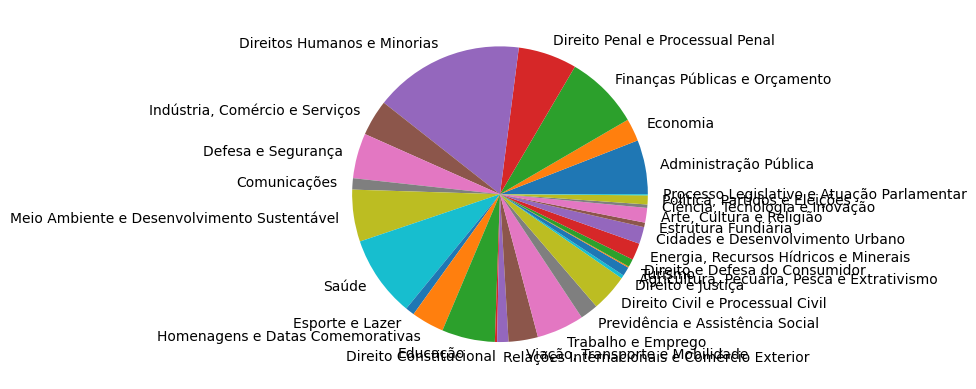

In [9]:
temas=df2023temasFinal['tema'].unique().tolist()
propostas=[]
for tema in temas:
    propostas.append(df2023temasFinal[df2023temasFinal['tema']==tema].shape[0])
    
plt.pie(propostas, labels=temas)
plt.show()

## Bills by Author

In [10]:
df2023autores=pd.read_csv('proposicoesAutores-2023.csv', sep=';')
df2023autores

,idProposicao,uriProposicao,idDeputadoAutor,uriAutor,codTipoAutor,tipoAutor,nomeAutor,siglaPartidoAutor,uriPartidoAutor,siglaUFAutor,ordemAssinatura,proponente
0,2349309,https://dadosabertos.camara.leg.br/api/v2/prop...,220659.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Dayany do Capitão,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,CE,1,1
1,2349308,https://dadosabertos.camara.leg.br/api/v2/prop...,204369.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Caroline de Toni,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SC,1,1
2,2349307,https://dadosabertos.camara.leg.br/api/v2/prop...,220550.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Mauricio Marcon,PODE,https://dadosabertos.camara.leg.br/api/v2/part...,RS,5,1
3,2349307,https://dadosabertos.camara.leg.br/api/v2/prop...,220705.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Deltan Dallagnol,PODE,https://dadosabertos.camara.leg.br/api/v2/part...,PR,8,1
4,2349307,https://dadosabertos.camara.leg.br/api/v2/prop...,178929.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Diego Garcia,REPUBLIC,NaN,PR,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9114,2345495,https://dadosabertos.camara.leg.br/api/v2/prop...,NaN,https://dadosabertos.camara.leg.br/api/v2/orga...,30000,Órgão do Poder Executivo,Poder Executivo,NaN,NaN,NaN,1,1
9115,2345494,https://dadosabertos.camara.leg.br/api/v2/prop...,NaN,https://dadosabertos.camara.leg.br/api/v2/orga...,30000,Órgão do Poder Executivo,Poder Executivo,NaN,NaN,NaN,1,1
9116,2345493,https://dadosabertos.camara.leg.br/api/v2/prop...,NaN,https://dadosabertos.camara.leg.br/api/v2/orga...,30000,Órgão do Poder Executivo,Poder Executivo,NaN,NaN,NaN,1,1
9117,2345487,https://dadosabertos.camara.leg.br/api/v2/prop...,NaN,https://dadosabertos.camara.leg.br/api/v2/orga...,30000,Órgão do Poder Executivo,Poder Executivo,NaN,NaN,NaN,1,1


In [11]:
df2023autores['tipoAutor'].unique()

array(['Deputado', 'Órgão do Poder Legislativo',
       'Órgão do Poder Executivo', 'COMISSÃO PERMANENTE',
       'COMISSÃO ESPECIAL', 'COMISSÃO DIRETORA', 'Liderança', 'Bancada'],
      dtype=object)

In [12]:
df2023autoresFinal=df2023autores[((df2023autores['tipoAutor']=='Deputado') | (df2023autores['tipoAutor']=='Senador')) & (df2023autores['ordemAssinatura']==1)]
df2023autoresFinal

,idProposicao,uriProposicao,idDeputadoAutor,uriAutor,codTipoAutor,tipoAutor,nomeAutor,siglaPartidoAutor,uriPartidoAutor,siglaUFAutor,ordemAssinatura,proponente
0,2349309,https://dadosabertos.camara.leg.br/api/v2/prop...,220659.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Dayany do Capitão,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,CE,1,1
1,2349308,https://dadosabertos.camara.leg.br/api/v2/prop...,204369.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Caroline de Toni,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SC,1,1
7,2349307,https://dadosabertos.camara.leg.br/api/v2/prop...,204369.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Caroline de Toni,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SC,1,1
70,2349306,https://dadosabertos.camara.leg.br/api/v2/prop...,220648.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Marangoni,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,1,1
205,2349305,https://dadosabertos.camara.leg.br/api/v2/prop...,204496.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Celso Sabino,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,PA,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9096,2345507,https://dadosabertos.camara.leg.br/api/v2/prop...,204374.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Bia Kicis,PL,https://dadosabertos.camara.leg.br/api/v2/part...,DF,1,1
9097,2345506,https://dadosabertos.camara.leg.br/api/v2/prop...,204507.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Carla Zambelli,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,1,1
9098,2345505,https://dadosabertos.camara.leg.br/api/v2/prop...,178887.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Rubens Pereira Júnior,PT,https://dadosabertos.camara.leg.br/api/v2/part...,MA,1,1
9099,2345504,https://dadosabertos.camara.leg.br/api/v2/prop...,178887.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Rubens Pereira Júnior,PT,https://dadosabertos.camara.leg.br/api/v2/part...,MA,1,1


## 2023 Bills - Customized DataFrame

In [13]:
df2023final.head()

,id,uri,siglaTipo,numero,ano,codTipo,descricaoTipo,ementa,ementaDetalhada,keywords,...,ultimoStatus_siglaOrgao,ultimoStatus_uriOrgao,ultimoStatus_regime,ultimoStatus_descricaoTramitacao,ultimoStatus_idTipoTramitacao,ultimoStatus_descricaoSituacao,ultimoStatus_idSituacao,ultimoStatus_despacho,ultimoStatus_apreciacao,ultimoStatus_url
0,2345485,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1,2023,139,Projeto de Lei,Institui a Política Nacional de Longo Prazo.,NaN,"Criação, Política Nacional de Longo Prazo (PNL...",...,NaN,NaN,NaN,Notificações,1005,NaN,NaN,Nota de ação corretiva\r\n\r\n\nRetificou-se a...,Proposição Sujeita à Apreciação Conclusiva pel...,NaN
6,2345498,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,2,2023,139,Projeto de Lei,"Altera a Lei nº 12.529, de 30 de novembro de 2...",NaN,"Alteração, Lei de Defesa da Concorrência (2011...",...,NaN,NaN,NaN,Apresentação de Proposição,100,NaN,NaN,"Apresentação do Projeto de Lei n. 2/2023, pelo...",Indefinida,http://www.camara.gov.br/proposicoesWeb/prop_m...
62,2345625,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,3,2023,139,Projeto de Lei,Cria o Protocolo Não é Não de atendimento à mu...,NaN,"Criação, Protocolo Não é Não, atendimento à ví...",...,SECAP(SGM),https://dadosabertos.camara.leg.br/api/v2/orga...,NaN,Apresentação de Requerimento,194,Aguardando Chancela e Publicação do Despacho,1210.0,Apresentação do Requerimento de Inclusão ou Re...,Proposição Sujeita à Apreciação Conclusiva pel...,http://www.camara.gov.br/proposicoesWeb/prop_m...
64,2345627,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,4,2023,139,Projeto de Lei,Estabelece protocolo de segurança para as mulh...,NaN,"Procedimento, atendimento à vítima, mulher, vi...",...,SECAP(SGM),https://dadosabertos.camara.leg.br/api/v2/orga...,NaN,Apresentação de Requerimento,194,Aguardando Chancela e Publicação do Despacho,1210.0,"Apresentação do Requerimento n. 58/2023, pelas...",Proposição Sujeita à Apreciação Conclusiva pel...,http://www.camara.gov.br/proposicoesWeb/prop_m...
65,2345628,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,5,2023,139,Projeto de Lei,Dispõe sobre a substituição do símbolo indicat...,NaN,"Substituição, símbolo, idoso, sinalização, ate...",...,SECAP(SGM),https://dadosabertos.camara.leg.br/api/v2/orga...,NaN,Apresentação de Proposição,100,Aguardando Chancela e Publicação do Despacho,1210.0,"Apresentação do Projeto de Lei n. 5/2023, pelo...",Indefinida,http://www.camara.gov.br/proposicoesWeb/prop_m...


In [14]:
df2023temasFinal.head()

,uriProposicao,siglaTipo,numero,ano,codTema,tema,relevancia
0,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1,2023,34,Administração Pública,0
8,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,2,2023,40,Economia,0
9,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,2,2023,70,Finanças Públicas e Orçamento,0
21,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,3,2023,43,Direito Penal e Processual Penal,0
22,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,3,2023,44,Direitos Humanos e Minorias,0


In [15]:
df2023autoresFinal.head()

,idProposicao,uriProposicao,idDeputadoAutor,uriAutor,codTipoAutor,tipoAutor,nomeAutor,siglaPartidoAutor,uriPartidoAutor,siglaUFAutor,ordemAssinatura,proponente
0,2349309,https://dadosabertos.camara.leg.br/api/v2/prop...,220659.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Dayany do Capitão,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,CE,1,1
1,2349308,https://dadosabertos.camara.leg.br/api/v2/prop...,204369.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Caroline de Toni,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SC,1,1
7,2349307,https://dadosabertos.camara.leg.br/api/v2/prop...,204369.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Caroline de Toni,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SC,1,1
70,2349306,https://dadosabertos.camara.leg.br/api/v2/prop...,220648.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Marangoni,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,1,1
205,2349305,https://dadosabertos.camara.leg.br/api/v2/prop...,204496.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Celso Sabino,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,PA,1,1


In [16]:
#propostas2023={}
#para cada id de proposta em df2023 final
#criar propostas2023[id]
#criar propostas2023[número]=df2023temasFinal[siglaTipo]+' '+df2023temasFinal[numero]+'/'+df2023temasFinal[ano]
#criar propostas2023[resumo]=df2023final[ementa]
#criar propostas2023[link]
#criar propostas2023[autor principal]=df2023autoresFinal[nomeAutor]

In [17]:
uris=df2023final['uri'].tolist()
ids=df2023final['id'].tolist()
ementas=df2023final['ementa'].tolist()
keywords=df2023final['keywords'].tolist()
tipos=df2023final['descricaoTipo'].tolist()
anos=df2023final['ano'].tolist()

In [18]:
temas=[]
for uri in uris:
    if df2023temasFinal.loc[df2023temasFinal['uriProposicao']==uri].shape[0]>1:
        tema=''
        indices=df2023temasFinal.loc[df2023temasFinal['uriProposicao']==uri].index.tolist()
        for i in indices:
            tema+=df2023temasFinal.loc[df2023temasFinal['uriProposicao']==uri, 'tema'][i]
            if i==indices[-1]:
                tema+='.'
            else:
                tema+=', '
        temas.append(tema)
    elif df2023temasFinal.loc[df2023temasFinal['uriProposicao']==uri].shape[0]==1:
        index=df2023temasFinal.loc[df2023temasFinal['uriProposicao']==uri].index[0]
        temas.append(df2023temasFinal.loc[df2023temasFinal['uriProposicao']==uri, 'tema'][index])
    else:
        temas.append(None)

In [19]:
#index=df2023autoresFinal.loc[df2023autoresFinal['uriProposicao']==uris[0]].index[0]
#autor=df2023autoresFinal.loc[df2023autoresFinal['uriProposicao']==uris[0], 'nomeAutor'][index]
df2023autoresFinal.loc[df2023autoresFinal['uriProposicao']==uris[0]].shape

(0, 12)

In [20]:
autores=[]
partidos=[]
cargos=[]

for uri in uris:
    if df2023autoresFinal.loc[df2023autoresFinal['uriProposicao']==uri].shape[0]>0:
        index=df2023autoresFinal.loc[df2023autoresFinal['uriProposicao']==uri].index[0]
        autor=df2023autoresFinal.loc[df2023autoresFinal['uriProposicao']==uri, 'nomeAutor'][index]
        partido=df2023autoresFinal.loc[df2023autoresFinal['uriProposicao']==uri, 'siglaPartidoAutor'][index]
        cargo=df2023autoresFinal.loc[df2023autoresFinal['uriProposicao']==uri, 'tipoAutor'][index]
        autores.append(autor)
        partidos.append(partido)
        cargos.append(cargo)    
    else:
        autores.append(None)
        partidos.append(None)
        cargos.append(None) 

In [21]:
links=[]

for ID in ids:
    link='https://www.camara.leg.br/proposicoesWeb/fichadetramitacao?idProposicao='+str(ID)
    links.append(link)

In [22]:
propostas2023={}

propostas2023['Temas']=temas
propostas2023['Ementa']=ementas
propostas2023['Tipo']=tipos
propostas2023['Ano']=anos
propostas2023['Autor']=autores
propostas2023['Cargo']=cargos
propostas2023['Partido']=partidos
propostas2023['Link']=links

In [23]:
pd.DataFrame(propostas2023, index=ids)

,Temas,Ementa,Tipo,Ano,Autor,Cargo,Partido,Link
2345485,Administração Pública,Institui a Política Nacional de Longo Prazo.,Projeto de Lei,2023,None,None,None,https://www.camara.leg.br/proposicoesWeb/ficha...
2345498,"Economia, Finanças Públicas e Orçamento.","Altera a Lei nº 12.529, de 30 de novembro de 2...",Projeto de Lei,2023,None,None,None,https://www.camara.leg.br/proposicoesWeb/ficha...
2345625,"Direito Penal e Processual Penal, Direitos Hum...",Cria o Protocolo Não é Não de atendimento à mu...,Projeto de Lei,2023,Maria do Rosário,Deputado,PT,https://www.camara.leg.br/proposicoesWeb/ficha...
2345627,"Direito Penal e Processual Penal, Direitos Hum...",Estabelece protocolo de segurança para as mulh...,Projeto de Lei,2023,Dandara,Deputado,PT,https://www.camara.leg.br/proposicoesWeb/ficha...
2345628,Direitos Humanos e Minorias,Dispõe sobre a substituição do símbolo indicat...,Projeto de Lei,2023,Weliton Prado,Deputado,PROS,https://www.camara.leg.br/proposicoesWeb/ficha...
...,...,...,...,...,...,...,...,...
2349293,None,Dispõe sobre a jornada de trabalho dos Enferme...,Projeto de Lei,2023,Célio Studart,Deputado,PSD,https://www.camara.leg.br/proposicoesWeb/ficha...
2349294,None,"Altera o Decreto-Lei nº 2.848, de 7 de dezembr...",Projeto de Lei,2023,Rosana Valle,Deputado,PL,https://www.camara.leg.br/proposicoesWeb/ficha...
2349302,None,"Concede benefícios ao agricultor familiar, pes...",Projeto de Lei,2023,Marcelo Queiroz,Deputado,PP,https://www.camara.leg.br/proposicoesWeb/ficha...
2349303,None,"Altera a Lei nº 11.947, de 16 de junho de 2009...",Projeto de Lei,2023,Rafael Brito,Deputado,MDB,https://www.camara.leg.br/proposicoesWeb/ficha...


## Adding 2022 Bills

In [24]:
df2022=pd.read_csv('proposicoes-2022.csv', sep=';')
df2022final=df2022[df2022.siglaTipo.isin(['PL', 'PLP', 'PEC', 'PLS', 'MVP', 'PDC', 'PRC', 'PLC', 'SCD', 'PDS', 'PDC', 'PRC', 'PLV'])]

df2022temas=pd.read_csv('proposicoesTemas-2022.csv', sep=';')
df2022temasFinal=df2022temas[df2022temas['siglaTipo'].isin(['PL', 'PLP', 'PEC', 'PLS', 'MVP', 'PDC', 'PRC', 'PLC', 'SCD', 'PDS', 'PDC', 'PRC', 'PLV'])]

df2022autores=pd.read_csv('proposicoesAutores-2022.csv', sep=';')
df2022autoresFinal=df2022autores[((df2022autores['tipoAutor']=='Deputado') | (df2022autores['tipoAutor']=='Senador')) & (df2022autores['ordemAssinatura']==1)]

In [25]:
uris2=df2022final['uri'].tolist()
ids2=df2022final['id'].tolist()
ementas2=df2022final['ementa'].tolist()
keywords2=df2022final['keywords'].tolist()
tipos2=df2022final['descricaoTipo'].tolist()
anos2=df2022final['ano'].tolist()

temas2=[]
for uri2 in uris2:
    if df2022temasFinal.loc[df2022temasFinal['uriProposicao']==uri2].shape[0]>1:
        tema2=''
        indices2=df2022temasFinal.loc[df2022temasFinal['uriProposicao']==uri2].index.tolist()
        for i2 in indices2:
            tema2+=df2022temasFinal.loc[df2022temasFinal['uriProposicao']==uri2, 'tema'][i2]
            if i2==indices2[-1]:
                tema2+='.'
            else:
                tema2+=', '
        temas2.append(tema2)
    elif df2022temasFinal.loc[df2022temasFinal['uriProposicao']==uri2].shape[0]==1:
        index2=df2022temasFinal.loc[df2022temasFinal['uriProposicao']==uri2].index[0]
        temas2.append(df2022temasFinal.loc[df2022temasFinal['uriProposicao']==uri2, 'tema'][index2])
    else:
        temas2.append(None)
        
autores2=[]
partidos2=[]
cargos2=[]

for uri in uris2:
    if df2022autoresFinal.loc[df2022autoresFinal['uriProposicao']==uri].shape[0]>0:
        index=df2022autoresFinal.loc[df2022autoresFinal['uriProposicao']==uri].index[0]
        autor=df2022autoresFinal.loc[df2022autoresFinal['uriProposicao']==uri, 'nomeAutor'][index]
        partido=df2022autoresFinal.loc[df2022autoresFinal['uriProposicao']==uri, 'siglaPartidoAutor'][index]
        cargo=df2022autoresFinal.loc[df2022autoresFinal['uriProposicao']==uri, 'tipoAutor'][index]
        autores2.append(autor)
        partidos2.append(partido)
        cargos2.append(cargo)    
    else:
        autores2.append(None)
        partidos2.append(None)
        cargos2.append(None) 
        
links2=[]

for ID in ids2:
    link='https://www.camara.leg.br/proposicoesWeb/fichadetramitacao?idProposicao='+str(ID)
    links2.append(link)

In [26]:
propostas={}

propostas['Temas']=temas+temas2
propostas['Ementa']=ementas+ementas2
propostas['Tipo']=tipos+tipos2
propostas['Ano']=anos+anos2
propostas['Autor']=autores+autores2
propostas['Cargo']=cargos+cargos2
propostas['Partido']=partidos+partidos2
propostas['Link']=links+links2

In [27]:
i=ids+ids2
df=pd.DataFrame(propostas, index=i)

In [28]:
df

,Temas,Ementa,Tipo,Ano,Autor,Cargo,Partido,Link
2345485,Administração Pública,Institui a Política Nacional de Longo Prazo.,Projeto de Lei,2023,None,None,None,https://www.camara.leg.br/proposicoesWeb/ficha...
2345498,"Economia, Finanças Públicas e Orçamento.","Altera a Lei nº 12.529, de 30 de novembro de 2...",Projeto de Lei,2023,None,None,None,https://www.camara.leg.br/proposicoesWeb/ficha...
2345625,"Direito Penal e Processual Penal, Direitos Hum...",Cria o Protocolo Não é Não de atendimento à mu...,Projeto de Lei,2023,Maria do Rosário,Deputado,PT,https://www.camara.leg.br/proposicoesWeb/ficha...
2345627,"Direito Penal e Processual Penal, Direitos Hum...",Estabelece protocolo de segurança para as mulh...,Projeto de Lei,2023,Dandara,Deputado,PT,https://www.camara.leg.br/proposicoesWeb/ficha...
2345628,Direitos Humanos e Minorias,Dispõe sobre a substituição do símbolo indicat...,Projeto de Lei,2023,Weliton Prado,Deputado,PROS,https://www.camara.leg.br/proposicoesWeb/ficha...
...,...,...,...,...,...,...,...,...
2345337,"Administração Pública, Energia, Recursos Hídri...","Altera a Lei do ISS e a Lei Kandir, para adapt...",Projeto de Lei Complementar,2022,Paulo Ganime,Deputado,NOVO,https://www.camara.leg.br/proposicoesWeb/ficha...
2345346,Administração Pública,Dispõe sobre a transparência nos gastos públic...,Projeto de Lei,2022,Paulo Ganime,Deputado,NOVO,https://www.camara.leg.br/proposicoesWeb/ficha...
2345354,None,"Altera as Resoluções n. 1, de 2007, e 30, de 2...",Projeto de Resolução,2022,None,None,None,https://www.camara.leg.br/proposicoesWeb/ficha...
2345482,"Administração Pública, Ciência, Tecnologia e I...","Altera a Lei nº 8.691, de 28 de julho de 1993,...",Projeto de Lei,2022,None,None,None,https://www.camara.leg.br/proposicoesWeb/ficha...


In [29]:
for column in df.columns:
  print(column, df[column].isna().sum())

Temas 226
Ementa 7
Tipo 0
Ano 0
Autor 88
Cargo 88
Partido 88
Link 0


In [30]:
df.to_json('proposicoes.json')

## Adding Data from Senate

In [4]:
headers={'Accept':'application/json'}
r=requests.get('https://legis.senado.leg.br/dadosabertos/materia/tramitando?data=20220101', headers=headers)

In [5]:
tramit=r.json()

In [6]:
def get_by_key(key, value):
        try:
                if '.' in key:
                        old_key, new_key = key.split('.', 1)
                        new_value = value[old_key]
                        #print(new_key, new_value)
                        return get_by_key(new_key, new_value)
                else:
                        return value[key]
        except (KeyError, TypeError) as _:
                return None

In [13]:
tramitando=[]

for item in tramit["ListaMateriasTramitando"]["Materias"]["Materia"]:
        dicionario = {
                        "CodigoMateria": get_by_key('IdentificacaoMateria.CodigoMateria', item),
                        "SiglaCasaIdentificacaoMateria": get_by_key('IdentificacaoMateria.SiglaCasaIdentificacaoMateria', item),
                        "NomeCasaIdentificacaoMateria": get_by_key('IdentificacaoMateria.NomeCasaIdentificacaoMateria', item),
                        "SiglaSubtipoMateria": get_by_key('IdentificacaoMateria.SiglaSubtipoMateria', item),
                        "DescricaoSubtipoMateria": get_by_key('IdentificacaoMateria.DescricaoSubtipoMateria', item),
                        "NumeroMateria": get_by_key('IdentificacaoMateria.NumeroMateria', item),
                        "AnoMateria": get_by_key('IdentificacaoMateria.AnoMateria', item),
                        "DescricaoIdentificacaoMateria": get_by_key('IdentificacaoMateria.DescricaoIdentificacaoMateria', item),
                        "IndicadorTramitando": get_by_key('IdentificacaoMateria.IndicadorTramitando', item),
                        "DataUltimaAtualizacao": get_by_key('DataUltimaAtualizacao', item)
                        }

        tramitando.append(dicionario)

df_tramitando = pd.DataFrame(tramitando)

In [14]:
df_tramitando

,CodigoMateria,SiglaCasaIdentificacaoMateria,NomeCasaIdentificacaoMateria,SiglaSubtipoMateria,DescricaoSubtipoMateria,NumeroMateria,AnoMateria,DescricaoIdentificacaoMateria,IndicadorTramitando,DataUltimaAtualizacao
0,236,CN,Congresso Nacional,MSG,None,00031,1991,MSG 31/1991,Sim,2023-02-02 00:48:44
1,237,CN,Congresso Nacional,MSG,None,00033,1992,MSG 33/1992,Sim,2023-01-17 15:47:51
2,603,SF,Senado Federal,PDS,None,00016,1984,PDS 16/1984,Sim,2023-02-02 00:48:44
3,48250,CN,Congresso Nacional,MPV,None,02217,2001,MPV 2217-3/2001,Sim,2022-08-02 15:04:05
4,50495,CN,Congresso Nacional,VET,None,00016,2002,VET 16/2002,Sim,2023-03-07 11:51:05
...,...,...,...,...,...,...,...,...,...,...
4400,156150,SF,Senado Federal,PL,None,01060,2023,PL 1060/2023,Sim,2023-03-10 14:53:46
4401,156151,SF,Senado Federal,RQS,None,00151,2023,RQS 151/2023,Sim,2023-03-10 17:19:05
4402,156152,SF,Senado Federal,PRS,None,00026,2023,PRS 26/2023,Sim,2023-03-10 16:30:02
4403,156153,SF,Senado Federal,REQ,None,00003,2023,REQ 3/2023 - CMA,Sim,2023-03-10 16:54:58


In [107]:
prefixo = 'http://legis.senado.leg.br/dadosabertos/materia/'

projetos_det = []

for num, row in df_tramitando.iterrows():
    codigo = row['CodigoMateria']

    url = prefixo + codigo
    print(url)

    try:
        r = requests.get(url, headers=headers)
    except requests.exceptions.HTTPError as errh:
        print ("Http Error:",errh)
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc)
    except requests.exceptions.Timeout as errt:
        print ("Timeout Error:",errt)
    except requests.exceptions.RequestException as err:
        print ("OOps: Something Else",err)

    projects = r.json()

    dicionario = {
                        "CodigoMateria": get_by_key('DetalheMateria.Materia.IdentificacaoMateria.CodigoMateria', projects),
                        "SiglaCasaIdentificacaoMateria": get_by_key('DetalheMateria.Materia.IdentificacaoMateria.SiglaCasaIdentificacaoMateria', projects),
                        "NomeCasaIdentificacaoMateria": get_by_key('DetalheMateria.Materia.IdentificacaoMateria.NomeCasaIdentificacaoMateria', projects),
                        "SiglaSubtipoMateria": get_by_key('DetalheMateria.Materia.IdentificacaoMateria.SiglaSubtipoMateria', projects),
                        "DescricaoSubtipoMateria": get_by_key('DetalheMateria.Materia.IdentificacaoMateria.DescricaoSubtipoMateria', projects),
                        "NumeroMateria": get_by_key('DetalheMateria.Materia.IdentificacaoMateria.NumeroMateria', projects),
                        "AnoMateria": get_by_key('DetalheMateria.Materia.IdentificacaoMateria.AnoMateria', projects),
                        "DescricaoObjetivoProcesso": get_by_key('DetalheMateria.Materia.IdentificacaoMateria.DescricaoObjetivoProcesso', projects),
                        "DescricaoIdentificacaoMateria": get_by_key('DetalheMateria.Materia.IdentificacaoMateria.DescricaoIdentificacaoMateria', projects),
                        "IndicadorTramitando": get_by_key('DetalheMateria.Materia.IdentificacaoMateria.IndicadorTramitando', projects),
                        "EmentaMateria": get_by_key('DetalheMateria.Materia.DadosBasicosMateria.EmentaMateria', projects),
                        "ExplicacaoEmentaMateria": get_by_key('DetalheMateria.Materia.DadosBasicosMateria.ExplicacaoEmentaMateria', projects),
                        "ApelidoMateria": get_by_key('DetalheMateria.Materia.DadosBasicosMateria.ApelidoMateria', projects),
                        "IndicadorComplementar": get_by_key('DetalheMateria.Materia.DadosBasicosMateria.IndicadorComplementar', projects),
                        "DataApresentacao": get_by_key('DetalheMateria.Materia.DadosBasicosMateria.DataApresentacao', projects),
                        "DataLeitura": get_by_key('DetalheMateria.Materia.DadosBasicosMateria.DataLeitura', projects),
                        "SiglaCasaLeitura": get_by_key('DetalheMateria.Materia.DadosBasicosMateria.SiglaCasaLeitura', projects),
                        "NomeCasaLeitura": get_by_key('DetalheMateria.Materia.DadosBasicosMateria.NomeCasaLeitura', projects),
                        "CodigoNatureza": get_by_key('DetalheMateria.Materia.DadosBasicosMateria.NaturezaMateria.CodigoNatureza', projects),
                        "NomeNatureza": get_by_key('DetalheMateria.Materia.DadosBasicosMateria.NaturezaMateria.NomeNatureza', projects),
                        "DescricaoNatureza": get_by_key('DetalheMateria.Materia.DadosBasicosMateria.NaturezaMateria.DescricaoNatureza', projects),
                        "Codigo_assunto": get_by_key('DetalheMateria.Materia.Assunto.AssuntoEspecifico.Codigo', projects),
                        "Descricao_assunto": get_by_key('DetalheMateria.Materia.Assunto.AssuntoEspecifico.Descricao', projects),
                        "Codigo_assunto_geral": get_by_key('DetalheMateria.Materia.Assunto.AssuntoGeral.Codigo', projects),
                        "Descricao_assunto_geral": get_by_key('DetalheMateria.Materia.Assunto.AssuntoGeral.Descricao', projects),
                        "NomePoderOrigem": get_by_key('DetalheMateria.Materia.OrigemMateria.NomePoderOrigem', projects),
                        "SiglaCasaOrigem": get_by_key('DetalheMateria.Materia.OrigemMateria.SiglaCasaOrigem', projects),
                        "NomeCasaOrigem": get_by_key('DetalheMateria.Materia.OrigemMateria.NomeCasaOrigem', projects),
                        "SiglaCasaIniciadora": get_by_key('DetalheMateria.Materia.CasaIniciadoraNoLegislativo.SiglaCasaIniciadora', projects),
                        "NomeCasaIniciadora": get_by_key('DetalheMateria.Materia.CasaIniciadoraNoLegislativo.NomeCasaIniciadora', projects)
                                         }

    try:
        NomeAutor = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['NomeAutor'])
    except KeyError:
        NomeAutor = None
    except TypeError:
        NomeAutor = None

    try:
        SiglaTipoAutor = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['SiglaTipoAutor'])
    except KeyError:
        SiglaTipoAutor = None
    except TypeError:
        SiglaTipoAutor = None

    try:
            DescricaoTipoAutor = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['DescricaoTipoAutor'])
    except KeyError:
            DescricaoTipoAutor = None
    except TypeError:
            DescricaoTipoAutor = None

    try:
            UfAutor = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['UfAutor'])
    except KeyError:
            UfAutor = None
    except TypeError:
            UfAutor = None

    try:
        NumOrdemAutor = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['NumOrdemAutor'])
    except KeyError:
        NumOrdemAutor = None
    except TypeError:
        NumOrdemAutor = None

    try:
        IndicadorOutrosAutores = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['IndicadorOutrosAutores'])
    except KeyError:
        IndicadorOutrosAutores = None
    except TypeError:
        IndicadorOutrosAutores = None

    try:
        CodigoParlamentar = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['IdentificacaoParlamentar']['CodigoParlamentar'])
    except KeyError:
        CodigoParlamentar = None
    except TypeError:
        CodigoParlamentar = None

    try:
        CodigoPublicoNaLegAtual = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['IdentificacaoParlamentar']['CodigoPublicoNaLegAtual'])
    except KeyError:
        CodigoPublicoNaLegAtual = None
    except TypeError:
        CodigoPublicoNaLegAtual = None

    try:
        NomeParlamentar = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['IdentificacaoParlamentar']['NomeParlamentar'])
    except KeyError:
        NomeParlamentar = None
    except TypeError:
        NomeParlamentar = None

    try:
        NomeCompletoParlamentar = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['IdentificacaoParlamentar']['NomeCompletoParlamentar'])
    except KeyError:
        NomeCompletoParlamentar = None
    except TypeError:
        NomeCompletoParlamentar = None

    try:
        SexoParlamentar = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['IdentificacaoParlamentar']['SexoParlamentar'])
    except KeyError:
        SexoParlamentar = None
    except TypeError:
        SexoParlamentar = None

    try:
        FormaTratamento = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['IdentificacaoParlamentar']['FormaTratamento'])
    except KeyError:
        FormaTratamento = None
    except TypeError:
        FormaTratamento = None

    try:
        UrlFotoParlamentar = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['IdentificacaoParlamentar']['UrlFotoParlamentar'])
    except KeyError:
        UrlFotoParlamentar = None
    except TypeError:
        UrlFotoParlamentar = None

    try:
        UrlPaginaParlamentar = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['IdentificacaoParlamentar']['UrlPaginaParlamentar'])
    except KeyError:
        UrlPaginaParlamentar = None
    except TypeError:
        UrlPaginaParlamentar = None

    try:
        EmailParlamentar = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['IdentificacaoParlamentar']['EmailParlamentar'])
    except KeyError:
        EmailParlamentar = None
    except TypeError:
        EmailParlamentar = None

    try:
        SiglaPartidoParlamentar = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['IdentificacaoParlamentar']['SiglaPartidoParlamentar'])
    except KeyError:
        SiglaPartidoParlamentar = None
    except TypeError:
        SiglaPartidoParlamentar = None

    try:
        UfParlamentar = str(projects['DetalheMateria']['Materia']['Autoria']['Autor'][0]['IdentificacaoParlamentar']['UfParlamentar'])
    except KeyError:
        UfParlamentar = None
    except TypeError:
        UfParlamentar = None

    try:
        NumeroAutuacao = str(projects['DetalheMateria']['Materia']['SituacaoAtual']['Autuacoes']['Autuacao'][0]['NumeroAutuacao'])
    except KeyError:
        NumeroAutuacao = None
    except TypeError:
        NumeroAutuacao = None

    try:
        DataSituacao = str(projects['DetalheMateria']['Materia']['SituacaoAtual']['Autuacoes']['Autuacao'][0]['Situacao']['DataSituacao'])
    except KeyError:
        DataSituacao = None
    except TypeError:
        DataSituacao = None

    try:
        CodigoSituacao = str(projects['DetalheMateria']['Materia']['SituacaoAtual']['Autuacoes']['Autuacao'][0]['Situacao']['CodigoSituacao'])
    except KeyError:
        CodigoSituacao = None
    except TypeError:
        CodigoSituacao = None

    try:
        SiglaSituacao = str(projects['DetalheMateria']['Materia']['SituacaoAtual']['Autuacoes']['Autuacao'][0]['Situacao']['SiglaSituacao'])
    except KeyError:
        SiglaSituacao = None
    except TypeError:
        SiglaSituacao = None

    try:
        DescricaoSituacao = str(projects['DetalheMateria']['Materia']['SituacaoAtual']['Autuacoes']['Autuacao'][0]['Situacao']['DescricaoSituacao'])
    except KeyError:
        DescricaoSituacao = None
    except TypeError:
        DescricaoSituacao = None

    try:
        DataLocal = str(projects['DetalheMateria']['Materia']['SituacaoAtual']['Autuacoes']['Autuacao'][0]['Local']['DataLocal'])
    except KeyError:
        DataLocal = None
    except TypeError:
        DataLocal = None

    try:
        CodigoLocal = str(projects['DetalheMateria']['Materia']['SituacaoAtual']['Autuacoes']['Autuacao'][0]['Local']['CodigoLocal'])
    except KeyError:
        CodigoLocal = None
    except TypeError:
        CodigoLocal = None

    try:
        TipoLocal = str(projects['DetalheMateria']['Materia']['SituacaoAtual']['Autuacoes']['Autuacao'][0]['Local']['TipoLocal'])
    except KeyError:
        TipoLocal = None
    except TypeError:
        TipoLocal = None

    try:
        SiglaCasaLocal = str(projects['DetalheMateria']['Materia']['SituacaoAtual']['Autuacoes']['Autuacao'][0]['Local']['SiglaCasaLocal'])
    except KeyError:
        SiglaCasaLocal = None
    except TypeError:
        SiglaCasaLocal = None

    try:
        NomeCasaLocal = str(projects['DetalheMateria']['Materia']['SituacaoAtual']['Autuacoes']['Autuacao'][0]['Local']['NomeCasaLocal'])
    except KeyError:
        NomeCasaLocal = None
    except TypeError:
        NomeCasaLocal = None

    try:
        SiglaLocal = str(projects['DetalheMateria']['Materia']['SituacaoAtual']['Autuacoes']['Autuacao'][0]['Local']['SiglaLocal'])
    except KeyError:
        SiglaLocal = None
    except TypeError:
        SiglaLocal = None

    try:
        NomeLocal = str(projects['DetalheMateria']['Materia']['SituacaoAtual']['Autuacoes']['Autuacao'][0]['Local']['NomeLocal'])
    except KeyError:
        NomeLocal = None
    except TypeError:
        NomeLocal = None

    try:
        url_emendas = str(projects['DetalheMateria']['Materia']['OutrasInformacoes']['Servico'][0]['UrlServico'])
    except KeyError:
        url_emendas = None
    except TypeError:
        url_emendas = None

    try:
        url_movimentacoes = str(projects['DetalheMateria']['Materia']['OutrasInformacoes']['Servico'][1]['UrlServico'])
    except KeyError:
        url_movimentacoes = None
    except TypeError:
        url_movimentacoes = None

    try:
        url_relatorias = str(projects['DetalheMateria']['Materia']['OutrasInformacoes']['Servico'][2]['UrlServico'])
    except KeyError:
        url_relatorias = None
    except TypeError:
        url_relatorias = None

    try:
        url_texto = str(projects['DetalheMateria']['Materia']['OutrasInformacoes']['Servico'][3]['UrlServico'])
    except KeyError:
        url_texto = None
    except TypeError:
        url_texto = None

    try:
        url_votacoes_materia = str(projects['DetalheMateria']['Materia']['OutrasInformacoes']['Servico'][4]['UrlServico'])
    except KeyError:
        url_votacoes_materia = None
    except TypeError:
        url_votacoes_materia = None

    try:
        url_votacoes_comissoes = str(projects['DetalheMateria']['Materia']['OutrasInformacoes']['Servico'][5]['UrlServico'])
    except KeyError:
        url_votacoes_comissoes = None
    except TypeError:
        url_votacoes_comissoes = None

    dicionario['NomeAutor'] = NomeAutor
    dicionario['SiglaTipoAutor'] = SiglaTipoAutor
    dicionario['DescricaoTipoAutor'] = DescricaoTipoAutor
    dicionario['UfAutor'] = UfAutor
    dicionario['NumOrdemAutor'] = NumOrdemAutor
    dicionario['IndicadorOutrosAutores'] = IndicadorOutrosAutores
    dicionario['CodigoParlamentar'] = CodigoParlamentar
    dicionario['CodigoPublicoNaLegAtual'] = CodigoPublicoNaLegAtual
    dicionario['NomeParlamentar'] = NomeParlamentar
    dicionario['NomeCompletoParlamentar'] = NomeCompletoParlamentar
    dicionario['SexoParlamentar'] = SexoParlamentar
    dicionario['FormaTratamento'] = FormaTratamento
    dicionario['UrlFotoParlamentar'] = UrlFotoParlamentar
    dicionario['UrlPaginaParlamentar'] = UrlPaginaParlamentar
    dicionario['EmailParlamentar'] = EmailParlamentar
    dicionario['SiglaPartidoParlamentar'] = SiglaPartidoParlamentar
    dicionario['UfParlamentar'] = UfParlamentar
    dicionario['NumeroAutuacao'] = NumeroAutuacao
    dicionario['DataSituacao'] = DataSituacao
    dicionario['CodigoSituacao'] = CodigoSituacao
    dicionario['SiglaSituacao'] = SiglaSituacao
    dicionario['DescricaoSituacao'] = DescricaoSituacao
    dicionario['DataLocal'] = DataLocal
    dicionario['CodigoLocal'] = CodigoLocal
    dicionario['TipoLocal'] = TipoLocal
    dicionario['SiglaCasaLocal'] = SiglaCasaLocal
    dicionario['NomeCasaLocal'] = NomeCasaLocal
    dicionario['SiglaLocal'] = SiglaLocal
    dicionario['NomeLocal'] = NomeLocal
    dicionario['url_emendas'] = url_emendas
    dicionario['url_movimentacoes'] = url_movimentacoes
    dicionario['url_relatorias'] = url_relatorias
    dicionario['url_texto'] = url_texto
    dicionario['url_votacoes_materia'] = url_votacoes_materia
    dicionario['url_votacoes_comissoes'] = url_votacoes_comissoes


    projetos_det.append(dicionario)

df_propdia_det = pd.DataFrame(projetos_det)
df_propdia_det = df_propdia_det[pd.notnull(df_propdia_det['EmentaMateria'])].copy()
# df_propdia_det.info()


# Captura link do inteiro teor
prefixo = 'http://legis.senado.leg.br/dadosabertos/materia/textos/'

prop_teor = []

for num, row in df_propdia_det.iterrows():
    codigo = row['CodigoMateria']

    url = prefixo + codigo
    print(url)

    try:
        r = requests.get(url, headers=headers)
    except requests.exceptions.HTTPError as errh:
        print ("Http Error:",errh)
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc)
    except requests.exceptions.Timeout as errt:
        print ("Timeout Error:",errt)
    except requests.exceptions.RequestException as err:
        print ("OOps: Something Else",err)

    projects = r.json()

    dicionario = {
                    "CodigoMateria": get_by_key('TextoMateria.Materia.IdentificacaoMateria.CodigoMateria', projects)}

    try:
        CodigoTexto = str(projects['TextoMateria']['Materia']['Textos']['Texto'][0]['CodigoTexto'])
    except KeyError:
        CodigoTexto = None
    except TypeError:
        CodigoTexto = None

    try:
        UrlTexto = str(projects['TextoMateria']['Materia']['Textos']['Texto'][0]['UrlTexto'])
    except KeyError:
        UrlTexto = None
    except TypeError:
        UrlTexto = None

    dicionario['CodigoTexto'] = CodigoTexto
    dicionario['UrlTexto'] = UrlTexto

    prop_teor.append(dicionario)

df_prop_teor = pd.DataFrame(prop_teor)
# df_prop_teor.info()

# Une os dois dataframes
df_proposicoes = pd.merge(df_propdia_det, df_prop_teor, left_on='CodigoMateria', right_on='CodigoMateria')
# df_proposicoes.info()
# df_proposicoes.to_csv('resultados/senado/proposicoes_senado_detalhes_do_dia.csv',index=False)

http://legis.senado.leg.br/dadosabertos/materia/236
http://legis.senado.leg.br/dadosabertos/materia/237
http://legis.senado.leg.br/dadosabertos/materia/603
http://legis.senado.leg.br/dadosabertos/materia/48250
http://legis.senado.leg.br/dadosabertos/materia/50495
http://legis.senado.leg.br/dadosabertos/materia/88907
http://legis.senado.leg.br/dadosabertos/materia/92812
http://legis.senado.leg.br/dadosabertos/materia/93636
http://legis.senado.leg.br/dadosabertos/materia/95353
http://legis.senado.leg.br/dadosabertos/materia/95363
http://legis.senado.leg.br/dadosabertos/materia/97058
http://legis.senado.leg.br/dadosabertos/materia/97718
http://legis.senado.leg.br/dadosabertos/materia/97965
http://legis.senado.leg.br/dadosabertos/materia/98057
http://legis.senado.leg.br/dadosabertos/materia/98814
http://legis.senado.leg.br/dadosabertos/materia/98891
http://legis.senado.leg.br/dadosabertos/materia/99353
http://legis.senado.leg.br/dadosabertos/materia/99443
http://legis.senado.leg.br/dadosab

http://legis.senado.leg.br/dadosabertos/materia/135095
http://legis.senado.leg.br/dadosabertos/materia/135097
http://legis.senado.leg.br/dadosabertos/materia/135098
http://legis.senado.leg.br/dadosabertos/materia/135113
http://legis.senado.leg.br/dadosabertos/materia/135116
http://legis.senado.leg.br/dadosabertos/materia/135121
http://legis.senado.leg.br/dadosabertos/materia/135131
http://legis.senado.leg.br/dadosabertos/materia/135133
http://legis.senado.leg.br/dadosabertos/materia/135134
http://legis.senado.leg.br/dadosabertos/materia/135148
http://legis.senado.leg.br/dadosabertos/materia/135150
http://legis.senado.leg.br/dadosabertos/materia/135151
http://legis.senado.leg.br/dadosabertos/materia/135152
http://legis.senado.leg.br/dadosabertos/materia/135153
http://legis.senado.leg.br/dadosabertos/materia/135157
http://legis.senado.leg.br/dadosabertos/materia/135159
http://legis.senado.leg.br/dadosabertos/materia/135165
http://legis.senado.leg.br/dadosabertos/materia/135167
http://leg

http://legis.senado.leg.br/dadosabertos/materia/135821
http://legis.senado.leg.br/dadosabertos/materia/135824
http://legis.senado.leg.br/dadosabertos/materia/135833
http://legis.senado.leg.br/dadosabertos/materia/135835
http://legis.senado.leg.br/dadosabertos/materia/135855
http://legis.senado.leg.br/dadosabertos/materia/135857
http://legis.senado.leg.br/dadosabertos/materia/135859
http://legis.senado.leg.br/dadosabertos/materia/135861
http://legis.senado.leg.br/dadosabertos/materia/135867
http://legis.senado.leg.br/dadosabertos/materia/135868
http://legis.senado.leg.br/dadosabertos/materia/135875
http://legis.senado.leg.br/dadosabertos/materia/135880
http://legis.senado.leg.br/dadosabertos/materia/135883
http://legis.senado.leg.br/dadosabertos/materia/135913
http://legis.senado.leg.br/dadosabertos/materia/135916
http://legis.senado.leg.br/dadosabertos/materia/135917
http://legis.senado.leg.br/dadosabertos/materia/135934
http://legis.senado.leg.br/dadosabertos/materia/135936
http://leg

http://legis.senado.leg.br/dadosabertos/materia/136652
http://legis.senado.leg.br/dadosabertos/materia/136658
http://legis.senado.leg.br/dadosabertos/materia/136670
http://legis.senado.leg.br/dadosabertos/materia/136682
http://legis.senado.leg.br/dadosabertos/materia/136685
http://legis.senado.leg.br/dadosabertos/materia/136695
http://legis.senado.leg.br/dadosabertos/materia/136696
http://legis.senado.leg.br/dadosabertos/materia/136697
http://legis.senado.leg.br/dadosabertos/materia/136701
http://legis.senado.leg.br/dadosabertos/materia/136704
http://legis.senado.leg.br/dadosabertos/materia/136705
http://legis.senado.leg.br/dadosabertos/materia/136711
http://legis.senado.leg.br/dadosabertos/materia/136718
http://legis.senado.leg.br/dadosabertos/materia/136720
http://legis.senado.leg.br/dadosabertos/materia/136722
http://legis.senado.leg.br/dadosabertos/materia/136730
http://legis.senado.leg.br/dadosabertos/materia/136733
http://legis.senado.leg.br/dadosabertos/materia/136735
http://leg

http://legis.senado.leg.br/dadosabertos/materia/137407
http://legis.senado.leg.br/dadosabertos/materia/137410
http://legis.senado.leg.br/dadosabertos/materia/137411
http://legis.senado.leg.br/dadosabertos/materia/137412
http://legis.senado.leg.br/dadosabertos/materia/137414
http://legis.senado.leg.br/dadosabertos/materia/137422
http://legis.senado.leg.br/dadosabertos/materia/137428
http://legis.senado.leg.br/dadosabertos/materia/137434
http://legis.senado.leg.br/dadosabertos/materia/137437
http://legis.senado.leg.br/dadosabertos/materia/137444
http://legis.senado.leg.br/dadosabertos/materia/137468
http://legis.senado.leg.br/dadosabertos/materia/137470
http://legis.senado.leg.br/dadosabertos/materia/137471
http://legis.senado.leg.br/dadosabertos/materia/137472
http://legis.senado.leg.br/dadosabertos/materia/137473
http://legis.senado.leg.br/dadosabertos/materia/137478
http://legis.senado.leg.br/dadosabertos/materia/137479
http://legis.senado.leg.br/dadosabertos/materia/137486
http://leg

http://legis.senado.leg.br/dadosabertos/materia/138217
http://legis.senado.leg.br/dadosabertos/materia/138218
http://legis.senado.leg.br/dadosabertos/materia/138220
http://legis.senado.leg.br/dadosabertos/materia/138221
http://legis.senado.leg.br/dadosabertos/materia/138222
http://legis.senado.leg.br/dadosabertos/materia/138227
http://legis.senado.leg.br/dadosabertos/materia/138234
http://legis.senado.leg.br/dadosabertos/materia/138236
http://legis.senado.leg.br/dadosabertos/materia/138238
http://legis.senado.leg.br/dadosabertos/materia/138240
http://legis.senado.leg.br/dadosabertos/materia/138241
http://legis.senado.leg.br/dadosabertos/materia/138242
http://legis.senado.leg.br/dadosabertos/materia/138244
http://legis.senado.leg.br/dadosabertos/materia/138245
http://legis.senado.leg.br/dadosabertos/materia/138251
http://legis.senado.leg.br/dadosabertos/materia/138252
http://legis.senado.leg.br/dadosabertos/materia/138256
http://legis.senado.leg.br/dadosabertos/materia/138260
http://leg

http://legis.senado.leg.br/dadosabertos/materia/138864
http://legis.senado.leg.br/dadosabertos/materia/138865
http://legis.senado.leg.br/dadosabertos/materia/138866
http://legis.senado.leg.br/dadosabertos/materia/138869
http://legis.senado.leg.br/dadosabertos/materia/138873
http://legis.senado.leg.br/dadosabertos/materia/138874
http://legis.senado.leg.br/dadosabertos/materia/138875
http://legis.senado.leg.br/dadosabertos/materia/138890
http://legis.senado.leg.br/dadosabertos/materia/138891
http://legis.senado.leg.br/dadosabertos/materia/138892
http://legis.senado.leg.br/dadosabertos/materia/138893
http://legis.senado.leg.br/dadosabertos/materia/138905
http://legis.senado.leg.br/dadosabertos/materia/138923
http://legis.senado.leg.br/dadosabertos/materia/138927
http://legis.senado.leg.br/dadosabertos/materia/138928
http://legis.senado.leg.br/dadosabertos/materia/138929
http://legis.senado.leg.br/dadosabertos/materia/138930
http://legis.senado.leg.br/dadosabertos/materia/138936
http://leg

http://legis.senado.leg.br/dadosabertos/materia/139799
http://legis.senado.leg.br/dadosabertos/materia/139800
http://legis.senado.leg.br/dadosabertos/materia/139802
http://legis.senado.leg.br/dadosabertos/materia/139803
http://legis.senado.leg.br/dadosabertos/materia/139804
http://legis.senado.leg.br/dadosabertos/materia/139805
http://legis.senado.leg.br/dadosabertos/materia/139806
http://legis.senado.leg.br/dadosabertos/materia/139807
http://legis.senado.leg.br/dadosabertos/materia/139810
http://legis.senado.leg.br/dadosabertos/materia/139811
http://legis.senado.leg.br/dadosabertos/materia/139828
http://legis.senado.leg.br/dadosabertos/materia/139838
http://legis.senado.leg.br/dadosabertos/materia/139839
http://legis.senado.leg.br/dadosabertos/materia/139840
http://legis.senado.leg.br/dadosabertos/materia/139844
http://legis.senado.leg.br/dadosabertos/materia/139847
http://legis.senado.leg.br/dadosabertos/materia/139848
http://legis.senado.leg.br/dadosabertos/materia/139849
http://leg

http://legis.senado.leg.br/dadosabertos/materia/140526
http://legis.senado.leg.br/dadosabertos/materia/140530
http://legis.senado.leg.br/dadosabertos/materia/140533
http://legis.senado.leg.br/dadosabertos/materia/140539
http://legis.senado.leg.br/dadosabertos/materia/140541
http://legis.senado.leg.br/dadosabertos/materia/140548
http://legis.senado.leg.br/dadosabertos/materia/140551
http://legis.senado.leg.br/dadosabertos/materia/140556
http://legis.senado.leg.br/dadosabertos/materia/140559
http://legis.senado.leg.br/dadosabertos/materia/140561
http://legis.senado.leg.br/dadosabertos/materia/140563
http://legis.senado.leg.br/dadosabertos/materia/140565
http://legis.senado.leg.br/dadosabertos/materia/140567
http://legis.senado.leg.br/dadosabertos/materia/140569
http://legis.senado.leg.br/dadosabertos/materia/140571
http://legis.senado.leg.br/dadosabertos/materia/140575
http://legis.senado.leg.br/dadosabertos/materia/140615
http://legis.senado.leg.br/dadosabertos/materia/140616
http://leg

http://legis.senado.leg.br/dadosabertos/materia/141736
http://legis.senado.leg.br/dadosabertos/materia/141808
http://legis.senado.leg.br/dadosabertos/materia/141845
http://legis.senado.leg.br/dadosabertos/materia/141868
http://legis.senado.leg.br/dadosabertos/materia/141870
http://legis.senado.leg.br/dadosabertos/materia/141878
http://legis.senado.leg.br/dadosabertos/materia/141930
http://legis.senado.leg.br/dadosabertos/materia/141931
http://legis.senado.leg.br/dadosabertos/materia/141932
http://legis.senado.leg.br/dadosabertos/materia/141933
http://legis.senado.leg.br/dadosabertos/materia/141939
http://legis.senado.leg.br/dadosabertos/materia/141980
http://legis.senado.leg.br/dadosabertos/materia/141985
http://legis.senado.leg.br/dadosabertos/materia/142056
http://legis.senado.leg.br/dadosabertos/materia/142106
http://legis.senado.leg.br/dadosabertos/materia/142121
http://legis.senado.leg.br/dadosabertos/materia/142122
http://legis.senado.leg.br/dadosabertos/materia/142132
http://leg

http://legis.senado.leg.br/dadosabertos/materia/145532
http://legis.senado.leg.br/dadosabertos/materia/145549
http://legis.senado.leg.br/dadosabertos/materia/145551
http://legis.senado.leg.br/dadosabertos/materia/145561
http://legis.senado.leg.br/dadosabertos/materia/145589
http://legis.senado.leg.br/dadosabertos/materia/145617
http://legis.senado.leg.br/dadosabertos/materia/145678
http://legis.senado.leg.br/dadosabertos/materia/145776
http://legis.senado.leg.br/dadosabertos/materia/145808
http://legis.senado.leg.br/dadosabertos/materia/145842
http://legis.senado.leg.br/dadosabertos/materia/145850
http://legis.senado.leg.br/dadosabertos/materia/145857
http://legis.senado.leg.br/dadosabertos/materia/145861
http://legis.senado.leg.br/dadosabertos/materia/145862
http://legis.senado.leg.br/dadosabertos/materia/145865
http://legis.senado.leg.br/dadosabertos/materia/145876
http://legis.senado.leg.br/dadosabertos/materia/145885
http://legis.senado.leg.br/dadosabertos/materia/145981
http://leg

http://legis.senado.leg.br/dadosabertos/materia/148462
http://legis.senado.leg.br/dadosabertos/materia/148463
http://legis.senado.leg.br/dadosabertos/materia/148464
http://legis.senado.leg.br/dadosabertos/materia/148466
http://legis.senado.leg.br/dadosabertos/materia/148471
http://legis.senado.leg.br/dadosabertos/materia/148472
http://legis.senado.leg.br/dadosabertos/materia/148473
http://legis.senado.leg.br/dadosabertos/materia/148476
http://legis.senado.leg.br/dadosabertos/materia/148478
http://legis.senado.leg.br/dadosabertos/materia/148479
http://legis.senado.leg.br/dadosabertos/materia/148481
http://legis.senado.leg.br/dadosabertos/materia/148483
http://legis.senado.leg.br/dadosabertos/materia/148485
http://legis.senado.leg.br/dadosabertos/materia/148494
http://legis.senado.leg.br/dadosabertos/materia/148513
http://legis.senado.leg.br/dadosabertos/materia/148514
http://legis.senado.leg.br/dadosabertos/materia/148515
http://legis.senado.leg.br/dadosabertos/materia/148532
http://leg

http://legis.senado.leg.br/dadosabertos/materia/149721
http://legis.senado.leg.br/dadosabertos/materia/149730
http://legis.senado.leg.br/dadosabertos/materia/149736
http://legis.senado.leg.br/dadosabertos/materia/149737
http://legis.senado.leg.br/dadosabertos/materia/149738
http://legis.senado.leg.br/dadosabertos/materia/149741
http://legis.senado.leg.br/dadosabertos/materia/149742
http://legis.senado.leg.br/dadosabertos/materia/149744
http://legis.senado.leg.br/dadosabertos/materia/149745
http://legis.senado.leg.br/dadosabertos/materia/149748
http://legis.senado.leg.br/dadosabertos/materia/149749
http://legis.senado.leg.br/dadosabertos/materia/149750
http://legis.senado.leg.br/dadosabertos/materia/149753
http://legis.senado.leg.br/dadosabertos/materia/149758
http://legis.senado.leg.br/dadosabertos/materia/149762
http://legis.senado.leg.br/dadosabertos/materia/149779
http://legis.senado.leg.br/dadosabertos/materia/149788
http://legis.senado.leg.br/dadosabertos/materia/149789
http://leg

http://legis.senado.leg.br/dadosabertos/materia/150544
http://legis.senado.leg.br/dadosabertos/materia/150546
http://legis.senado.leg.br/dadosabertos/materia/150547
http://legis.senado.leg.br/dadosabertos/materia/150548
http://legis.senado.leg.br/dadosabertos/materia/150553
http://legis.senado.leg.br/dadosabertos/materia/150554
http://legis.senado.leg.br/dadosabertos/materia/150556
http://legis.senado.leg.br/dadosabertos/materia/150603
http://legis.senado.leg.br/dadosabertos/materia/150606
http://legis.senado.leg.br/dadosabertos/materia/150611
http://legis.senado.leg.br/dadosabertos/materia/150648
http://legis.senado.leg.br/dadosabertos/materia/150651
http://legis.senado.leg.br/dadosabertos/materia/150654
http://legis.senado.leg.br/dadosabertos/materia/150659
http://legis.senado.leg.br/dadosabertos/materia/150660
http://legis.senado.leg.br/dadosabertos/materia/150662
http://legis.senado.leg.br/dadosabertos/materia/150664
http://legis.senado.leg.br/dadosabertos/materia/150665
http://leg

http://legis.senado.leg.br/dadosabertos/materia/151512
http://legis.senado.leg.br/dadosabertos/materia/151513
http://legis.senado.leg.br/dadosabertos/materia/151516
http://legis.senado.leg.br/dadosabertos/materia/151517
http://legis.senado.leg.br/dadosabertos/materia/151522
http://legis.senado.leg.br/dadosabertos/materia/151524
http://legis.senado.leg.br/dadosabertos/materia/151529
http://legis.senado.leg.br/dadosabertos/materia/151530
http://legis.senado.leg.br/dadosabertos/materia/151531
http://legis.senado.leg.br/dadosabertos/materia/151534
http://legis.senado.leg.br/dadosabertos/materia/151535
http://legis.senado.leg.br/dadosabertos/materia/151536
http://legis.senado.leg.br/dadosabertos/materia/151541
http://legis.senado.leg.br/dadosabertos/materia/151545
http://legis.senado.leg.br/dadosabertos/materia/151546
http://legis.senado.leg.br/dadosabertos/materia/151547
Error Connecting: HTTPSConnectionPool(host='legis.senado.leg.br', port=443): Max retries exceeded with url: /dadosaberto

http://legis.senado.leg.br/dadosabertos/materia/151827
http://legis.senado.leg.br/dadosabertos/materia/151828
http://legis.senado.leg.br/dadosabertos/materia/151829
http://legis.senado.leg.br/dadosabertos/materia/151831
http://legis.senado.leg.br/dadosabertos/materia/151832
http://legis.senado.leg.br/dadosabertos/materia/151833
http://legis.senado.leg.br/dadosabertos/materia/151836
http://legis.senado.leg.br/dadosabertos/materia/151837
http://legis.senado.leg.br/dadosabertos/materia/151840
http://legis.senado.leg.br/dadosabertos/materia/151844
http://legis.senado.leg.br/dadosabertos/materia/151847
http://legis.senado.leg.br/dadosabertos/materia/151848
http://legis.senado.leg.br/dadosabertos/materia/151849
http://legis.senado.leg.br/dadosabertos/materia/151850
http://legis.senado.leg.br/dadosabertos/materia/151851
http://legis.senado.leg.br/dadosabertos/materia/151852
http://legis.senado.leg.br/dadosabertos/materia/151856
http://legis.senado.leg.br/dadosabertos/materia/151857
http://leg

http://legis.senado.leg.br/dadosabertos/materia/152150
http://legis.senado.leg.br/dadosabertos/materia/152152
http://legis.senado.leg.br/dadosabertos/materia/152153
http://legis.senado.leg.br/dadosabertos/materia/152157
http://legis.senado.leg.br/dadosabertos/materia/152158
http://legis.senado.leg.br/dadosabertos/materia/152159
http://legis.senado.leg.br/dadosabertos/materia/152160
http://legis.senado.leg.br/dadosabertos/materia/152162
http://legis.senado.leg.br/dadosabertos/materia/152163
http://legis.senado.leg.br/dadosabertos/materia/152164
http://legis.senado.leg.br/dadosabertos/materia/152165
http://legis.senado.leg.br/dadosabertos/materia/152166
http://legis.senado.leg.br/dadosabertos/materia/152167
http://legis.senado.leg.br/dadosabertos/materia/152168
http://legis.senado.leg.br/dadosabertos/materia/152169
http://legis.senado.leg.br/dadosabertos/materia/152170
http://legis.senado.leg.br/dadosabertos/materia/152171
http://legis.senado.leg.br/dadosabertos/materia/152172
http://leg

http://legis.senado.leg.br/dadosabertos/materia/152418
http://legis.senado.leg.br/dadosabertos/materia/152419
http://legis.senado.leg.br/dadosabertos/materia/152423
http://legis.senado.leg.br/dadosabertos/materia/152425
http://legis.senado.leg.br/dadosabertos/materia/152426
http://legis.senado.leg.br/dadosabertos/materia/152428
http://legis.senado.leg.br/dadosabertos/materia/152429
http://legis.senado.leg.br/dadosabertos/materia/152430
http://legis.senado.leg.br/dadosabertos/materia/152431
http://legis.senado.leg.br/dadosabertos/materia/152432
http://legis.senado.leg.br/dadosabertos/materia/152433
http://legis.senado.leg.br/dadosabertos/materia/152434
http://legis.senado.leg.br/dadosabertos/materia/152435
http://legis.senado.leg.br/dadosabertos/materia/152437
http://legis.senado.leg.br/dadosabertos/materia/152438
http://legis.senado.leg.br/dadosabertos/materia/152440
http://legis.senado.leg.br/dadosabertos/materia/152442
http://legis.senado.leg.br/dadosabertos/materia/152444
http://leg

http://legis.senado.leg.br/dadosabertos/materia/152773
http://legis.senado.leg.br/dadosabertos/materia/152774
http://legis.senado.leg.br/dadosabertos/materia/152776
http://legis.senado.leg.br/dadosabertos/materia/152779
http://legis.senado.leg.br/dadosabertos/materia/152780
http://legis.senado.leg.br/dadosabertos/materia/152782
http://legis.senado.leg.br/dadosabertos/materia/152783
http://legis.senado.leg.br/dadosabertos/materia/152784
http://legis.senado.leg.br/dadosabertos/materia/152787
http://legis.senado.leg.br/dadosabertos/materia/152788
http://legis.senado.leg.br/dadosabertos/materia/152789
http://legis.senado.leg.br/dadosabertos/materia/152792
http://legis.senado.leg.br/dadosabertos/materia/152793
http://legis.senado.leg.br/dadosabertos/materia/152795
http://legis.senado.leg.br/dadosabertos/materia/152797
http://legis.senado.leg.br/dadosabertos/materia/152798
http://legis.senado.leg.br/dadosabertos/materia/152801
http://legis.senado.leg.br/dadosabertos/materia/152807
http://leg

http://legis.senado.leg.br/dadosabertos/materia/153179
http://legis.senado.leg.br/dadosabertos/materia/153181
http://legis.senado.leg.br/dadosabertos/materia/153182
http://legis.senado.leg.br/dadosabertos/materia/153184
http://legis.senado.leg.br/dadosabertos/materia/153185
http://legis.senado.leg.br/dadosabertos/materia/153186
http://legis.senado.leg.br/dadosabertos/materia/153190
http://legis.senado.leg.br/dadosabertos/materia/153193
http://legis.senado.leg.br/dadosabertos/materia/153194
http://legis.senado.leg.br/dadosabertos/materia/153195
http://legis.senado.leg.br/dadosabertos/materia/153196
http://legis.senado.leg.br/dadosabertos/materia/153197
http://legis.senado.leg.br/dadosabertos/materia/153198
http://legis.senado.leg.br/dadosabertos/materia/153199
http://legis.senado.leg.br/dadosabertos/materia/153200
http://legis.senado.leg.br/dadosabertos/materia/153201
http://legis.senado.leg.br/dadosabertos/materia/153202
http://legis.senado.leg.br/dadosabertos/materia/153203
http://leg

http://legis.senado.leg.br/dadosabertos/materia/153497
http://legis.senado.leg.br/dadosabertos/materia/153498
http://legis.senado.leg.br/dadosabertos/materia/153499
http://legis.senado.leg.br/dadosabertos/materia/153500
http://legis.senado.leg.br/dadosabertos/materia/153501
http://legis.senado.leg.br/dadosabertos/materia/153502
http://legis.senado.leg.br/dadosabertos/materia/153503
http://legis.senado.leg.br/dadosabertos/materia/153504
http://legis.senado.leg.br/dadosabertos/materia/153505
http://legis.senado.leg.br/dadosabertos/materia/153506
http://legis.senado.leg.br/dadosabertos/materia/153507
http://legis.senado.leg.br/dadosabertos/materia/153508
http://legis.senado.leg.br/dadosabertos/materia/153509
http://legis.senado.leg.br/dadosabertos/materia/153515
http://legis.senado.leg.br/dadosabertos/materia/153516
http://legis.senado.leg.br/dadosabertos/materia/153517
http://legis.senado.leg.br/dadosabertos/materia/153520
http://legis.senado.leg.br/dadosabertos/materia/153521
http://leg

http://legis.senado.leg.br/dadosabertos/materia/153811
http://legis.senado.leg.br/dadosabertos/materia/153813
http://legis.senado.leg.br/dadosabertos/materia/153817
http://legis.senado.leg.br/dadosabertos/materia/153818
http://legis.senado.leg.br/dadosabertos/materia/153822
http://legis.senado.leg.br/dadosabertos/materia/153823
http://legis.senado.leg.br/dadosabertos/materia/153825
http://legis.senado.leg.br/dadosabertos/materia/153826
http://legis.senado.leg.br/dadosabertos/materia/153827
http://legis.senado.leg.br/dadosabertos/materia/153828
http://legis.senado.leg.br/dadosabertos/materia/153830
http://legis.senado.leg.br/dadosabertos/materia/153835
http://legis.senado.leg.br/dadosabertos/materia/153837
http://legis.senado.leg.br/dadosabertos/materia/153838
http://legis.senado.leg.br/dadosabertos/materia/153839
http://legis.senado.leg.br/dadosabertos/materia/153840
http://legis.senado.leg.br/dadosabertos/materia/153841
http://legis.senado.leg.br/dadosabertos/materia/153842
http://leg

http://legis.senado.leg.br/dadosabertos/materia/154085
http://legis.senado.leg.br/dadosabertos/materia/154086
http://legis.senado.leg.br/dadosabertos/materia/154088
http://legis.senado.leg.br/dadosabertos/materia/154089
http://legis.senado.leg.br/dadosabertos/materia/154090
http://legis.senado.leg.br/dadosabertos/materia/154091
http://legis.senado.leg.br/dadosabertos/materia/154092
http://legis.senado.leg.br/dadosabertos/materia/154093
http://legis.senado.leg.br/dadosabertos/materia/154094
http://legis.senado.leg.br/dadosabertos/materia/154096
http://legis.senado.leg.br/dadosabertos/materia/154100
http://legis.senado.leg.br/dadosabertos/materia/154103
http://legis.senado.leg.br/dadosabertos/materia/154109
http://legis.senado.leg.br/dadosabertos/materia/154116
http://legis.senado.leg.br/dadosabertos/materia/154122
http://legis.senado.leg.br/dadosabertos/materia/154123
http://legis.senado.leg.br/dadosabertos/materia/154132
http://legis.senado.leg.br/dadosabertos/materia/154135
http://leg

http://legis.senado.leg.br/dadosabertos/materia/154411
http://legis.senado.leg.br/dadosabertos/materia/154412
http://legis.senado.leg.br/dadosabertos/materia/154413
http://legis.senado.leg.br/dadosabertos/materia/154414
http://legis.senado.leg.br/dadosabertos/materia/154415
http://legis.senado.leg.br/dadosabertos/materia/154417
http://legis.senado.leg.br/dadosabertos/materia/154418
http://legis.senado.leg.br/dadosabertos/materia/154419
http://legis.senado.leg.br/dadosabertos/materia/154420
http://legis.senado.leg.br/dadosabertos/materia/154421
http://legis.senado.leg.br/dadosabertos/materia/154422
http://legis.senado.leg.br/dadosabertos/materia/154423
http://legis.senado.leg.br/dadosabertos/materia/154424
http://legis.senado.leg.br/dadosabertos/materia/154425
http://legis.senado.leg.br/dadosabertos/materia/154426
http://legis.senado.leg.br/dadosabertos/materia/154427
http://legis.senado.leg.br/dadosabertos/materia/154428
http://legis.senado.leg.br/dadosabertos/materia/154429
http://leg

http://legis.senado.leg.br/dadosabertos/materia/154744
http://legis.senado.leg.br/dadosabertos/materia/154745
http://legis.senado.leg.br/dadosabertos/materia/154747
http://legis.senado.leg.br/dadosabertos/materia/154748
http://legis.senado.leg.br/dadosabertos/materia/154750
http://legis.senado.leg.br/dadosabertos/materia/154751
http://legis.senado.leg.br/dadosabertos/materia/154752
http://legis.senado.leg.br/dadosabertos/materia/154756
http://legis.senado.leg.br/dadosabertos/materia/154757
http://legis.senado.leg.br/dadosabertos/materia/154759
http://legis.senado.leg.br/dadosabertos/materia/154762
http://legis.senado.leg.br/dadosabertos/materia/154763
http://legis.senado.leg.br/dadosabertos/materia/154764
http://legis.senado.leg.br/dadosabertos/materia/154765
http://legis.senado.leg.br/dadosabertos/materia/154766
http://legis.senado.leg.br/dadosabertos/materia/154767
http://legis.senado.leg.br/dadosabertos/materia/154774
http://legis.senado.leg.br/dadosabertos/materia/154779
http://leg

http://legis.senado.leg.br/dadosabertos/materia/155048
http://legis.senado.leg.br/dadosabertos/materia/155049
http://legis.senado.leg.br/dadosabertos/materia/155051
http://legis.senado.leg.br/dadosabertos/materia/155054
http://legis.senado.leg.br/dadosabertos/materia/155059
http://legis.senado.leg.br/dadosabertos/materia/155060
http://legis.senado.leg.br/dadosabertos/materia/155074
http://legis.senado.leg.br/dadosabertos/materia/155076
http://legis.senado.leg.br/dadosabertos/materia/155077
http://legis.senado.leg.br/dadosabertos/materia/155078
http://legis.senado.leg.br/dadosabertos/materia/155079
http://legis.senado.leg.br/dadosabertos/materia/155080
http://legis.senado.leg.br/dadosabertos/materia/155081
http://legis.senado.leg.br/dadosabertos/materia/155082
http://legis.senado.leg.br/dadosabertos/materia/155084
http://legis.senado.leg.br/dadosabertos/materia/155087
http://legis.senado.leg.br/dadosabertos/materia/155088
http://legis.senado.leg.br/dadosabertos/materia/155092
http://leg

http://legis.senado.leg.br/dadosabertos/materia/155445
http://legis.senado.leg.br/dadosabertos/materia/155446
http://legis.senado.leg.br/dadosabertos/materia/155448
http://legis.senado.leg.br/dadosabertos/materia/155449
http://legis.senado.leg.br/dadosabertos/materia/155450
http://legis.senado.leg.br/dadosabertos/materia/155451
http://legis.senado.leg.br/dadosabertos/materia/155452
http://legis.senado.leg.br/dadosabertos/materia/155453
http://legis.senado.leg.br/dadosabertos/materia/155454
http://legis.senado.leg.br/dadosabertos/materia/155455
http://legis.senado.leg.br/dadosabertos/materia/155456
http://legis.senado.leg.br/dadosabertos/materia/155457
http://legis.senado.leg.br/dadosabertos/materia/155458
http://legis.senado.leg.br/dadosabertos/materia/155460
http://legis.senado.leg.br/dadosabertos/materia/155461
http://legis.senado.leg.br/dadosabertos/materia/155464
http://legis.senado.leg.br/dadosabertos/materia/155465
http://legis.senado.leg.br/dadosabertos/materia/155466
http://leg

http://legis.senado.leg.br/dadosabertos/materia/155690
http://legis.senado.leg.br/dadosabertos/materia/155691
http://legis.senado.leg.br/dadosabertos/materia/155693
http://legis.senado.leg.br/dadosabertos/materia/155699
http://legis.senado.leg.br/dadosabertos/materia/155700
http://legis.senado.leg.br/dadosabertos/materia/155701
http://legis.senado.leg.br/dadosabertos/materia/155702
http://legis.senado.leg.br/dadosabertos/materia/155709
http://legis.senado.leg.br/dadosabertos/materia/155710
http://legis.senado.leg.br/dadosabertos/materia/155712
http://legis.senado.leg.br/dadosabertos/materia/155715
http://legis.senado.leg.br/dadosabertos/materia/155722
http://legis.senado.leg.br/dadosabertos/materia/155729
http://legis.senado.leg.br/dadosabertos/materia/155730
http://legis.senado.leg.br/dadosabertos/materia/155731
http://legis.senado.leg.br/dadosabertos/materia/155732
http://legis.senado.leg.br/dadosabertos/materia/155733
http://legis.senado.leg.br/dadosabertos/materia/155734
http://leg

http://legis.senado.leg.br/dadosabertos/materia/155902
http://legis.senado.leg.br/dadosabertos/materia/155903
http://legis.senado.leg.br/dadosabertos/materia/155904
http://legis.senado.leg.br/dadosabertos/materia/155905
http://legis.senado.leg.br/dadosabertos/materia/155906
http://legis.senado.leg.br/dadosabertos/materia/155907
http://legis.senado.leg.br/dadosabertos/materia/155908
http://legis.senado.leg.br/dadosabertos/materia/155909
http://legis.senado.leg.br/dadosabertos/materia/155910
http://legis.senado.leg.br/dadosabertos/materia/155911
http://legis.senado.leg.br/dadosabertos/materia/155913
http://legis.senado.leg.br/dadosabertos/materia/155914
http://legis.senado.leg.br/dadosabertos/materia/155915
http://legis.senado.leg.br/dadosabertos/materia/155916
http://legis.senado.leg.br/dadosabertos/materia/155917
http://legis.senado.leg.br/dadosabertos/materia/155918
http://legis.senado.leg.br/dadosabertos/materia/155919
http://legis.senado.leg.br/dadosabertos/materia/155920
http://leg

http://legis.senado.leg.br/dadosabertos/materia/156069
http://legis.senado.leg.br/dadosabertos/materia/156070
http://legis.senado.leg.br/dadosabertos/materia/156073
http://legis.senado.leg.br/dadosabertos/materia/156074
http://legis.senado.leg.br/dadosabertos/materia/156075
http://legis.senado.leg.br/dadosabertos/materia/156076
http://legis.senado.leg.br/dadosabertos/materia/156077
http://legis.senado.leg.br/dadosabertos/materia/156078
http://legis.senado.leg.br/dadosabertos/materia/156079
http://legis.senado.leg.br/dadosabertos/materia/156080
http://legis.senado.leg.br/dadosabertos/materia/156081
http://legis.senado.leg.br/dadosabertos/materia/156082
http://legis.senado.leg.br/dadosabertos/materia/156083
http://legis.senado.leg.br/dadosabertos/materia/156084
http://legis.senado.leg.br/dadosabertos/materia/156085
http://legis.senado.leg.br/dadosabertos/materia/156086
http://legis.senado.leg.br/dadosabertos/materia/156087
http://legis.senado.leg.br/dadosabertos/materia/156088
http://leg

http://legis.senado.leg.br/dadosabertos/materia/textos/127545
http://legis.senado.leg.br/dadosabertos/materia/textos/127555
http://legis.senado.leg.br/dadosabertos/materia/textos/127698
http://legis.senado.leg.br/dadosabertos/materia/textos/128147
http://legis.senado.leg.br/dadosabertos/materia/textos/128227
http://legis.senado.leg.br/dadosabertos/materia/textos/128635
http://legis.senado.leg.br/dadosabertos/materia/textos/128666
http://legis.senado.leg.br/dadosabertos/materia/textos/128728
http://legis.senado.leg.br/dadosabertos/materia/textos/128731
http://legis.senado.leg.br/dadosabertos/materia/textos/128748
http://legis.senado.leg.br/dadosabertos/materia/textos/128768
http://legis.senado.leg.br/dadosabertos/materia/textos/129020
http://legis.senado.leg.br/dadosabertos/materia/textos/129314
http://legis.senado.leg.br/dadosabertos/materia/textos/130382
http://legis.senado.leg.br/dadosabertos/materia/textos/130484
http://legis.senado.leg.br/dadosabertos/materia/textos/130501
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/135399
http://legis.senado.leg.br/dadosabertos/materia/textos/135402
http://legis.senado.leg.br/dadosabertos/materia/textos/135408
http://legis.senado.leg.br/dadosabertos/materia/textos/135422
http://legis.senado.leg.br/dadosabertos/materia/textos/135424
http://legis.senado.leg.br/dadosabertos/materia/textos/135428
http://legis.senado.leg.br/dadosabertos/materia/textos/135449
http://legis.senado.leg.br/dadosabertos/materia/textos/135453
http://legis.senado.leg.br/dadosabertos/materia/textos/135460
http://legis.senado.leg.br/dadosabertos/materia/textos/135478
http://legis.senado.leg.br/dadosabertos/materia/textos/135481
http://legis.senado.leg.br/dadosabertos/materia/textos/135484
http://legis.senado.leg.br/dadosabertos/materia/textos/135486
http://legis.senado.leg.br/dadosabertos/materia/textos/135491
http://legis.senado.leg.br/dadosabertos/materia/textos/135495
http://legis.senado.leg.br/dadosabertos/materia/textos/135496
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/136080
http://legis.senado.leg.br/dadosabertos/materia/textos/136088
http://legis.senado.leg.br/dadosabertos/materia/textos/136095
http://legis.senado.leg.br/dadosabertos/materia/textos/136110
http://legis.senado.leg.br/dadosabertos/materia/textos/136115
http://legis.senado.leg.br/dadosabertos/materia/textos/136117
http://legis.senado.leg.br/dadosabertos/materia/textos/136154
http://legis.senado.leg.br/dadosabertos/materia/textos/136156
http://legis.senado.leg.br/dadosabertos/materia/textos/136157
http://legis.senado.leg.br/dadosabertos/materia/textos/136158
http://legis.senado.leg.br/dadosabertos/materia/textos/136161
http://legis.senado.leg.br/dadosabertos/materia/textos/136164
http://legis.senado.leg.br/dadosabertos/materia/textos/136167
http://legis.senado.leg.br/dadosabertos/materia/textos/136177
http://legis.senado.leg.br/dadosabertos/materia/textos/136180
http://legis.senado.leg.br/dadosabertos/materia/textos/136185
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/136787
http://legis.senado.leg.br/dadosabertos/materia/textos/136801
http://legis.senado.leg.br/dadosabertos/materia/textos/136802
http://legis.senado.leg.br/dadosabertos/materia/textos/136803
http://legis.senado.leg.br/dadosabertos/materia/textos/136812
http://legis.senado.leg.br/dadosabertos/materia/textos/136836
http://legis.senado.leg.br/dadosabertos/materia/textos/136840
http://legis.senado.leg.br/dadosabertos/materia/textos/136854
http://legis.senado.leg.br/dadosabertos/materia/textos/136856
http://legis.senado.leg.br/dadosabertos/materia/textos/136857
http://legis.senado.leg.br/dadosabertos/materia/textos/136858
http://legis.senado.leg.br/dadosabertos/materia/textos/136863
http://legis.senado.leg.br/dadosabertos/materia/textos/136867
http://legis.senado.leg.br/dadosabertos/materia/textos/136871
http://legis.senado.leg.br/dadosabertos/materia/textos/136875
http://legis.senado.leg.br/dadosabertos/materia/textos/136876
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/137486
http://legis.senado.leg.br/dadosabertos/materia/textos/137498
http://legis.senado.leg.br/dadosabertos/materia/textos/137499
http://legis.senado.leg.br/dadosabertos/materia/textos/137500
http://legis.senado.leg.br/dadosabertos/materia/textos/137502
http://legis.senado.leg.br/dadosabertos/materia/textos/137506
http://legis.senado.leg.br/dadosabertos/materia/textos/137507
http://legis.senado.leg.br/dadosabertos/materia/textos/137509
http://legis.senado.leg.br/dadosabertos/materia/textos/137510
http://legis.senado.leg.br/dadosabertos/materia/textos/137511
http://legis.senado.leg.br/dadosabertos/materia/textos/137513
http://legis.senado.leg.br/dadosabertos/materia/textos/137517
http://legis.senado.leg.br/dadosabertos/materia/textos/137532
http://legis.senado.leg.br/dadosabertos/materia/textos/137551
http://legis.senado.leg.br/dadosabertos/materia/textos/137552
http://legis.senado.leg.br/dadosabertos/materia/textos/137571
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/138218
http://legis.senado.leg.br/dadosabertos/materia/textos/138220
http://legis.senado.leg.br/dadosabertos/materia/textos/138221
http://legis.senado.leg.br/dadosabertos/materia/textos/138222
http://legis.senado.leg.br/dadosabertos/materia/textos/138227
http://legis.senado.leg.br/dadosabertos/materia/textos/138234
http://legis.senado.leg.br/dadosabertos/materia/textos/138236
http://legis.senado.leg.br/dadosabertos/materia/textos/138238
http://legis.senado.leg.br/dadosabertos/materia/textos/138240
http://legis.senado.leg.br/dadosabertos/materia/textos/138241
http://legis.senado.leg.br/dadosabertos/materia/textos/138242
http://legis.senado.leg.br/dadosabertos/materia/textos/138244
http://legis.senado.leg.br/dadosabertos/materia/textos/138245
http://legis.senado.leg.br/dadosabertos/materia/textos/138251
http://legis.senado.leg.br/dadosabertos/materia/textos/138252
http://legis.senado.leg.br/dadosabertos/materia/textos/138256
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/138814
http://legis.senado.leg.br/dadosabertos/materia/textos/138815
http://legis.senado.leg.br/dadosabertos/materia/textos/138816
http://legis.senado.leg.br/dadosabertos/materia/textos/138817
http://legis.senado.leg.br/dadosabertos/materia/textos/138818
http://legis.senado.leg.br/dadosabertos/materia/textos/138828
http://legis.senado.leg.br/dadosabertos/materia/textos/138829
http://legis.senado.leg.br/dadosabertos/materia/textos/138831
http://legis.senado.leg.br/dadosabertos/materia/textos/138832
http://legis.senado.leg.br/dadosabertos/materia/textos/138837
http://legis.senado.leg.br/dadosabertos/materia/textos/138839
http://legis.senado.leg.br/dadosabertos/materia/textos/138842
http://legis.senado.leg.br/dadosabertos/materia/textos/138850
http://legis.senado.leg.br/dadosabertos/materia/textos/138862
http://legis.senado.leg.br/dadosabertos/materia/textos/138863
http://legis.senado.leg.br/dadosabertos/materia/textos/138864
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/139644
http://legis.senado.leg.br/dadosabertos/materia/textos/139645
http://legis.senado.leg.br/dadosabertos/materia/textos/139647
http://legis.senado.leg.br/dadosabertos/materia/textos/139648
http://legis.senado.leg.br/dadosabertos/materia/textos/139652
http://legis.senado.leg.br/dadosabertos/materia/textos/139653
http://legis.senado.leg.br/dadosabertos/materia/textos/139654
http://legis.senado.leg.br/dadosabertos/materia/textos/139655
http://legis.senado.leg.br/dadosabertos/materia/textos/139666
http://legis.senado.leg.br/dadosabertos/materia/textos/139679
http://legis.senado.leg.br/dadosabertos/materia/textos/139684
http://legis.senado.leg.br/dadosabertos/materia/textos/139688
http://legis.senado.leg.br/dadosabertos/materia/textos/139690
http://legis.senado.leg.br/dadosabertos/materia/textos/139692
http://legis.senado.leg.br/dadosabertos/materia/textos/139696
http://legis.senado.leg.br/dadosabertos/materia/textos/139697
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/140278
http://legis.senado.leg.br/dadosabertos/materia/textos/140279
http://legis.senado.leg.br/dadosabertos/materia/textos/140280
http://legis.senado.leg.br/dadosabertos/materia/textos/140282
http://legis.senado.leg.br/dadosabertos/materia/textos/140283
http://legis.senado.leg.br/dadosabertos/materia/textos/140288
http://legis.senado.leg.br/dadosabertos/materia/textos/140289
http://legis.senado.leg.br/dadosabertos/materia/textos/140297
http://legis.senado.leg.br/dadosabertos/materia/textos/140299
http://legis.senado.leg.br/dadosabertos/materia/textos/140302
http://legis.senado.leg.br/dadosabertos/materia/textos/140310
http://legis.senado.leg.br/dadosabertos/materia/textos/140316
http://legis.senado.leg.br/dadosabertos/materia/textos/140317
http://legis.senado.leg.br/dadosabertos/materia/textos/140318
http://legis.senado.leg.br/dadosabertos/materia/textos/140323
http://legis.senado.leg.br/dadosabertos/materia/textos/140326
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/140990
http://legis.senado.leg.br/dadosabertos/materia/textos/140992
http://legis.senado.leg.br/dadosabertos/materia/textos/141009
http://legis.senado.leg.br/dadosabertos/materia/textos/141021
http://legis.senado.leg.br/dadosabertos/materia/textos/141027
http://legis.senado.leg.br/dadosabertos/materia/textos/141037
http://legis.senado.leg.br/dadosabertos/materia/textos/141053
http://legis.senado.leg.br/dadosabertos/materia/textos/141059
http://legis.senado.leg.br/dadosabertos/materia/textos/141060
http://legis.senado.leg.br/dadosabertos/materia/textos/141061
http://legis.senado.leg.br/dadosabertos/materia/textos/141071
http://legis.senado.leg.br/dadosabertos/materia/textos/141072
http://legis.senado.leg.br/dadosabertos/materia/textos/141073
http://legis.senado.leg.br/dadosabertos/materia/textos/141074
http://legis.senado.leg.br/dadosabertos/materia/textos/141081
http://legis.senado.leg.br/dadosabertos/materia/textos/141083
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/143752
http://legis.senado.leg.br/dadosabertos/materia/textos/143755
http://legis.senado.leg.br/dadosabertos/materia/textos/143776
http://legis.senado.leg.br/dadosabertos/materia/textos/143834
http://legis.senado.leg.br/dadosabertos/materia/textos/143914
http://legis.senado.leg.br/dadosabertos/materia/textos/143916
http://legis.senado.leg.br/dadosabertos/materia/textos/143921
http://legis.senado.leg.br/dadosabertos/materia/textos/143922
http://legis.senado.leg.br/dadosabertos/materia/textos/143936
http://legis.senado.leg.br/dadosabertos/materia/textos/143960
http://legis.senado.leg.br/dadosabertos/materia/textos/143982
http://legis.senado.leg.br/dadosabertos/materia/textos/144098
http://legis.senado.leg.br/dadosabertos/materia/textos/144138
http://legis.senado.leg.br/dadosabertos/materia/textos/144149
http://legis.senado.leg.br/dadosabertos/materia/textos/144233
http://legis.senado.leg.br/dadosabertos/materia/textos/144265
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/146565
http://legis.senado.leg.br/dadosabertos/materia/textos/146574
http://legis.senado.leg.br/dadosabertos/materia/textos/146604
http://legis.senado.leg.br/dadosabertos/materia/textos/146613
http://legis.senado.leg.br/dadosabertos/materia/textos/146618
http://legis.senado.leg.br/dadosabertos/materia/textos/146630
http://legis.senado.leg.br/dadosabertos/materia/textos/146631
http://legis.senado.leg.br/dadosabertos/materia/textos/146639
http://legis.senado.leg.br/dadosabertos/materia/textos/146702
http://legis.senado.leg.br/dadosabertos/materia/textos/146714
http://legis.senado.leg.br/dadosabertos/materia/textos/146715
http://legis.senado.leg.br/dadosabertos/materia/textos/146761
http://legis.senado.leg.br/dadosabertos/materia/textos/146763
http://legis.senado.leg.br/dadosabertos/materia/textos/146764
http://legis.senado.leg.br/dadosabertos/materia/textos/146766
http://legis.senado.leg.br/dadosabertos/materia/textos/146783
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/148713
http://legis.senado.leg.br/dadosabertos/materia/textos/148714
http://legis.senado.leg.br/dadosabertos/materia/textos/148737
http://legis.senado.leg.br/dadosabertos/materia/textos/148745
http://legis.senado.leg.br/dadosabertos/materia/textos/148746
http://legis.senado.leg.br/dadosabertos/materia/textos/148751
http://legis.senado.leg.br/dadosabertos/materia/textos/148761
http://legis.senado.leg.br/dadosabertos/materia/textos/148769
http://legis.senado.leg.br/dadosabertos/materia/textos/148770
http://legis.senado.leg.br/dadosabertos/materia/textos/148785
http://legis.senado.leg.br/dadosabertos/materia/textos/148788
http://legis.senado.leg.br/dadosabertos/materia/textos/148800
http://legis.senado.leg.br/dadosabertos/materia/textos/148827
http://legis.senado.leg.br/dadosabertos/materia/textos/148844
http://legis.senado.leg.br/dadosabertos/materia/textos/148846
http://legis.senado.leg.br/dadosabertos/materia/textos/148850
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/149823
http://legis.senado.leg.br/dadosabertos/materia/textos/149837
http://legis.senado.leg.br/dadosabertos/materia/textos/149849
http://legis.senado.leg.br/dadosabertos/materia/textos/149857
http://legis.senado.leg.br/dadosabertos/materia/textos/149858
http://legis.senado.leg.br/dadosabertos/materia/textos/149868
http://legis.senado.leg.br/dadosabertos/materia/textos/149870
http://legis.senado.leg.br/dadosabertos/materia/textos/149871
http://legis.senado.leg.br/dadosabertos/materia/textos/149876
http://legis.senado.leg.br/dadosabertos/materia/textos/149879
http://legis.senado.leg.br/dadosabertos/materia/textos/149889
http://legis.senado.leg.br/dadosabertos/materia/textos/149910
http://legis.senado.leg.br/dadosabertos/materia/textos/149915
http://legis.senado.leg.br/dadosabertos/materia/textos/149916
http://legis.senado.leg.br/dadosabertos/materia/textos/149918
http://legis.senado.leg.br/dadosabertos/materia/textos/149919
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/150556
http://legis.senado.leg.br/dadosabertos/materia/textos/150603
http://legis.senado.leg.br/dadosabertos/materia/textos/150606
http://legis.senado.leg.br/dadosabertos/materia/textos/150611
http://legis.senado.leg.br/dadosabertos/materia/textos/150648
http://legis.senado.leg.br/dadosabertos/materia/textos/150651
http://legis.senado.leg.br/dadosabertos/materia/textos/150654
http://legis.senado.leg.br/dadosabertos/materia/textos/150659
http://legis.senado.leg.br/dadosabertos/materia/textos/150660
http://legis.senado.leg.br/dadosabertos/materia/textos/150662
http://legis.senado.leg.br/dadosabertos/materia/textos/150664
http://legis.senado.leg.br/dadosabertos/materia/textos/150665
http://legis.senado.leg.br/dadosabertos/materia/textos/150666
http://legis.senado.leg.br/dadosabertos/materia/textos/150667
http://legis.senado.leg.br/dadosabertos/materia/textos/150668
http://legis.senado.leg.br/dadosabertos/materia/textos/150672
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/151498
http://legis.senado.leg.br/dadosabertos/materia/textos/151499
http://legis.senado.leg.br/dadosabertos/materia/textos/151500
http://legis.senado.leg.br/dadosabertos/materia/textos/151502
http://legis.senado.leg.br/dadosabertos/materia/textos/151505
http://legis.senado.leg.br/dadosabertos/materia/textos/151507
http://legis.senado.leg.br/dadosabertos/materia/textos/151508
http://legis.senado.leg.br/dadosabertos/materia/textos/151509
http://legis.senado.leg.br/dadosabertos/materia/textos/151510
http://legis.senado.leg.br/dadosabertos/materia/textos/151511
http://legis.senado.leg.br/dadosabertos/materia/textos/151512
http://legis.senado.leg.br/dadosabertos/materia/textos/151513
http://legis.senado.leg.br/dadosabertos/materia/textos/151516
http://legis.senado.leg.br/dadosabertos/materia/textos/151517
http://legis.senado.leg.br/dadosabertos/materia/textos/151522
http://legis.senado.leg.br/dadosabertos/materia/textos/151524
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/151785
http://legis.senado.leg.br/dadosabertos/materia/textos/151786
http://legis.senado.leg.br/dadosabertos/materia/textos/151787
http://legis.senado.leg.br/dadosabertos/materia/textos/151790
http://legis.senado.leg.br/dadosabertos/materia/textos/151792
http://legis.senado.leg.br/dadosabertos/materia/textos/151793
http://legis.senado.leg.br/dadosabertos/materia/textos/151794
http://legis.senado.leg.br/dadosabertos/materia/textos/151795
http://legis.senado.leg.br/dadosabertos/materia/textos/151796
http://legis.senado.leg.br/dadosabertos/materia/textos/151809
http://legis.senado.leg.br/dadosabertos/materia/textos/151814
http://legis.senado.leg.br/dadosabertos/materia/textos/151819
http://legis.senado.leg.br/dadosabertos/materia/textos/151821
http://legis.senado.leg.br/dadosabertos/materia/textos/151822
http://legis.senado.leg.br/dadosabertos/materia/textos/151823
http://legis.senado.leg.br/dadosabertos/materia/textos/151824
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/152059
http://legis.senado.leg.br/dadosabertos/materia/textos/152068
http://legis.senado.leg.br/dadosabertos/materia/textos/152073
http://legis.senado.leg.br/dadosabertos/materia/textos/152079
http://legis.senado.leg.br/dadosabertos/materia/textos/152080
http://legis.senado.leg.br/dadosabertos/materia/textos/152081
http://legis.senado.leg.br/dadosabertos/materia/textos/152083
http://legis.senado.leg.br/dadosabertos/materia/textos/152088
http://legis.senado.leg.br/dadosabertos/materia/textos/152089
http://legis.senado.leg.br/dadosabertos/materia/textos/152090
http://legis.senado.leg.br/dadosabertos/materia/textos/152106
http://legis.senado.leg.br/dadosabertos/materia/textos/152108
http://legis.senado.leg.br/dadosabertos/materia/textos/152110
http://legis.senado.leg.br/dadosabertos/materia/textos/152111
http://legis.senado.leg.br/dadosabertos/materia/textos/152112
http://legis.senado.leg.br/dadosabertos/materia/textos/152113
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/152335
http://legis.senado.leg.br/dadosabertos/materia/textos/152337
http://legis.senado.leg.br/dadosabertos/materia/textos/152338
http://legis.senado.leg.br/dadosabertos/materia/textos/152339
http://legis.senado.leg.br/dadosabertos/materia/textos/152340
http://legis.senado.leg.br/dadosabertos/materia/textos/152346
http://legis.senado.leg.br/dadosabertos/materia/textos/152347
http://legis.senado.leg.br/dadosabertos/materia/textos/152349
http://legis.senado.leg.br/dadosabertos/materia/textos/152350
http://legis.senado.leg.br/dadosabertos/materia/textos/152352
http://legis.senado.leg.br/dadosabertos/materia/textos/152353
http://legis.senado.leg.br/dadosabertos/materia/textos/152354
http://legis.senado.leg.br/dadosabertos/materia/textos/152355
http://legis.senado.leg.br/dadosabertos/materia/textos/152356
http://legis.senado.leg.br/dadosabertos/materia/textos/152357
http://legis.senado.leg.br/dadosabertos/materia/textos/152359
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/152611
http://legis.senado.leg.br/dadosabertos/materia/textos/152615
http://legis.senado.leg.br/dadosabertos/materia/textos/152616
http://legis.senado.leg.br/dadosabertos/materia/textos/152617
http://legis.senado.leg.br/dadosabertos/materia/textos/152618
http://legis.senado.leg.br/dadosabertos/materia/textos/152619
http://legis.senado.leg.br/dadosabertos/materia/textos/152620
http://legis.senado.leg.br/dadosabertos/materia/textos/152621
http://legis.senado.leg.br/dadosabertos/materia/textos/152622
http://legis.senado.leg.br/dadosabertos/materia/textos/152623
http://legis.senado.leg.br/dadosabertos/materia/textos/152626
http://legis.senado.leg.br/dadosabertos/materia/textos/152627
http://legis.senado.leg.br/dadosabertos/materia/textos/152628
http://legis.senado.leg.br/dadosabertos/materia/textos/152630
http://legis.senado.leg.br/dadosabertos/materia/textos/152633
http://legis.senado.leg.br/dadosabertos/materia/textos/152634
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/152933
http://legis.senado.leg.br/dadosabertos/materia/textos/152934
http://legis.senado.leg.br/dadosabertos/materia/textos/152935
http://legis.senado.leg.br/dadosabertos/materia/textos/152938
http://legis.senado.leg.br/dadosabertos/materia/textos/152946
http://legis.senado.leg.br/dadosabertos/materia/textos/152947
http://legis.senado.leg.br/dadosabertos/materia/textos/152955
http://legis.senado.leg.br/dadosabertos/materia/textos/152961
http://legis.senado.leg.br/dadosabertos/materia/textos/152964
http://legis.senado.leg.br/dadosabertos/materia/textos/152965
http://legis.senado.leg.br/dadosabertos/materia/textos/152976
http://legis.senado.leg.br/dadosabertos/materia/textos/152978
http://legis.senado.leg.br/dadosabertos/materia/textos/152984
http://legis.senado.leg.br/dadosabertos/materia/textos/152985
http://legis.senado.leg.br/dadosabertos/materia/textos/153002
http://legis.senado.leg.br/dadosabertos/materia/textos/153020
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/153278
http://legis.senado.leg.br/dadosabertos/materia/textos/153279
http://legis.senado.leg.br/dadosabertos/materia/textos/153280
http://legis.senado.leg.br/dadosabertos/materia/textos/153281
http://legis.senado.leg.br/dadosabertos/materia/textos/153282
http://legis.senado.leg.br/dadosabertos/materia/textos/153284
http://legis.senado.leg.br/dadosabertos/materia/textos/153291
http://legis.senado.leg.br/dadosabertos/materia/textos/153293
http://legis.senado.leg.br/dadosabertos/materia/textos/153304
http://legis.senado.leg.br/dadosabertos/materia/textos/153305
http://legis.senado.leg.br/dadosabertos/materia/textos/153307
http://legis.senado.leg.br/dadosabertos/materia/textos/153309
http://legis.senado.leg.br/dadosabertos/materia/textos/153311
http://legis.senado.leg.br/dadosabertos/materia/textos/153312
http://legis.senado.leg.br/dadosabertos/materia/textos/153313
http://legis.senado.leg.br/dadosabertos/materia/textos/153314
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/153598
http://legis.senado.leg.br/dadosabertos/materia/textos/153601
http://legis.senado.leg.br/dadosabertos/materia/textos/153602
http://legis.senado.leg.br/dadosabertos/materia/textos/153604
http://legis.senado.leg.br/dadosabertos/materia/textos/153605
http://legis.senado.leg.br/dadosabertos/materia/textos/153606
http://legis.senado.leg.br/dadosabertos/materia/textos/153612
http://legis.senado.leg.br/dadosabertos/materia/textos/153613
http://legis.senado.leg.br/dadosabertos/materia/textos/153614
http://legis.senado.leg.br/dadosabertos/materia/textos/153615
http://legis.senado.leg.br/dadosabertos/materia/textos/153616
http://legis.senado.leg.br/dadosabertos/materia/textos/153617
http://legis.senado.leg.br/dadosabertos/materia/textos/153618
http://legis.senado.leg.br/dadosabertos/materia/textos/153619
http://legis.senado.leg.br/dadosabertos/materia/textos/153620
http://legis.senado.leg.br/dadosabertos/materia/textos/153621
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/153844
http://legis.senado.leg.br/dadosabertos/materia/textos/153845
http://legis.senado.leg.br/dadosabertos/materia/textos/153846
http://legis.senado.leg.br/dadosabertos/materia/textos/153847
http://legis.senado.leg.br/dadosabertos/materia/textos/153848
http://legis.senado.leg.br/dadosabertos/materia/textos/153857
http://legis.senado.leg.br/dadosabertos/materia/textos/153862
http://legis.senado.leg.br/dadosabertos/materia/textos/153865
http://legis.senado.leg.br/dadosabertos/materia/textos/153867
http://legis.senado.leg.br/dadosabertos/materia/textos/153872
http://legis.senado.leg.br/dadosabertos/materia/textos/153874
http://legis.senado.leg.br/dadosabertos/materia/textos/153878
http://legis.senado.leg.br/dadosabertos/materia/textos/153879
http://legis.senado.leg.br/dadosabertos/materia/textos/153881
http://legis.senado.leg.br/dadosabertos/materia/textos/153882
http://legis.senado.leg.br/dadosabertos/materia/textos/153883
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/154089
http://legis.senado.leg.br/dadosabertos/materia/textos/154090
http://legis.senado.leg.br/dadosabertos/materia/textos/154091
http://legis.senado.leg.br/dadosabertos/materia/textos/154092
http://legis.senado.leg.br/dadosabertos/materia/textos/154093
http://legis.senado.leg.br/dadosabertos/materia/textos/154094
http://legis.senado.leg.br/dadosabertos/materia/textos/154096
http://legis.senado.leg.br/dadosabertos/materia/textos/154100
http://legis.senado.leg.br/dadosabertos/materia/textos/154103
http://legis.senado.leg.br/dadosabertos/materia/textos/154109
http://legis.senado.leg.br/dadosabertos/materia/textos/154116
http://legis.senado.leg.br/dadosabertos/materia/textos/154122
http://legis.senado.leg.br/dadosabertos/materia/textos/154123
http://legis.senado.leg.br/dadosabertos/materia/textos/154132
http://legis.senado.leg.br/dadosabertos/materia/textos/154135
http://legis.senado.leg.br/dadosabertos/materia/textos/154136
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/154397
http://legis.senado.leg.br/dadosabertos/materia/textos/154398
http://legis.senado.leg.br/dadosabertos/materia/textos/154399
http://legis.senado.leg.br/dadosabertos/materia/textos/154400
http://legis.senado.leg.br/dadosabertos/materia/textos/154401
http://legis.senado.leg.br/dadosabertos/materia/textos/154402
http://legis.senado.leg.br/dadosabertos/materia/textos/154403
http://legis.senado.leg.br/dadosabertos/materia/textos/154404
http://legis.senado.leg.br/dadosabertos/materia/textos/154405
http://legis.senado.leg.br/dadosabertos/materia/textos/154406
http://legis.senado.leg.br/dadosabertos/materia/textos/154407
http://legis.senado.leg.br/dadosabertos/materia/textos/154408
http://legis.senado.leg.br/dadosabertos/materia/textos/154410
http://legis.senado.leg.br/dadosabertos/materia/textos/154411
http://legis.senado.leg.br/dadosabertos/materia/textos/154412
http://legis.senado.leg.br/dadosabertos/materia/textos/154413
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/154692
http://legis.senado.leg.br/dadosabertos/materia/textos/154693
http://legis.senado.leg.br/dadosabertos/materia/textos/154694
http://legis.senado.leg.br/dadosabertos/materia/textos/154696
http://legis.senado.leg.br/dadosabertos/materia/textos/154702
http://legis.senado.leg.br/dadosabertos/materia/textos/154703
http://legis.senado.leg.br/dadosabertos/materia/textos/154709
http://legis.senado.leg.br/dadosabertos/materia/textos/154710
http://legis.senado.leg.br/dadosabertos/materia/textos/154711
http://legis.senado.leg.br/dadosabertos/materia/textos/154712
http://legis.senado.leg.br/dadosabertos/materia/textos/154715
http://legis.senado.leg.br/dadosabertos/materia/textos/154716
http://legis.senado.leg.br/dadosabertos/materia/textos/154717
http://legis.senado.leg.br/dadosabertos/materia/textos/154718
http://legis.senado.leg.br/dadosabertos/materia/textos/154722
http://legis.senado.leg.br/dadosabertos/materia/textos/154724
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/154960
http://legis.senado.leg.br/dadosabertos/materia/textos/154961
http://legis.senado.leg.br/dadosabertos/materia/textos/154962
http://legis.senado.leg.br/dadosabertos/materia/textos/154963
http://legis.senado.leg.br/dadosabertos/materia/textos/154964
http://legis.senado.leg.br/dadosabertos/materia/textos/154965
http://legis.senado.leg.br/dadosabertos/materia/textos/154966
http://legis.senado.leg.br/dadosabertos/materia/textos/154967
http://legis.senado.leg.br/dadosabertos/materia/textos/154968
http://legis.senado.leg.br/dadosabertos/materia/textos/154976
http://legis.senado.leg.br/dadosabertos/materia/textos/154978
http://legis.senado.leg.br/dadosabertos/materia/textos/154981
http://legis.senado.leg.br/dadosabertos/materia/textos/154987
http://legis.senado.leg.br/dadosabertos/materia/textos/154988
http://legis.senado.leg.br/dadosabertos/materia/textos/154989
http://legis.senado.leg.br/dadosabertos/materia/textos/154995
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/155262
http://legis.senado.leg.br/dadosabertos/materia/textos/155263
http://legis.senado.leg.br/dadosabertos/materia/textos/155264
http://legis.senado.leg.br/dadosabertos/materia/textos/155266
http://legis.senado.leg.br/dadosabertos/materia/textos/155268
http://legis.senado.leg.br/dadosabertos/materia/textos/155277
http://legis.senado.leg.br/dadosabertos/materia/textos/155278
http://legis.senado.leg.br/dadosabertos/materia/textos/155279
http://legis.senado.leg.br/dadosabertos/materia/textos/155280
http://legis.senado.leg.br/dadosabertos/materia/textos/155283
http://legis.senado.leg.br/dadosabertos/materia/textos/155284
http://legis.senado.leg.br/dadosabertos/materia/textos/155286
http://legis.senado.leg.br/dadosabertos/materia/textos/155302
http://legis.senado.leg.br/dadosabertos/materia/textos/155303
http://legis.senado.leg.br/dadosabertos/materia/textos/155304
http://legis.senado.leg.br/dadosabertos/materia/textos/155307
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/155544
http://legis.senado.leg.br/dadosabertos/materia/textos/155552
http://legis.senado.leg.br/dadosabertos/materia/textos/155557
http://legis.senado.leg.br/dadosabertos/materia/textos/155558
http://legis.senado.leg.br/dadosabertos/materia/textos/155559
http://legis.senado.leg.br/dadosabertos/materia/textos/155560
http://legis.senado.leg.br/dadosabertos/materia/textos/155561
http://legis.senado.leg.br/dadosabertos/materia/textos/155562
http://legis.senado.leg.br/dadosabertos/materia/textos/155563
http://legis.senado.leg.br/dadosabertos/materia/textos/155564
http://legis.senado.leg.br/dadosabertos/materia/textos/155565
http://legis.senado.leg.br/dadosabertos/materia/textos/155567
http://legis.senado.leg.br/dadosabertos/materia/textos/155568
http://legis.senado.leg.br/dadosabertos/materia/textos/155569
http://legis.senado.leg.br/dadosabertos/materia/textos/155570
http://legis.senado.leg.br/dadosabertos/materia/textos/155571
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/155788
http://legis.senado.leg.br/dadosabertos/materia/textos/155789
http://legis.senado.leg.br/dadosabertos/materia/textos/155791
http://legis.senado.leg.br/dadosabertos/materia/textos/155794
http://legis.senado.leg.br/dadosabertos/materia/textos/155795
http://legis.senado.leg.br/dadosabertos/materia/textos/155796
http://legis.senado.leg.br/dadosabertos/materia/textos/155797
http://legis.senado.leg.br/dadosabertos/materia/textos/155798
http://legis.senado.leg.br/dadosabertos/materia/textos/155799
http://legis.senado.leg.br/dadosabertos/materia/textos/155800
http://legis.senado.leg.br/dadosabertos/materia/textos/155801
http://legis.senado.leg.br/dadosabertos/materia/textos/155802
http://legis.senado.leg.br/dadosabertos/materia/textos/155803
http://legis.senado.leg.br/dadosabertos/materia/textos/155804
http://legis.senado.leg.br/dadosabertos/materia/textos/155805
http://legis.senado.leg.br/dadosabertos/materia/textos/155806
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/155945
http://legis.senado.leg.br/dadosabertos/materia/textos/155946
http://legis.senado.leg.br/dadosabertos/materia/textos/155947
http://legis.senado.leg.br/dadosabertos/materia/textos/155948
http://legis.senado.leg.br/dadosabertos/materia/textos/155950
http://legis.senado.leg.br/dadosabertos/materia/textos/155951
http://legis.senado.leg.br/dadosabertos/materia/textos/155952
http://legis.senado.leg.br/dadosabertos/materia/textos/155953
http://legis.senado.leg.br/dadosabertos/materia/textos/155955
http://legis.senado.leg.br/dadosabertos/materia/textos/155956
http://legis.senado.leg.br/dadosabertos/materia/textos/155958
http://legis.senado.leg.br/dadosabertos/materia/textos/155959
http://legis.senado.leg.br/dadosabertos/materia/textos/155960
http://legis.senado.leg.br/dadosabertos/materia/textos/155961
http://legis.senado.leg.br/dadosabertos/materia/textos/155962
http://legis.senado.leg.br/dadosabertos/materia/textos/155963
http://l

http://legis.senado.leg.br/dadosabertos/materia/textos/156095
http://legis.senado.leg.br/dadosabertos/materia/textos/156096
http://legis.senado.leg.br/dadosabertos/materia/textos/156097
http://legis.senado.leg.br/dadosabertos/materia/textos/156098
http://legis.senado.leg.br/dadosabertos/materia/textos/156099
http://legis.senado.leg.br/dadosabertos/materia/textos/156100
http://legis.senado.leg.br/dadosabertos/materia/textos/156101
http://legis.senado.leg.br/dadosabertos/materia/textos/156102
http://legis.senado.leg.br/dadosabertos/materia/textos/156103
http://legis.senado.leg.br/dadosabertos/materia/textos/156104
http://legis.senado.leg.br/dadosabertos/materia/textos/156106
http://legis.senado.leg.br/dadosabertos/materia/textos/156107
http://legis.senado.leg.br/dadosabertos/materia/textos/156108
http://legis.senado.leg.br/dadosabertos/materia/textos/156109
http://legis.senado.leg.br/dadosabertos/materia/textos/156110
http://legis.senado.leg.br/dadosabertos/materia/textos/156111
http://l

In [108]:
df_proposicoes.head()

,CodigoMateria,SiglaCasaIdentificacaoMateria,NomeCasaIdentificacaoMateria,SiglaSubtipoMateria,DescricaoSubtipoMateria,NumeroMateria,AnoMateria,DescricaoObjetivoProcesso,DescricaoIdentificacaoMateria,IndicadorTramitando,...,SiglaLocal,NomeLocal,url_emendas,url_movimentacoes,url_relatorias,url_texto,url_votacoes_materia,url_votacoes_comissoes,CodigoTexto,UrlTexto
0,236,CN,None,MSG,Mensagem,00031,1991,None,MSG 31/1991,Sim,...,None,None,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,9176308,http://legis.senado.leg.br/sdleg-getter/docume...
1,237,CN,None,MSG,Mensagem,00033,1992,None,MSG 33/1992,Sim,...,None,None,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,None,None
2,603,SF,None,PDS,Projeto de Decreto Legislativo (SF),00016,1984,Revisora,PDS 16/1984,Sim,...,None,None,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,4091009,http://legis.senado.leg.br/sdleg-getter/docume...
3,48250,CN,None,MPV,Medida Provisória,02217,2001,None,MPV 2217-3/2001,Sim,...,None,None,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,4021161,http://legis.senado.leg.br/sdleg-getter/docume...
4,50495,CN,None,VET,Veto,00016,2002,None,VET 16/2002,Sim,...,None,None,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,http://legis.senado.leg.br/dadosabertos/materi...,4529726,http://legis.senado.leg.br/sdleg-getter/docume...


In [109]:
df_proposicoes.shape

(4373, 67)

In [110]:
df_proposicoes.to_csv('proposicoesSenado.csv')

In [111]:
df_proposicoes.columns

Index(['CodigoMateria', 'SiglaCasaIdentificacaoMateria',
       'NomeCasaIdentificacaoMateria', 'SiglaSubtipoMateria',
       'DescricaoSubtipoMateria', 'NumeroMateria', 'AnoMateria',
       'DescricaoObjetivoProcesso', 'DescricaoIdentificacaoMateria',
       'IndicadorTramitando', 'EmentaMateria', 'ExplicacaoEmentaMateria',
       'ApelidoMateria', 'IndicadorComplementar', 'DataApresentacao',
       'DataLeitura', 'SiglaCasaLeitura', 'NomeCasaLeitura', 'CodigoNatureza',
       'NomeNatureza', 'DescricaoNatureza', 'Codigo_assunto',
       'Descricao_assunto', 'Codigo_assunto_geral', 'Descricao_assunto_geral',
       'NomePoderOrigem', 'SiglaCasaOrigem', 'NomeCasaOrigem',
       'SiglaCasaIniciadora', 'NomeCasaIniciadora', 'NomeAutor',
       'SiglaTipoAutor', 'DescricaoTipoAutor', 'UfAutor', 'NumOrdemAutor',
       'IndicadorOutrosAutores', 'CodigoParlamentar',
       'CodigoPublicoNaLegAtual', 'NomeParlamentar', 'NomeCompletoParlamentar',
       'SexoParlamentar', 'FormaTratamento', '

In [113]:
df_proposicoes['Descricao_assunto'].unique()

array([None, 'Viação e transportes', 'Direito penal e processual penal',
       'Administração pública: órgãos públicos', 'Servidores públicos',
       'Data comemorativa',
       'Família, proteção a crianças, adolescentes, mulheres e idosos',
       'Saúde', 'Homenagem cívica', 'Direitos humanos e minorias',
       'Tributação', 'Planejamento e orçamento', 'Segurança pública',
       'Trabalho e emprego', 'Defesa do consumidor', 'Comunicações',
       'Desenvolvimento regional', 'Minas e energia',
       'Direito eleitoral e partidos políticos',
       'Indústria, comércio e serviço', 'Desporto e lazer',
       'Meio ambiente', 'Política urbana',
       'Ciência, tecnologia e informática', 'Previdência social',
       'Trânsito', 'Educação', 'Fiscalização e controle',
       'Organização político-administrativa do Estado',
       'Assistência social', 'Agricultura, pecuária e abastecimento',
       'Licitação e contratos',
       'Direitos políticos, nacionalidade e cidadania',
     

In [114]:
df_proposicoes['Descricao_assunto_geral'].unique()

array([None, 'Econômico', 'Jurídico', 'Administrativo', 'Honorífico',
       'Social'], dtype=object)

In [132]:
for column in df_proposicoes.columns:
    if df_proposicoes[column].isna().sum()==4373:
        print(column)

NomeCasaIdentificacaoMateria
NomeCasaLeitura
NomeCasaOrigem
SiglaCasaIniciadora
NomeCasaIniciadora
NomeAutor
SiglaTipoAutor
DescricaoTipoAutor
UfAutor
NumOrdemAutor
IndicadorOutrosAutores
CodigoParlamentar
CodigoPublicoNaLegAtual
NomeParlamentar
NomeCompletoParlamentar
SexoParlamentar
FormaTratamento
UrlFotoParlamentar
UrlPaginaParlamentar
EmailParlamentar
SiglaPartidoParlamentar
UfParlamentar
NumeroAutuacao
DataSituacao
CodigoSituacao
SiglaSituacao
DescricaoSituacao
DataLocal
CodigoLocal
TipoLocal
SiglaCasaLocal
NomeCasaLocal
SiglaLocal
NomeLocal


In [7]:
#fixing NomeAutor, SiglaTipoAutor, DescricaoTipoAutor, NumOrdemAutor e IndicadorOutrosAutores
prefixo = 'http://legis.senado.leg.br/dadosabertos/materia/autoria/'
codigo='236'
url = prefixo + codigo
r = requests.get(url, headers=headers)
project=r.json()
project['AutoriaMateria']['Materia']['Autoria']['Autor']

[{'NomeAutor': 'Presidência da República',
  'SiglaTipoAutor': 'PRESIDENTE_REPUBLICA',
  'DescricaoTipoAutor': 'Presidente da República',
  'NumOrdemAutor': '1',
  'IndicadorOutrosAutores': 'Não'}]

In [8]:
prefixo = 'http://legis.senado.leg.br/dadosabertos/materia/autoria/'
codigo='1500'
url = prefixo + codigo
r = requests.get(url, headers=headers)
project=r.json()
project['AutoriaMateria']['Materia']['Autoria']['Autor'][0]['IdentificacaoParlamentar']['SiglaPartidoParlamentar']

'PP'

In [17]:
prefixo = 'http://legis.senado.leg.br/dadosabertos/materia/'
codigo='552'
url = prefixo + codigo
r = requests.get(url, headers=headers)
project=r.json()
project

{'DetalheMateria': {'@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
  '@xsi:noNamespaceSchemaLocation': 'http://legis.senado.leg.br/dadosabertos/dados/DetalheMateriav7.xsd',
  'Metadados': {'Versao': '30/03/2023 10:00:47',
   'VersaoServico': '7',
   'DataVersaoServico': '2021-09-14',
   'DescricaoDataSet': 'Detalhes da matéria. ATENÇÃO: para pesquisar requerimentos de comissão por sigla, número e ano, é necessário informar também a sigla da comissão como parâmetro. Ex.: req/1/2021?comissao=cae.'},
  'Materia': {'IdentificacaoMateria': {'CodigoMateria': '552',
    'SiglaCasaIdentificacaoMateria': 'SF',
    'SiglaSubtipoMateria': 'OFS',
    'DescricaoSubtipoMateria': 'Ofício "S"',
    'NumeroMateria': '00064',
    'AnoMateria': '1997',
    'DescricaoIdentificacaoMateria': 'OFS 64/1997',
    'IndicadorTramitando': 'Não',
    'IdentificacaoProcesso': '3165466'},
   'DadosBasicosMateria': {'EmentaMateria': 'ENCAMINHA AO SENADO FEDERAL, COPIAS DA CERTIDÃO DE TRANSITO EM        \n

Queremos: ID, Temas, Ementa, Tipo, Ano, Autor, Cargo, Partido, Link

In [17]:
propostas=[]
temas=[]
ementas=[]
anos=[]
autores=[]
cargos=[]
partidos=[]
links=[]

dicionario={'Proposta': propostas, 'Temas': temas, 'Ementa': ementas, 'Ano': anos, 'Autor(es)': autores, 'Cargo': cargos, 'Partido': partidos, 'Link': links}

prefixo = 'http://legis.senado.leg.br/dadosabertos/materia/'

for num, row in df_tramitando.iterrows():
    codigo = row['CodigoMateria']
    
    url_geral=prefixo+codigo
    print(url_geral)
    r_geral=requests.get(url_geral, headers=headers)
    url_autoria=prefixo+'autoria/'+codigo
    r_autoria=requests.get(url_autoria, headers=headers)
    url_textos=prefixo+'textos/'+codigo
    
    proposta=row['DescricaoIdentificacaoMateria']
    propostas.append(proposta)
    
    tema=get_by_key('DetalheMateria.Materia.Assunto.AssuntoEspecifico.Descricao', r_geral.json())
    temas.append(tema)
    
    ementa=get_by_key('DetalheMateria.Materia.DadosBasicosMateria.EmentaMateria', r_geral.json())
    ementas.append(ementa)
    
    ano=get_by_key('DetalheMateria.Materia.IdentificacaoMateria.AnoMateria', r_geral.json())
    anos.append(ano)
    
    project=r_autoria.json()
    autor=get_by_key('AutoriaMateria.Materia.Autoria.Autor.NomeAutor', project)
    autores.append(autor)
    
    cargo=get_by_key('AutoriaMateria.Materia.Autoria.Autor.DescricaoTipoAutor', project)
    cargos.append(cargo)
    
    partido=get_by_key('AutoriaMateria.Materia.Autoria.Autor.IdentificacaoParlamentar.SiglaPartidoParlamentar', project)
    partidos.append(partido)
    
    link=url_textos
    links.append(link)
    
    
dfsenado=pd.DataFrame(dicionario)

http://legis.senado.leg.br/dadosabertos/materia/236
http://legis.senado.leg.br/dadosabertos/materia/237
http://legis.senado.leg.br/dadosabertos/materia/603
http://legis.senado.leg.br/dadosabertos/materia/48250
http://legis.senado.leg.br/dadosabertos/materia/50495
http://legis.senado.leg.br/dadosabertos/materia/88907
http://legis.senado.leg.br/dadosabertos/materia/92812
http://legis.senado.leg.br/dadosabertos/materia/93636
http://legis.senado.leg.br/dadosabertos/materia/95353
http://legis.senado.leg.br/dadosabertos/materia/95363
http://legis.senado.leg.br/dadosabertos/materia/97058
http://legis.senado.leg.br/dadosabertos/materia/97718
http://legis.senado.leg.br/dadosabertos/materia/97965
http://legis.senado.leg.br/dadosabertos/materia/98057
http://legis.senado.leg.br/dadosabertos/materia/98814
http://legis.senado.leg.br/dadosabertos/materia/98891
http://legis.senado.leg.br/dadosabertos/materia/99353
http://legis.senado.leg.br/dadosabertos/materia/99443
http://legis.senado.leg.br/dadosab

http://legis.senado.leg.br/dadosabertos/materia/135095
http://legis.senado.leg.br/dadosabertos/materia/135097
http://legis.senado.leg.br/dadosabertos/materia/135098
http://legis.senado.leg.br/dadosabertos/materia/135113
http://legis.senado.leg.br/dadosabertos/materia/135116
http://legis.senado.leg.br/dadosabertos/materia/135121
http://legis.senado.leg.br/dadosabertos/materia/135131
http://legis.senado.leg.br/dadosabertos/materia/135133
http://legis.senado.leg.br/dadosabertos/materia/135134
http://legis.senado.leg.br/dadosabertos/materia/135148
http://legis.senado.leg.br/dadosabertos/materia/135150
http://legis.senado.leg.br/dadosabertos/materia/135151
http://legis.senado.leg.br/dadosabertos/materia/135152
http://legis.senado.leg.br/dadosabertos/materia/135153
http://legis.senado.leg.br/dadosabertos/materia/135157
http://legis.senado.leg.br/dadosabertos/materia/135159
http://legis.senado.leg.br/dadosabertos/materia/135165
http://legis.senado.leg.br/dadosabertos/materia/135167
http://leg

http://legis.senado.leg.br/dadosabertos/materia/135817
http://legis.senado.leg.br/dadosabertos/materia/135821
http://legis.senado.leg.br/dadosabertos/materia/135824
http://legis.senado.leg.br/dadosabertos/materia/135833
http://legis.senado.leg.br/dadosabertos/materia/135835
http://legis.senado.leg.br/dadosabertos/materia/135855
http://legis.senado.leg.br/dadosabertos/materia/135857
http://legis.senado.leg.br/dadosabertos/materia/135859
http://legis.senado.leg.br/dadosabertos/materia/135861
http://legis.senado.leg.br/dadosabertos/materia/135867
http://legis.senado.leg.br/dadosabertos/materia/135868
http://legis.senado.leg.br/dadosabertos/materia/135875
http://legis.senado.leg.br/dadosabertos/materia/135880
http://legis.senado.leg.br/dadosabertos/materia/135883
http://legis.senado.leg.br/dadosabertos/materia/135913
http://legis.senado.leg.br/dadosabertos/materia/135916
http://legis.senado.leg.br/dadosabertos/materia/135917
http://legis.senado.leg.br/dadosabertos/materia/135934
http://leg

http://legis.senado.leg.br/dadosabertos/materia/136646
http://legis.senado.leg.br/dadosabertos/materia/136649
http://legis.senado.leg.br/dadosabertos/materia/136652
http://legis.senado.leg.br/dadosabertos/materia/136658
http://legis.senado.leg.br/dadosabertos/materia/136670
http://legis.senado.leg.br/dadosabertos/materia/136682
http://legis.senado.leg.br/dadosabertos/materia/136685
http://legis.senado.leg.br/dadosabertos/materia/136695
http://legis.senado.leg.br/dadosabertos/materia/136696
http://legis.senado.leg.br/dadosabertos/materia/136697
http://legis.senado.leg.br/dadosabertos/materia/136701
http://legis.senado.leg.br/dadosabertos/materia/136704
http://legis.senado.leg.br/dadosabertos/materia/136705
http://legis.senado.leg.br/dadosabertos/materia/136711
http://legis.senado.leg.br/dadosabertos/materia/136718
http://legis.senado.leg.br/dadosabertos/materia/136720
http://legis.senado.leg.br/dadosabertos/materia/136722
http://legis.senado.leg.br/dadosabertos/materia/136730
http://leg

http://legis.senado.leg.br/dadosabertos/materia/137401
http://legis.senado.leg.br/dadosabertos/materia/137402
http://legis.senado.leg.br/dadosabertos/materia/137404
http://legis.senado.leg.br/dadosabertos/materia/137405
http://legis.senado.leg.br/dadosabertos/materia/137407
http://legis.senado.leg.br/dadosabertos/materia/137410
http://legis.senado.leg.br/dadosabertos/materia/137411
http://legis.senado.leg.br/dadosabertos/materia/137412
http://legis.senado.leg.br/dadosabertos/materia/137414
http://legis.senado.leg.br/dadosabertos/materia/137422
http://legis.senado.leg.br/dadosabertos/materia/137428
http://legis.senado.leg.br/dadosabertos/materia/137434
http://legis.senado.leg.br/dadosabertos/materia/137437
http://legis.senado.leg.br/dadosabertos/materia/137444
http://legis.senado.leg.br/dadosabertos/materia/137468
http://legis.senado.leg.br/dadosabertos/materia/137470
http://legis.senado.leg.br/dadosabertos/materia/137471
http://legis.senado.leg.br/dadosabertos/materia/137472
http://leg

http://legis.senado.leg.br/dadosabertos/materia/138157
http://legis.senado.leg.br/dadosabertos/materia/138180
http://legis.senado.leg.br/dadosabertos/materia/138182
http://legis.senado.leg.br/dadosabertos/materia/138195
http://legis.senado.leg.br/dadosabertos/materia/138201
http://legis.senado.leg.br/dadosabertos/materia/138217
http://legis.senado.leg.br/dadosabertos/materia/138218
http://legis.senado.leg.br/dadosabertos/materia/138220
http://legis.senado.leg.br/dadosabertos/materia/138221
http://legis.senado.leg.br/dadosabertos/materia/138222
http://legis.senado.leg.br/dadosabertos/materia/138227
http://legis.senado.leg.br/dadosabertos/materia/138234
http://legis.senado.leg.br/dadosabertos/materia/138236
http://legis.senado.leg.br/dadosabertos/materia/138238
http://legis.senado.leg.br/dadosabertos/materia/138240
http://legis.senado.leg.br/dadosabertos/materia/138241
http://legis.senado.leg.br/dadosabertos/materia/138242
http://legis.senado.leg.br/dadosabertos/materia/138244
http://leg

http://legis.senado.leg.br/dadosabertos/materia/138832
http://legis.senado.leg.br/dadosabertos/materia/138837
http://legis.senado.leg.br/dadosabertos/materia/138839
http://legis.senado.leg.br/dadosabertos/materia/138842
http://legis.senado.leg.br/dadosabertos/materia/138850
http://legis.senado.leg.br/dadosabertos/materia/138862
http://legis.senado.leg.br/dadosabertos/materia/138863
http://legis.senado.leg.br/dadosabertos/materia/138864
http://legis.senado.leg.br/dadosabertos/materia/138865
http://legis.senado.leg.br/dadosabertos/materia/138866
http://legis.senado.leg.br/dadosabertos/materia/138869
http://legis.senado.leg.br/dadosabertos/materia/138873
http://legis.senado.leg.br/dadosabertos/materia/138874
http://legis.senado.leg.br/dadosabertos/materia/138875
http://legis.senado.leg.br/dadosabertos/materia/138890
http://legis.senado.leg.br/dadosabertos/materia/138891
http://legis.senado.leg.br/dadosabertos/materia/138892
http://legis.senado.leg.br/dadosabertos/materia/138893
http://leg

http://legis.senado.leg.br/dadosabertos/materia/139770
http://legis.senado.leg.br/dadosabertos/materia/139773
http://legis.senado.leg.br/dadosabertos/materia/139776
http://legis.senado.leg.br/dadosabertos/materia/139785
http://legis.senado.leg.br/dadosabertos/materia/139791
http://legis.senado.leg.br/dadosabertos/materia/139793
http://legis.senado.leg.br/dadosabertos/materia/139798
http://legis.senado.leg.br/dadosabertos/materia/139799
http://legis.senado.leg.br/dadosabertos/materia/139800
http://legis.senado.leg.br/dadosabertos/materia/139802
http://legis.senado.leg.br/dadosabertos/materia/139803
http://legis.senado.leg.br/dadosabertos/materia/139804
http://legis.senado.leg.br/dadosabertos/materia/139805
http://legis.senado.leg.br/dadosabertos/materia/139806
http://legis.senado.leg.br/dadosabertos/materia/139807
http://legis.senado.leg.br/dadosabertos/materia/139810
http://legis.senado.leg.br/dadosabertos/materia/139811
http://legis.senado.leg.br/dadosabertos/materia/139828
http://leg

http://legis.senado.leg.br/dadosabertos/materia/140484
http://legis.senado.leg.br/dadosabertos/materia/140488
http://legis.senado.leg.br/dadosabertos/materia/140505
http://legis.senado.leg.br/dadosabertos/materia/140509
http://legis.senado.leg.br/dadosabertos/materia/140516
http://legis.senado.leg.br/dadosabertos/materia/140519
http://legis.senado.leg.br/dadosabertos/materia/140522
http://legis.senado.leg.br/dadosabertos/materia/140523
http://legis.senado.leg.br/dadosabertos/materia/140525
http://legis.senado.leg.br/dadosabertos/materia/140526
http://legis.senado.leg.br/dadosabertos/materia/140530
http://legis.senado.leg.br/dadosabertos/materia/140533
http://legis.senado.leg.br/dadosabertos/materia/140539
http://legis.senado.leg.br/dadosabertos/materia/140541
http://legis.senado.leg.br/dadosabertos/materia/140548
http://legis.senado.leg.br/dadosabertos/materia/140551
http://legis.senado.leg.br/dadosabertos/materia/140552
http://legis.senado.leg.br/dadosabertos/materia/140556
http://leg

http://legis.senado.leg.br/dadosabertos/materia/141474
http://legis.senado.leg.br/dadosabertos/materia/141509
http://legis.senado.leg.br/dadosabertos/materia/141563
http://legis.senado.leg.br/dadosabertos/materia/141572
http://legis.senado.leg.br/dadosabertos/materia/141584
http://legis.senado.leg.br/dadosabertos/materia/141623
http://legis.senado.leg.br/dadosabertos/materia/141637
http://legis.senado.leg.br/dadosabertos/materia/141645
http://legis.senado.leg.br/dadosabertos/materia/141647
http://legis.senado.leg.br/dadosabertos/materia/141649
http://legis.senado.leg.br/dadosabertos/materia/141651
http://legis.senado.leg.br/dadosabertos/materia/141656
http://legis.senado.leg.br/dadosabertos/materia/141710
http://legis.senado.leg.br/dadosabertos/materia/141713
http://legis.senado.leg.br/dadosabertos/materia/141715
http://legis.senado.leg.br/dadosabertos/materia/141736
http://legis.senado.leg.br/dadosabertos/materia/141808
http://legis.senado.leg.br/dadosabertos/materia/141845
http://leg

http://legis.senado.leg.br/dadosabertos/materia/145242
http://legis.senado.leg.br/dadosabertos/materia/145313
http://legis.senado.leg.br/dadosabertos/materia/145372
http://legis.senado.leg.br/dadosabertos/materia/145373
http://legis.senado.leg.br/dadosabertos/materia/145374
http://legis.senado.leg.br/dadosabertos/materia/145389
http://legis.senado.leg.br/dadosabertos/materia/145390
http://legis.senado.leg.br/dadosabertos/materia/145391
http://legis.senado.leg.br/dadosabertos/materia/145403
http://legis.senado.leg.br/dadosabertos/materia/145405
http://legis.senado.leg.br/dadosabertos/materia/145410
http://legis.senado.leg.br/dadosabertos/materia/145429
http://legis.senado.leg.br/dadosabertos/materia/145430
http://legis.senado.leg.br/dadosabertos/materia/145436
http://legis.senado.leg.br/dadosabertos/materia/145453
http://legis.senado.leg.br/dadosabertos/materia/145491
http://legis.senado.leg.br/dadosabertos/materia/145532
http://legis.senado.leg.br/dadosabertos/materia/145549
http://leg

http://legis.senado.leg.br/dadosabertos/materia/148230
http://legis.senado.leg.br/dadosabertos/materia/148313
http://legis.senado.leg.br/dadosabertos/materia/148345
http://legis.senado.leg.br/dadosabertos/materia/148369
http://legis.senado.leg.br/dadosabertos/materia/148379
http://legis.senado.leg.br/dadosabertos/materia/148404
http://legis.senado.leg.br/dadosabertos/materia/148406
http://legis.senado.leg.br/dadosabertos/materia/148418
http://legis.senado.leg.br/dadosabertos/materia/148435
http://legis.senado.leg.br/dadosabertos/materia/148436
http://legis.senado.leg.br/dadosabertos/materia/148437
http://legis.senado.leg.br/dadosabertos/materia/148438
http://legis.senado.leg.br/dadosabertos/materia/148439
http://legis.senado.leg.br/dadosabertos/materia/148440
http://legis.senado.leg.br/dadosabertos/materia/148441
http://legis.senado.leg.br/dadosabertos/materia/148442
http://legis.senado.leg.br/dadosabertos/materia/148445
http://legis.senado.leg.br/dadosabertos/materia/148462
http://leg

http://legis.senado.leg.br/dadosabertos/materia/149583
http://legis.senado.leg.br/dadosabertos/materia/149586
http://legis.senado.leg.br/dadosabertos/materia/149593
http://legis.senado.leg.br/dadosabertos/materia/149612
http://legis.senado.leg.br/dadosabertos/materia/149620
http://legis.senado.leg.br/dadosabertos/materia/149624
http://legis.senado.leg.br/dadosabertos/materia/149625
http://legis.senado.leg.br/dadosabertos/materia/149626
http://legis.senado.leg.br/dadosabertos/materia/149634
http://legis.senado.leg.br/dadosabertos/materia/149640
http://legis.senado.leg.br/dadosabertos/materia/149652
http://legis.senado.leg.br/dadosabertos/materia/149662
http://legis.senado.leg.br/dadosabertos/materia/149665
http://legis.senado.leg.br/dadosabertos/materia/149667
http://legis.senado.leg.br/dadosabertos/materia/149701
http://legis.senado.leg.br/dadosabertos/materia/149706
http://legis.senado.leg.br/dadosabertos/materia/149711
http://legis.senado.leg.br/dadosabertos/materia/149721
http://leg

http://legis.senado.leg.br/dadosabertos/materia/150441
http://legis.senado.leg.br/dadosabertos/materia/150442
http://legis.senado.leg.br/dadosabertos/materia/150453
http://legis.senado.leg.br/dadosabertos/materia/150457
http://legis.senado.leg.br/dadosabertos/materia/150458
http://legis.senado.leg.br/dadosabertos/materia/150461
http://legis.senado.leg.br/dadosabertos/materia/150463
http://legis.senado.leg.br/dadosabertos/materia/150475
http://legis.senado.leg.br/dadosabertos/materia/150486
http://legis.senado.leg.br/dadosabertos/materia/150487
http://legis.senado.leg.br/dadosabertos/materia/150491
http://legis.senado.leg.br/dadosabertos/materia/150492
http://legis.senado.leg.br/dadosabertos/materia/150494
http://legis.senado.leg.br/dadosabertos/materia/150503
http://legis.senado.leg.br/dadosabertos/materia/150507
http://legis.senado.leg.br/dadosabertos/materia/150509
http://legis.senado.leg.br/dadosabertos/materia/150511
http://legis.senado.leg.br/dadosabertos/materia/150518
http://leg

http://legis.senado.leg.br/dadosabertos/materia/151378
http://legis.senado.leg.br/dadosabertos/materia/151404
http://legis.senado.leg.br/dadosabertos/materia/151426
http://legis.senado.leg.br/dadosabertos/materia/151432
http://legis.senado.leg.br/dadosabertos/materia/151440
http://legis.senado.leg.br/dadosabertos/materia/151493
http://legis.senado.leg.br/dadosabertos/materia/151494
http://legis.senado.leg.br/dadosabertos/materia/151496
http://legis.senado.leg.br/dadosabertos/materia/151498
http://legis.senado.leg.br/dadosabertos/materia/151499
http://legis.senado.leg.br/dadosabertos/materia/151500
http://legis.senado.leg.br/dadosabertos/materia/151502
http://legis.senado.leg.br/dadosabertos/materia/151505
http://legis.senado.leg.br/dadosabertos/materia/151507
http://legis.senado.leg.br/dadosabertos/materia/151508
http://legis.senado.leg.br/dadosabertos/materia/151509
http://legis.senado.leg.br/dadosabertos/materia/151510
http://legis.senado.leg.br/dadosabertos/materia/151511
http://leg

http://legis.senado.leg.br/dadosabertos/materia/151796
http://legis.senado.leg.br/dadosabertos/materia/151809
http://legis.senado.leg.br/dadosabertos/materia/151814
http://legis.senado.leg.br/dadosabertos/materia/151819
http://legis.senado.leg.br/dadosabertos/materia/151821
http://legis.senado.leg.br/dadosabertos/materia/151822
http://legis.senado.leg.br/dadosabertos/materia/151823
http://legis.senado.leg.br/dadosabertos/materia/151824
http://legis.senado.leg.br/dadosabertos/materia/151825
http://legis.senado.leg.br/dadosabertos/materia/151826
http://legis.senado.leg.br/dadosabertos/materia/151827
http://legis.senado.leg.br/dadosabertos/materia/151828
http://legis.senado.leg.br/dadosabertos/materia/151829
http://legis.senado.leg.br/dadosabertos/materia/151831
http://legis.senado.leg.br/dadosabertos/materia/151832
http://legis.senado.leg.br/dadosabertos/materia/151833
http://legis.senado.leg.br/dadosabertos/materia/151836
http://legis.senado.leg.br/dadosabertos/materia/151837
http://leg

http://legis.senado.leg.br/dadosabertos/materia/152128
http://legis.senado.leg.br/dadosabertos/materia/152129
http://legis.senado.leg.br/dadosabertos/materia/152130
http://legis.senado.leg.br/dadosabertos/materia/152131
http://legis.senado.leg.br/dadosabertos/materia/152134
http://legis.senado.leg.br/dadosabertos/materia/152136
http://legis.senado.leg.br/dadosabertos/materia/152139
http://legis.senado.leg.br/dadosabertos/materia/152143
http://legis.senado.leg.br/dadosabertos/materia/152148
http://legis.senado.leg.br/dadosabertos/materia/152149
http://legis.senado.leg.br/dadosabertos/materia/152150
http://legis.senado.leg.br/dadosabertos/materia/152152
http://legis.senado.leg.br/dadosabertos/materia/152153
http://legis.senado.leg.br/dadosabertos/materia/152157
http://legis.senado.leg.br/dadosabertos/materia/152158
http://legis.senado.leg.br/dadosabertos/materia/152159
http://legis.senado.leg.br/dadosabertos/materia/152160
http://legis.senado.leg.br/dadosabertos/materia/152162
http://leg

http://legis.senado.leg.br/dadosabertos/materia/152403
http://legis.senado.leg.br/dadosabertos/materia/152404
http://legis.senado.leg.br/dadosabertos/materia/152410
http://legis.senado.leg.br/dadosabertos/materia/152411
http://legis.senado.leg.br/dadosabertos/materia/152412
http://legis.senado.leg.br/dadosabertos/materia/152413
http://legis.senado.leg.br/dadosabertos/materia/152414
http://legis.senado.leg.br/dadosabertos/materia/152415
http://legis.senado.leg.br/dadosabertos/materia/152416
http://legis.senado.leg.br/dadosabertos/materia/152417
http://legis.senado.leg.br/dadosabertos/materia/152418
http://legis.senado.leg.br/dadosabertos/materia/152419
http://legis.senado.leg.br/dadosabertos/materia/152423
http://legis.senado.leg.br/dadosabertos/materia/152425
http://legis.senado.leg.br/dadosabertos/materia/152426
http://legis.senado.leg.br/dadosabertos/materia/152428
http://legis.senado.leg.br/dadosabertos/materia/152429
http://legis.senado.leg.br/dadosabertos/materia/152430
http://leg

http://legis.senado.leg.br/dadosabertos/materia/152736
http://legis.senado.leg.br/dadosabertos/materia/152738
http://legis.senado.leg.br/dadosabertos/materia/152739
http://legis.senado.leg.br/dadosabertos/materia/152741
http://legis.senado.leg.br/dadosabertos/materia/152755
http://legis.senado.leg.br/dadosabertos/materia/152756
http://legis.senado.leg.br/dadosabertos/materia/152758
http://legis.senado.leg.br/dadosabertos/materia/152763
http://legis.senado.leg.br/dadosabertos/materia/152768
http://legis.senado.leg.br/dadosabertos/materia/152769
http://legis.senado.leg.br/dadosabertos/materia/152773
http://legis.senado.leg.br/dadosabertos/materia/152774
http://legis.senado.leg.br/dadosabertos/materia/152776
http://legis.senado.leg.br/dadosabertos/materia/152779
http://legis.senado.leg.br/dadosabertos/materia/152780
http://legis.senado.leg.br/dadosabertos/materia/152782
http://legis.senado.leg.br/dadosabertos/materia/152783
http://legis.senado.leg.br/dadosabertos/materia/152784
http://leg

http://legis.senado.leg.br/dadosabertos/materia/153165
http://legis.senado.leg.br/dadosabertos/materia/153168
http://legis.senado.leg.br/dadosabertos/materia/153169
http://legis.senado.leg.br/dadosabertos/materia/153170
http://legis.senado.leg.br/dadosabertos/materia/153171
http://legis.senado.leg.br/dadosabertos/materia/153172
http://legis.senado.leg.br/dadosabertos/materia/153173
http://legis.senado.leg.br/dadosabertos/materia/153174
http://legis.senado.leg.br/dadosabertos/materia/153175
http://legis.senado.leg.br/dadosabertos/materia/153176
http://legis.senado.leg.br/dadosabertos/materia/153179
http://legis.senado.leg.br/dadosabertos/materia/153181
http://legis.senado.leg.br/dadosabertos/materia/153182
http://legis.senado.leg.br/dadosabertos/materia/153184
http://legis.senado.leg.br/dadosabertos/materia/153185
http://legis.senado.leg.br/dadosabertos/materia/153186
http://legis.senado.leg.br/dadosabertos/materia/153190
http://legis.senado.leg.br/dadosabertos/materia/153193
http://leg

http://legis.senado.leg.br/dadosabertos/materia/153476
http://legis.senado.leg.br/dadosabertos/materia/153479
http://legis.senado.leg.br/dadosabertos/materia/153481
http://legis.senado.leg.br/dadosabertos/materia/153483
http://legis.senado.leg.br/dadosabertos/materia/153485
http://legis.senado.leg.br/dadosabertos/materia/153486
http://legis.senado.leg.br/dadosabertos/materia/153488
http://legis.senado.leg.br/dadosabertos/materia/153489
http://legis.senado.leg.br/dadosabertos/materia/153490
http://legis.senado.leg.br/dadosabertos/materia/153492
http://legis.senado.leg.br/dadosabertos/materia/153497
http://legis.senado.leg.br/dadosabertos/materia/153498
http://legis.senado.leg.br/dadosabertos/materia/153499
http://legis.senado.leg.br/dadosabertos/materia/153500
http://legis.senado.leg.br/dadosabertos/materia/153501
http://legis.senado.leg.br/dadosabertos/materia/153502
http://legis.senado.leg.br/dadosabertos/materia/153503
http://legis.senado.leg.br/dadosabertos/materia/153504
http://leg

http://legis.senado.leg.br/dadosabertos/materia/153794
http://legis.senado.leg.br/dadosabertos/materia/153797
http://legis.senado.leg.br/dadosabertos/materia/153798
http://legis.senado.leg.br/dadosabertos/materia/153800
http://legis.senado.leg.br/dadosabertos/materia/153803
http://legis.senado.leg.br/dadosabertos/materia/153804
http://legis.senado.leg.br/dadosabertos/materia/153805
http://legis.senado.leg.br/dadosabertos/materia/153806
http://legis.senado.leg.br/dadosabertos/materia/153807
http://legis.senado.leg.br/dadosabertos/materia/153808
http://legis.senado.leg.br/dadosabertos/materia/153811
http://legis.senado.leg.br/dadosabertos/materia/153813
http://legis.senado.leg.br/dadosabertos/materia/153817
http://legis.senado.leg.br/dadosabertos/materia/153818
http://legis.senado.leg.br/dadosabertos/materia/153822
http://legis.senado.leg.br/dadosabertos/materia/153823
http://legis.senado.leg.br/dadosabertos/materia/153825
http://legis.senado.leg.br/dadosabertos/materia/153826
http://leg

http://legis.senado.leg.br/dadosabertos/materia/154065
http://legis.senado.leg.br/dadosabertos/materia/154067
http://legis.senado.leg.br/dadosabertos/materia/154068
http://legis.senado.leg.br/dadosabertos/materia/154069
http://legis.senado.leg.br/dadosabertos/materia/154070
http://legis.senado.leg.br/dadosabertos/materia/154073
http://legis.senado.leg.br/dadosabertos/materia/154080
http://legis.senado.leg.br/dadosabertos/materia/154081
http://legis.senado.leg.br/dadosabertos/materia/154082
http://legis.senado.leg.br/dadosabertos/materia/154083
http://legis.senado.leg.br/dadosabertos/materia/154085
http://legis.senado.leg.br/dadosabertos/materia/154086
http://legis.senado.leg.br/dadosabertos/materia/154088
http://legis.senado.leg.br/dadosabertos/materia/154089
http://legis.senado.leg.br/dadosabertos/materia/154090
http://legis.senado.leg.br/dadosabertos/materia/154091
http://legis.senado.leg.br/dadosabertos/materia/154092
http://legis.senado.leg.br/dadosabertos/materia/154093
http://leg

http://legis.senado.leg.br/dadosabertos/materia/154400
http://legis.senado.leg.br/dadosabertos/materia/154401
http://legis.senado.leg.br/dadosabertos/materia/154402
http://legis.senado.leg.br/dadosabertos/materia/154403
http://legis.senado.leg.br/dadosabertos/materia/154404
http://legis.senado.leg.br/dadosabertos/materia/154405
http://legis.senado.leg.br/dadosabertos/materia/154406
http://legis.senado.leg.br/dadosabertos/materia/154407
http://legis.senado.leg.br/dadosabertos/materia/154408
http://legis.senado.leg.br/dadosabertos/materia/154410
http://legis.senado.leg.br/dadosabertos/materia/154411
http://legis.senado.leg.br/dadosabertos/materia/154412
http://legis.senado.leg.br/dadosabertos/materia/154413
http://legis.senado.leg.br/dadosabertos/materia/154414
http://legis.senado.leg.br/dadosabertos/materia/154415
http://legis.senado.leg.br/dadosabertos/materia/154417
http://legis.senado.leg.br/dadosabertos/materia/154418
http://legis.senado.leg.br/dadosabertos/materia/154419
http://leg

http://legis.senado.leg.br/dadosabertos/materia/154732
http://legis.senado.leg.br/dadosabertos/materia/154735
http://legis.senado.leg.br/dadosabertos/materia/154736
http://legis.senado.leg.br/dadosabertos/materia/154737
http://legis.senado.leg.br/dadosabertos/materia/154738
http://legis.senado.leg.br/dadosabertos/materia/154739
http://legis.senado.leg.br/dadosabertos/materia/154740
http://legis.senado.leg.br/dadosabertos/materia/154741
http://legis.senado.leg.br/dadosabertos/materia/154742
http://legis.senado.leg.br/dadosabertos/materia/154743
http://legis.senado.leg.br/dadosabertos/materia/154744
http://legis.senado.leg.br/dadosabertos/materia/154745
http://legis.senado.leg.br/dadosabertos/materia/154747
http://legis.senado.leg.br/dadosabertos/materia/154748
http://legis.senado.leg.br/dadosabertos/materia/154750
http://legis.senado.leg.br/dadosabertos/materia/154751
http://legis.senado.leg.br/dadosabertos/materia/154752
http://legis.senado.leg.br/dadosabertos/materia/154756
http://leg

http://legis.senado.leg.br/dadosabertos/materia/155035
http://legis.senado.leg.br/dadosabertos/materia/155036
http://legis.senado.leg.br/dadosabertos/materia/155037
http://legis.senado.leg.br/dadosabertos/materia/155038
http://legis.senado.leg.br/dadosabertos/materia/155039
http://legis.senado.leg.br/dadosabertos/materia/155040
http://legis.senado.leg.br/dadosabertos/materia/155041
http://legis.senado.leg.br/dadosabertos/materia/155042
http://legis.senado.leg.br/dadosabertos/materia/155043
http://legis.senado.leg.br/dadosabertos/materia/155047
http://legis.senado.leg.br/dadosabertos/materia/155048
http://legis.senado.leg.br/dadosabertos/materia/155049
http://legis.senado.leg.br/dadosabertos/materia/155051
http://legis.senado.leg.br/dadosabertos/materia/155054
http://legis.senado.leg.br/dadosabertos/materia/155059
http://legis.senado.leg.br/dadosabertos/materia/155060
http://legis.senado.leg.br/dadosabertos/materia/155074
http://legis.senado.leg.br/dadosabertos/materia/155076
http://leg

http://legis.senado.leg.br/dadosabertos/materia/155402
http://legis.senado.leg.br/dadosabertos/materia/155405
http://legis.senado.leg.br/dadosabertos/materia/155413
http://legis.senado.leg.br/dadosabertos/materia/155416
http://legis.senado.leg.br/dadosabertos/materia/155418
http://legis.senado.leg.br/dadosabertos/materia/155425
http://legis.senado.leg.br/dadosabertos/materia/155428
http://legis.senado.leg.br/dadosabertos/materia/155430
http://legis.senado.leg.br/dadosabertos/materia/155441
http://legis.senado.leg.br/dadosabertos/materia/155444
http://legis.senado.leg.br/dadosabertos/materia/155445
http://legis.senado.leg.br/dadosabertos/materia/155446
http://legis.senado.leg.br/dadosabertos/materia/155448
http://legis.senado.leg.br/dadosabertos/materia/155449
http://legis.senado.leg.br/dadosabertos/materia/155450
http://legis.senado.leg.br/dadosabertos/materia/155451
http://legis.senado.leg.br/dadosabertos/materia/155452
http://legis.senado.leg.br/dadosabertos/materia/155453
http://leg

http://legis.senado.leg.br/dadosabertos/materia/155675
http://legis.senado.leg.br/dadosabertos/materia/155676
http://legis.senado.leg.br/dadosabertos/materia/155677
http://legis.senado.leg.br/dadosabertos/materia/155680
http://legis.senado.leg.br/dadosabertos/materia/155682
http://legis.senado.leg.br/dadosabertos/materia/155683
http://legis.senado.leg.br/dadosabertos/materia/155685
http://legis.senado.leg.br/dadosabertos/materia/155686
http://legis.senado.leg.br/dadosabertos/materia/155688
http://legis.senado.leg.br/dadosabertos/materia/155689
http://legis.senado.leg.br/dadosabertos/materia/155690
http://legis.senado.leg.br/dadosabertos/materia/155691
http://legis.senado.leg.br/dadosabertos/materia/155693
http://legis.senado.leg.br/dadosabertos/materia/155699
http://legis.senado.leg.br/dadosabertos/materia/155700
http://legis.senado.leg.br/dadosabertos/materia/155701
http://legis.senado.leg.br/dadosabertos/materia/155702
http://legis.senado.leg.br/dadosabertos/materia/155709
http://leg

http://legis.senado.leg.br/dadosabertos/materia/155889
http://legis.senado.leg.br/dadosabertos/materia/155890
http://legis.senado.leg.br/dadosabertos/materia/155892
http://legis.senado.leg.br/dadosabertos/materia/155894
http://legis.senado.leg.br/dadosabertos/materia/155896
http://legis.senado.leg.br/dadosabertos/materia/155897
http://legis.senado.leg.br/dadosabertos/materia/155898
http://legis.senado.leg.br/dadosabertos/materia/155899
http://legis.senado.leg.br/dadosabertos/materia/155900
http://legis.senado.leg.br/dadosabertos/materia/155901
http://legis.senado.leg.br/dadosabertos/materia/155902
http://legis.senado.leg.br/dadosabertos/materia/155903
http://legis.senado.leg.br/dadosabertos/materia/155904
http://legis.senado.leg.br/dadosabertos/materia/155905
http://legis.senado.leg.br/dadosabertos/materia/155906
http://legis.senado.leg.br/dadosabertos/materia/155907
http://legis.senado.leg.br/dadosabertos/materia/155908
http://legis.senado.leg.br/dadosabertos/materia/155909
http://leg

http://legis.senado.leg.br/dadosabertos/materia/156063
http://legis.senado.leg.br/dadosabertos/materia/156064
http://legis.senado.leg.br/dadosabertos/materia/156065
http://legis.senado.leg.br/dadosabertos/materia/156066
http://legis.senado.leg.br/dadosabertos/materia/156067
http://legis.senado.leg.br/dadosabertos/materia/156068
http://legis.senado.leg.br/dadosabertos/materia/156070
http://legis.senado.leg.br/dadosabertos/materia/156073
http://legis.senado.leg.br/dadosabertos/materia/156074
http://legis.senado.leg.br/dadosabertos/materia/156075
http://legis.senado.leg.br/dadosabertos/materia/156076
http://legis.senado.leg.br/dadosabertos/materia/156077
http://legis.senado.leg.br/dadosabertos/materia/156078
http://legis.senado.leg.br/dadosabertos/materia/156079
http://legis.senado.leg.br/dadosabertos/materia/156080
http://legis.senado.leg.br/dadosabertos/materia/156081
http://legis.senado.leg.br/dadosabertos/materia/156082
http://legis.senado.leg.br/dadosabertos/materia/156083
http://leg

In [19]:
dfsenado

,Proposta,Temas,Ementa,Ano,Autor(es),Cargo,Partido,Link
0,MSG 31/1991,None,"Encaminha ao Congresso Nacional, as Contas do ...",1991,None,None,None,http://legis.senado.leg.br/dadosabertos/materi...
1,MSG 33/1992,None,Encaminha ao Congresso Nacional as Contas do G...,1992,None,None,None,http://legis.senado.leg.br/dadosabertos/materi...
2,PDS 16/1984,None,Aprova o texto da Convenção nº 87 relativa à L...,1984,None,None,None,http://legis.senado.leg.br/dadosabertos/materi...
3,MPV 2217-3/2001,Viação e transportes,"Altera a Lei nº 10233, de 5 de junho de 2001, ...",2001,None,None,None,http://legis.senado.leg.br/dadosabertos/materi...
4,VET 16/2002,None,Veto Total aposto ao Projeto de Lei da Câmara ...,2002,None,None,None,http://legis.senado.leg.br/dadosabertos/materi...
...,...,...,...,...,...,...,...,...
4400,PL 1060/2023,None,"Altera o art. 245 da Lei nº 8.069, de 13 de ju...",2023,None,None,None,http://legis.senado.leg.br/dadosabertos/materi...
4401,RQS 151/2023,None,"Requer que sejam prestadas, pela Senhora Minis...",2023,None,None,None,http://legis.senado.leg.br/dadosabertos/materi...
4402,PRS 26/2023,None,Institui a Frente Parlamentar Mista do Consens...,2023,None,None,None,http://legis.senado.leg.br/dadosabertos/materi...
4403,REQ 3/2023 - CMA,None,"Requer, nos termos do art. 93, I, do Regimento...",2023,None,None,None,http://legis.senado.leg.br/dadosabertos/materi...


In [21]:
for column in dfsenado.columns:
    print(column, dfsenado[column].isna().sum())

Proposta 0
Temas 3380
Ementa 0
Ano 0
Autor(es) 4405
Cargo 4405
Partido 4405
Link 0


In [31]:
dfsenado.to_csv('proposicoesSenado.csv')

In [39]:
autores=[]
cargos=[]
partidos=[]

prefixo = 'http://legis.senado.leg.br/dadosabertos/materia/'

for num, row in df_tramitando.iterrows():
    codigo = row['CodigoMateria']
    
    url_autoria=prefixo+'autoria/'+codigo
    print(url_autoria)
    r_autoria=requests.get(url_autoria, headers=headers)
    
    project=r_autoria.json()
    try:
        autor=project['AutoriaMateria']['Materia']['Autoria']['Autor'][0]['NomeAutor']
        autores.append(autor)
    except:
        autores.append(None)
    
    try:
        cargo=project['AutoriaMateria']['Materia']['Autoria']['Autor'][0]['DescricaoTipoAutor']
        cargos.append(cargo)
    except:
        cargos.append(None)
    
    try:
        partido=project['AutoriaMateria']['Materia']['Autoria']['Autor'][0]['IdentificacaoParlamentar']['SiglaPartidoParlamentar']
        partidos.append(partido)
    except:
        partidos.append(None)
    

dfsenado['Autor(es)']=autores
dfsenado['Cargo']=cargos
dfsenado['Partido']=partidos

http://legis.senado.leg.br/dadosabertos/materia/autoria/236
http://legis.senado.leg.br/dadosabertos/materia/autoria/237
http://legis.senado.leg.br/dadosabertos/materia/autoria/603
http://legis.senado.leg.br/dadosabertos/materia/autoria/48250
http://legis.senado.leg.br/dadosabertos/materia/autoria/50495
http://legis.senado.leg.br/dadosabertos/materia/autoria/88907
http://legis.senado.leg.br/dadosabertos/materia/autoria/92812
http://legis.senado.leg.br/dadosabertos/materia/autoria/93636
http://legis.senado.leg.br/dadosabertos/materia/autoria/95353
http://legis.senado.leg.br/dadosabertos/materia/autoria/95363
http://legis.senado.leg.br/dadosabertos/materia/autoria/97058
http://legis.senado.leg.br/dadosabertos/materia/autoria/97718
http://legis.senado.leg.br/dadosabertos/materia/autoria/97965
http://legis.senado.leg.br/dadosabertos/materia/autoria/98057
http://legis.senado.leg.br/dadosabertos/materia/autoria/98814
http://legis.senado.leg.br/dadosabertos/materia/autoria/98891
http://legis.s

http://legis.senado.leg.br/dadosabertos/materia/autoria/134407
http://legis.senado.leg.br/dadosabertos/materia/autoria/134416
http://legis.senado.leg.br/dadosabertos/materia/autoria/134418
http://legis.senado.leg.br/dadosabertos/materia/autoria/134433
http://legis.senado.leg.br/dadosabertos/materia/autoria/134561
http://legis.senado.leg.br/dadosabertos/materia/autoria/134795
http://legis.senado.leg.br/dadosabertos/materia/autoria/134815
http://legis.senado.leg.br/dadosabertos/materia/autoria/134877
http://legis.senado.leg.br/dadosabertos/materia/autoria/134878
http://legis.senado.leg.br/dadosabertos/materia/autoria/134879
http://legis.senado.leg.br/dadosabertos/materia/autoria/134880
http://legis.senado.leg.br/dadosabertos/materia/autoria/134881
http://legis.senado.leg.br/dadosabertos/materia/autoria/134893
http://legis.senado.leg.br/dadosabertos/materia/autoria/134903
http://legis.senado.leg.br/dadosabertos/materia/autoria/134937
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/135618
http://legis.senado.leg.br/dadosabertos/materia/autoria/135619
http://legis.senado.leg.br/dadosabertos/materia/autoria/135627
http://legis.senado.leg.br/dadosabertos/materia/autoria/135629
http://legis.senado.leg.br/dadosabertos/materia/autoria/135632
http://legis.senado.leg.br/dadosabertos/materia/autoria/135660
http://legis.senado.leg.br/dadosabertos/materia/autoria/135663
http://legis.senado.leg.br/dadosabertos/materia/autoria/135669
http://legis.senado.leg.br/dadosabertos/materia/autoria/135674
http://legis.senado.leg.br/dadosabertos/materia/autoria/135681
http://legis.senado.leg.br/dadosabertos/materia/autoria/135687
http://legis.senado.leg.br/dadosabertos/materia/autoria/135698
http://legis.senado.leg.br/dadosabertos/materia/autoria/135699
http://legis.senado.leg.br/dadosabertos/materia/autoria/135704
http://legis.senado.leg.br/dadosabertos/materia/autoria/135705
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/136268
http://legis.senado.leg.br/dadosabertos/materia/autoria/136287
http://legis.senado.leg.br/dadosabertos/materia/autoria/136290
http://legis.senado.leg.br/dadosabertos/materia/autoria/136294
http://legis.senado.leg.br/dadosabertos/materia/autoria/136296
http://legis.senado.leg.br/dadosabertos/materia/autoria/136301
http://legis.senado.leg.br/dadosabertos/materia/autoria/136303
http://legis.senado.leg.br/dadosabertos/materia/autoria/136308
http://legis.senado.leg.br/dadosabertos/materia/autoria/136316
http://legis.senado.leg.br/dadosabertos/materia/autoria/136319
http://legis.senado.leg.br/dadosabertos/materia/autoria/136323
http://legis.senado.leg.br/dadosabertos/materia/autoria/136339
http://legis.senado.leg.br/dadosabertos/materia/autoria/136350
http://legis.senado.leg.br/dadosabertos/materia/autoria/136353
http://legis.senado.leg.br/dadosabertos/materia/autoria/136368
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/137004
http://legis.senado.leg.br/dadosabertos/materia/autoria/137005
http://legis.senado.leg.br/dadosabertos/materia/autoria/137008
http://legis.senado.leg.br/dadosabertos/materia/autoria/137009
http://legis.senado.leg.br/dadosabertos/materia/autoria/137028
http://legis.senado.leg.br/dadosabertos/materia/autoria/137032
http://legis.senado.leg.br/dadosabertos/materia/autoria/137040
http://legis.senado.leg.br/dadosabertos/materia/autoria/137042
http://legis.senado.leg.br/dadosabertos/materia/autoria/137044
http://legis.senado.leg.br/dadosabertos/materia/autoria/137045
http://legis.senado.leg.br/dadosabertos/materia/autoria/137047
http://legis.senado.leg.br/dadosabertos/materia/autoria/137049
http://legis.senado.leg.br/dadosabertos/materia/autoria/137062
http://legis.senado.leg.br/dadosabertos/materia/autoria/137066
http://legis.senado.leg.br/dadosabertos/materia/autoria/137082
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/137694
http://legis.senado.leg.br/dadosabertos/materia/autoria/137696
http://legis.senado.leg.br/dadosabertos/materia/autoria/137699
http://legis.senado.leg.br/dadosabertos/materia/autoria/137737
http://legis.senado.leg.br/dadosabertos/materia/autoria/137739
http://legis.senado.leg.br/dadosabertos/materia/autoria/137741
http://legis.senado.leg.br/dadosabertos/materia/autoria/137742
http://legis.senado.leg.br/dadosabertos/materia/autoria/137743
http://legis.senado.leg.br/dadosabertos/materia/autoria/137747
http://legis.senado.leg.br/dadosabertos/materia/autoria/137751
http://legis.senado.leg.br/dadosabertos/materia/autoria/137755
http://legis.senado.leg.br/dadosabertos/materia/autoria/137763
http://legis.senado.leg.br/dadosabertos/materia/autoria/137771
http://legis.senado.leg.br/dadosabertos/materia/autoria/137774
http://legis.senado.leg.br/dadosabertos/materia/autoria/137793
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/138329
http://legis.senado.leg.br/dadosabertos/materia/autoria/138331
http://legis.senado.leg.br/dadosabertos/materia/autoria/138332
http://legis.senado.leg.br/dadosabertos/materia/autoria/138334
http://legis.senado.leg.br/dadosabertos/materia/autoria/138335
http://legis.senado.leg.br/dadosabertos/materia/autoria/138337
http://legis.senado.leg.br/dadosabertos/materia/autoria/138338
http://legis.senado.leg.br/dadosabertos/materia/autoria/138339
http://legis.senado.leg.br/dadosabertos/materia/autoria/138390
http://legis.senado.leg.br/dadosabertos/materia/autoria/138393
http://legis.senado.leg.br/dadosabertos/materia/autoria/138394
http://legis.senado.leg.br/dadosabertos/materia/autoria/138399
http://legis.senado.leg.br/dadosabertos/materia/autoria/138400
http://legis.senado.leg.br/dadosabertos/materia/autoria/138404
http://legis.senado.leg.br/dadosabertos/materia/autoria/138405
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/138929
http://legis.senado.leg.br/dadosabertos/materia/autoria/138930
http://legis.senado.leg.br/dadosabertos/materia/autoria/138936
http://legis.senado.leg.br/dadosabertos/materia/autoria/138938
http://legis.senado.leg.br/dadosabertos/materia/autoria/138939
http://legis.senado.leg.br/dadosabertos/materia/autoria/138940
http://legis.senado.leg.br/dadosabertos/materia/autoria/138945
http://legis.senado.leg.br/dadosabertos/materia/autoria/138950
http://legis.senado.leg.br/dadosabertos/materia/autoria/138951
http://legis.senado.leg.br/dadosabertos/materia/autoria/138952
http://legis.senado.leg.br/dadosabertos/materia/autoria/138954
http://legis.senado.leg.br/dadosabertos/materia/autoria/138955
http://legis.senado.leg.br/dadosabertos/materia/autoria/138969
http://legis.senado.leg.br/dadosabertos/materia/autoria/138985
http://legis.senado.leg.br/dadosabertos/materia/autoria/138986
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/139791
http://legis.senado.leg.br/dadosabertos/materia/autoria/139793
http://legis.senado.leg.br/dadosabertos/materia/autoria/139798
http://legis.senado.leg.br/dadosabertos/materia/autoria/139799
http://legis.senado.leg.br/dadosabertos/materia/autoria/139800
http://legis.senado.leg.br/dadosabertos/materia/autoria/139802
http://legis.senado.leg.br/dadosabertos/materia/autoria/139803
http://legis.senado.leg.br/dadosabertos/materia/autoria/139804
http://legis.senado.leg.br/dadosabertos/materia/autoria/139805
http://legis.senado.leg.br/dadosabertos/materia/autoria/139806
http://legis.senado.leg.br/dadosabertos/materia/autoria/139807
http://legis.senado.leg.br/dadosabertos/materia/autoria/139810
http://legis.senado.leg.br/dadosabertos/materia/autoria/139811
http://legis.senado.leg.br/dadosabertos/materia/autoria/139828
http://legis.senado.leg.br/dadosabertos/materia/autoria/139838
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/140413
http://legis.senado.leg.br/dadosabertos/materia/autoria/140414
http://legis.senado.leg.br/dadosabertos/materia/autoria/140416
http://legis.senado.leg.br/dadosabertos/materia/autoria/140417
http://legis.senado.leg.br/dadosabertos/materia/autoria/140418
http://legis.senado.leg.br/dadosabertos/materia/autoria/140439
http://legis.senado.leg.br/dadosabertos/materia/autoria/140452
http://legis.senado.leg.br/dadosabertos/materia/autoria/140460
http://legis.senado.leg.br/dadosabertos/materia/autoria/140464
http://legis.senado.leg.br/dadosabertos/materia/autoria/140472
http://legis.senado.leg.br/dadosabertos/materia/autoria/140475
http://legis.senado.leg.br/dadosabertos/materia/autoria/140476
http://legis.senado.leg.br/dadosabertos/materia/autoria/140478
http://legis.senado.leg.br/dadosabertos/materia/autoria/140481
http://legis.senado.leg.br/dadosabertos/materia/autoria/140484
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/141117
http://legis.senado.leg.br/dadosabertos/materia/autoria/141121
http://legis.senado.leg.br/dadosabertos/materia/autoria/141123
http://legis.senado.leg.br/dadosabertos/materia/autoria/141124
http://legis.senado.leg.br/dadosabertos/materia/autoria/141128
http://legis.senado.leg.br/dadosabertos/materia/autoria/141178
http://legis.senado.leg.br/dadosabertos/materia/autoria/141186
http://legis.senado.leg.br/dadosabertos/materia/autoria/141190
http://legis.senado.leg.br/dadosabertos/materia/autoria/141195
http://legis.senado.leg.br/dadosabertos/materia/autoria/141196
http://legis.senado.leg.br/dadosabertos/materia/autoria/141197
http://legis.senado.leg.br/dadosabertos/materia/autoria/141208
http://legis.senado.leg.br/dadosabertos/materia/autoria/141223
http://legis.senado.leg.br/dadosabertos/materia/autoria/141225
http://legis.senado.leg.br/dadosabertos/materia/autoria/141234
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/144233
http://legis.senado.leg.br/dadosabertos/materia/autoria/144265
http://legis.senado.leg.br/dadosabertos/materia/autoria/144343
http://legis.senado.leg.br/dadosabertos/materia/autoria/144369
http://legis.senado.leg.br/dadosabertos/materia/autoria/144397
http://legis.senado.leg.br/dadosabertos/materia/autoria/144398
http://legis.senado.leg.br/dadosabertos/materia/autoria/144399
http://legis.senado.leg.br/dadosabertos/materia/autoria/144419
http://legis.senado.leg.br/dadosabertos/materia/autoria/144446
http://legis.senado.leg.br/dadosabertos/materia/autoria/144449
http://legis.senado.leg.br/dadosabertos/materia/autoria/144534
http://legis.senado.leg.br/dadosabertos/materia/autoria/144536
http://legis.senado.leg.br/dadosabertos/materia/autoria/144548
http://legis.senado.leg.br/dadosabertos/materia/autoria/144611
http://legis.senado.leg.br/dadosabertos/materia/autoria/144614
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/146761
http://legis.senado.leg.br/dadosabertos/materia/autoria/146763
http://legis.senado.leg.br/dadosabertos/materia/autoria/146764
http://legis.senado.leg.br/dadosabertos/materia/autoria/146766
http://legis.senado.leg.br/dadosabertos/materia/autoria/146783
http://legis.senado.leg.br/dadosabertos/materia/autoria/146796
http://legis.senado.leg.br/dadosabertos/materia/autoria/146960
http://legis.senado.leg.br/dadosabertos/materia/autoria/146961
http://legis.senado.leg.br/dadosabertos/materia/autoria/147005
http://legis.senado.leg.br/dadosabertos/materia/autoria/147047
http://legis.senado.leg.br/dadosabertos/materia/autoria/147072
http://legis.senado.leg.br/dadosabertos/materia/autoria/147075
http://legis.senado.leg.br/dadosabertos/materia/autoria/147126
http://legis.senado.leg.br/dadosabertos/materia/autoria/147133
http://legis.senado.leg.br/dadosabertos/materia/autoria/147135
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/148770
http://legis.senado.leg.br/dadosabertos/materia/autoria/148785
http://legis.senado.leg.br/dadosabertos/materia/autoria/148788
http://legis.senado.leg.br/dadosabertos/materia/autoria/148800
http://legis.senado.leg.br/dadosabertos/materia/autoria/148827
http://legis.senado.leg.br/dadosabertos/materia/autoria/148844
http://legis.senado.leg.br/dadosabertos/materia/autoria/148846
http://legis.senado.leg.br/dadosabertos/materia/autoria/148850
http://legis.senado.leg.br/dadosabertos/materia/autoria/148894
http://legis.senado.leg.br/dadosabertos/materia/autoria/148895
http://legis.senado.leg.br/dadosabertos/materia/autoria/148904
http://legis.senado.leg.br/dadosabertos/materia/autoria/148910
http://legis.senado.leg.br/dadosabertos/materia/autoria/148911
http://legis.senado.leg.br/dadosabertos/materia/autoria/148958
http://legis.senado.leg.br/dadosabertos/materia/autoria/148998
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/149870
http://legis.senado.leg.br/dadosabertos/materia/autoria/149871
http://legis.senado.leg.br/dadosabertos/materia/autoria/149876
http://legis.senado.leg.br/dadosabertos/materia/autoria/149879
http://legis.senado.leg.br/dadosabertos/materia/autoria/149889
http://legis.senado.leg.br/dadosabertos/materia/autoria/149910
http://legis.senado.leg.br/dadosabertos/materia/autoria/149915
http://legis.senado.leg.br/dadosabertos/materia/autoria/149916
http://legis.senado.leg.br/dadosabertos/materia/autoria/149918
http://legis.senado.leg.br/dadosabertos/materia/autoria/149919
http://legis.senado.leg.br/dadosabertos/materia/autoria/149931
http://legis.senado.leg.br/dadosabertos/materia/autoria/149933
http://legis.senado.leg.br/dadosabertos/materia/autoria/149934
http://legis.senado.leg.br/dadosabertos/materia/autoria/149936
http://legis.senado.leg.br/dadosabertos/materia/autoria/149937
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/150611
http://legis.senado.leg.br/dadosabertos/materia/autoria/150648
http://legis.senado.leg.br/dadosabertos/materia/autoria/150651
http://legis.senado.leg.br/dadosabertos/materia/autoria/150654
http://legis.senado.leg.br/dadosabertos/materia/autoria/150659
http://legis.senado.leg.br/dadosabertos/materia/autoria/150660
http://legis.senado.leg.br/dadosabertos/materia/autoria/150662
http://legis.senado.leg.br/dadosabertos/materia/autoria/150664
http://legis.senado.leg.br/dadosabertos/materia/autoria/150665
http://legis.senado.leg.br/dadosabertos/materia/autoria/150666
http://legis.senado.leg.br/dadosabertos/materia/autoria/150667
http://legis.senado.leg.br/dadosabertos/materia/autoria/150668
http://legis.senado.leg.br/dadosabertos/materia/autoria/150672
http://legis.senado.leg.br/dadosabertos/materia/autoria/150674
http://legis.senado.leg.br/dadosabertos/materia/autoria/150675
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/151499
http://legis.senado.leg.br/dadosabertos/materia/autoria/151500
http://legis.senado.leg.br/dadosabertos/materia/autoria/151502
http://legis.senado.leg.br/dadosabertos/materia/autoria/151505
http://legis.senado.leg.br/dadosabertos/materia/autoria/151507
http://legis.senado.leg.br/dadosabertos/materia/autoria/151508
http://legis.senado.leg.br/dadosabertos/materia/autoria/151509
http://legis.senado.leg.br/dadosabertos/materia/autoria/151510
http://legis.senado.leg.br/dadosabertos/materia/autoria/151511
http://legis.senado.leg.br/dadosabertos/materia/autoria/151512
http://legis.senado.leg.br/dadosabertos/materia/autoria/151513
http://legis.senado.leg.br/dadosabertos/materia/autoria/151516
http://legis.senado.leg.br/dadosabertos/materia/autoria/151517
http://legis.senado.leg.br/dadosabertos/materia/autoria/151522
http://legis.senado.leg.br/dadosabertos/materia/autoria/151524
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/151784
http://legis.senado.leg.br/dadosabertos/materia/autoria/151785
http://legis.senado.leg.br/dadosabertos/materia/autoria/151786
http://legis.senado.leg.br/dadosabertos/materia/autoria/151787
http://legis.senado.leg.br/dadosabertos/materia/autoria/151790
http://legis.senado.leg.br/dadosabertos/materia/autoria/151792
http://legis.senado.leg.br/dadosabertos/materia/autoria/151793
http://legis.senado.leg.br/dadosabertos/materia/autoria/151794
http://legis.senado.leg.br/dadosabertos/materia/autoria/151795
http://legis.senado.leg.br/dadosabertos/materia/autoria/151796
http://legis.senado.leg.br/dadosabertos/materia/autoria/151809
http://legis.senado.leg.br/dadosabertos/materia/autoria/151814
http://legis.senado.leg.br/dadosabertos/materia/autoria/151819
http://legis.senado.leg.br/dadosabertos/materia/autoria/151821
http://legis.senado.leg.br/dadosabertos/materia/autoria/151822
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/152055
http://legis.senado.leg.br/dadosabertos/materia/autoria/152056
http://legis.senado.leg.br/dadosabertos/materia/autoria/152057
http://legis.senado.leg.br/dadosabertos/materia/autoria/152059
http://legis.senado.leg.br/dadosabertos/materia/autoria/152068
http://legis.senado.leg.br/dadosabertos/materia/autoria/152073
http://legis.senado.leg.br/dadosabertos/materia/autoria/152079
http://legis.senado.leg.br/dadosabertos/materia/autoria/152080
http://legis.senado.leg.br/dadosabertos/materia/autoria/152081
http://legis.senado.leg.br/dadosabertos/materia/autoria/152083
http://legis.senado.leg.br/dadosabertos/materia/autoria/152088
http://legis.senado.leg.br/dadosabertos/materia/autoria/152089
http://legis.senado.leg.br/dadosabertos/materia/autoria/152090
http://legis.senado.leg.br/dadosabertos/materia/autoria/152106
http://legis.senado.leg.br/dadosabertos/materia/autoria/152108
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/152330
http://legis.senado.leg.br/dadosabertos/materia/autoria/152331
http://legis.senado.leg.br/dadosabertos/materia/autoria/152332
http://legis.senado.leg.br/dadosabertos/materia/autoria/152333
http://legis.senado.leg.br/dadosabertos/materia/autoria/152334
http://legis.senado.leg.br/dadosabertos/materia/autoria/152335
http://legis.senado.leg.br/dadosabertos/materia/autoria/152337
http://legis.senado.leg.br/dadosabertos/materia/autoria/152338
http://legis.senado.leg.br/dadosabertos/materia/autoria/152339
http://legis.senado.leg.br/dadosabertos/materia/autoria/152340
http://legis.senado.leg.br/dadosabertos/materia/autoria/152346
http://legis.senado.leg.br/dadosabertos/materia/autoria/152347
http://legis.senado.leg.br/dadosabertos/materia/autoria/152349
http://legis.senado.leg.br/dadosabertos/materia/autoria/152350
http://legis.senado.leg.br/dadosabertos/materia/autoria/152352
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/152571
http://legis.senado.leg.br/dadosabertos/materia/autoria/152574
http://legis.senado.leg.br/dadosabertos/materia/autoria/152581
http://legis.senado.leg.br/dadosabertos/materia/autoria/152605
http://legis.senado.leg.br/dadosabertos/materia/autoria/152606
http://legis.senado.leg.br/dadosabertos/materia/autoria/152607
http://legis.senado.leg.br/dadosabertos/materia/autoria/152610
http://legis.senado.leg.br/dadosabertos/materia/autoria/152611
http://legis.senado.leg.br/dadosabertos/materia/autoria/152615
http://legis.senado.leg.br/dadosabertos/materia/autoria/152616
http://legis.senado.leg.br/dadosabertos/materia/autoria/152617
http://legis.senado.leg.br/dadosabertos/materia/autoria/152618
http://legis.senado.leg.br/dadosabertos/materia/autoria/152619
http://legis.senado.leg.br/dadosabertos/materia/autoria/152620
http://legis.senado.leg.br/dadosabertos/materia/autoria/152621
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/152891
http://legis.senado.leg.br/dadosabertos/materia/autoria/152897
http://legis.senado.leg.br/dadosabertos/materia/autoria/152904
http://legis.senado.leg.br/dadosabertos/materia/autoria/152905
http://legis.senado.leg.br/dadosabertos/materia/autoria/152910
http://legis.senado.leg.br/dadosabertos/materia/autoria/152916
http://legis.senado.leg.br/dadosabertos/materia/autoria/152920
http://legis.senado.leg.br/dadosabertos/materia/autoria/152924
http://legis.senado.leg.br/dadosabertos/materia/autoria/152928
http://legis.senado.leg.br/dadosabertos/materia/autoria/152933
http://legis.senado.leg.br/dadosabertos/materia/autoria/152934
http://legis.senado.leg.br/dadosabertos/materia/autoria/152935
http://legis.senado.leg.br/dadosabertos/materia/autoria/152938
http://legis.senado.leg.br/dadosabertos/materia/autoria/152946
http://legis.senado.leg.br/dadosabertos/materia/autoria/152947
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/153250
http://legis.senado.leg.br/dadosabertos/materia/autoria/153265
http://legis.senado.leg.br/dadosabertos/materia/autoria/153268
http://legis.senado.leg.br/dadosabertos/materia/autoria/153270
http://legis.senado.leg.br/dadosabertos/materia/autoria/153271
http://legis.senado.leg.br/dadosabertos/materia/autoria/153272
http://legis.senado.leg.br/dadosabertos/materia/autoria/153273
http://legis.senado.leg.br/dadosabertos/materia/autoria/153274
http://legis.senado.leg.br/dadosabertos/materia/autoria/153275
http://legis.senado.leg.br/dadosabertos/materia/autoria/153276
http://legis.senado.leg.br/dadosabertos/materia/autoria/153277
http://legis.senado.leg.br/dadosabertos/materia/autoria/153278
http://legis.senado.leg.br/dadosabertos/materia/autoria/153279
http://legis.senado.leg.br/dadosabertos/materia/autoria/153280
http://legis.senado.leg.br/dadosabertos/materia/autoria/153281
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/153532
http://legis.senado.leg.br/dadosabertos/materia/autoria/153540
http://legis.senado.leg.br/dadosabertos/materia/autoria/153541
http://legis.senado.leg.br/dadosabertos/materia/autoria/153543
http://legis.senado.leg.br/dadosabertos/materia/autoria/153544
http://legis.senado.leg.br/dadosabertos/materia/autoria/153550
http://legis.senado.leg.br/dadosabertos/materia/autoria/153553
http://legis.senado.leg.br/dadosabertos/materia/autoria/153559
http://legis.senado.leg.br/dadosabertos/materia/autoria/153560
http://legis.senado.leg.br/dadosabertos/materia/autoria/153562
http://legis.senado.leg.br/dadosabertos/materia/autoria/153567
http://legis.senado.leg.br/dadosabertos/materia/autoria/153574
http://legis.senado.leg.br/dadosabertos/materia/autoria/153579
http://legis.senado.leg.br/dadosabertos/materia/autoria/153598
http://legis.senado.leg.br/dadosabertos/materia/autoria/153601
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/153822
http://legis.senado.leg.br/dadosabertos/materia/autoria/153823
http://legis.senado.leg.br/dadosabertos/materia/autoria/153825
http://legis.senado.leg.br/dadosabertos/materia/autoria/153826
http://legis.senado.leg.br/dadosabertos/materia/autoria/153827
http://legis.senado.leg.br/dadosabertos/materia/autoria/153828
http://legis.senado.leg.br/dadosabertos/materia/autoria/153830
http://legis.senado.leg.br/dadosabertos/materia/autoria/153835
http://legis.senado.leg.br/dadosabertos/materia/autoria/153837
http://legis.senado.leg.br/dadosabertos/materia/autoria/153838
http://legis.senado.leg.br/dadosabertos/materia/autoria/153839
http://legis.senado.leg.br/dadosabertos/materia/autoria/153840
http://legis.senado.leg.br/dadosabertos/materia/autoria/153841
http://legis.senado.leg.br/dadosabertos/materia/autoria/153842
http://legis.senado.leg.br/dadosabertos/materia/autoria/153843
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/154055
http://legis.senado.leg.br/dadosabertos/materia/autoria/154060
http://legis.senado.leg.br/dadosabertos/materia/autoria/154061
http://legis.senado.leg.br/dadosabertos/materia/autoria/154063
http://legis.senado.leg.br/dadosabertos/materia/autoria/154065
http://legis.senado.leg.br/dadosabertos/materia/autoria/154067
http://legis.senado.leg.br/dadosabertos/materia/autoria/154068
http://legis.senado.leg.br/dadosabertos/materia/autoria/154069
http://legis.senado.leg.br/dadosabertos/materia/autoria/154070
http://legis.senado.leg.br/dadosabertos/materia/autoria/154073
http://legis.senado.leg.br/dadosabertos/materia/autoria/154080
http://legis.senado.leg.br/dadosabertos/materia/autoria/154081
http://legis.senado.leg.br/dadosabertos/materia/autoria/154082
http://legis.senado.leg.br/dadosabertos/materia/autoria/154083
http://legis.senado.leg.br/dadosabertos/materia/autoria/154085
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/154375
http://legis.senado.leg.br/dadosabertos/materia/autoria/154376
http://legis.senado.leg.br/dadosabertos/materia/autoria/154377
http://legis.senado.leg.br/dadosabertos/materia/autoria/154378
http://legis.senado.leg.br/dadosabertos/materia/autoria/154379
http://legis.senado.leg.br/dadosabertos/materia/autoria/154380
http://legis.senado.leg.br/dadosabertos/materia/autoria/154381
http://legis.senado.leg.br/dadosabertos/materia/autoria/154382
http://legis.senado.leg.br/dadosabertos/materia/autoria/154383
http://legis.senado.leg.br/dadosabertos/materia/autoria/154386
http://legis.senado.leg.br/dadosabertos/materia/autoria/154387
http://legis.senado.leg.br/dadosabertos/materia/autoria/154388
http://legis.senado.leg.br/dadosabertos/materia/autoria/154389
http://legis.senado.leg.br/dadosabertos/materia/autoria/154390
http://legis.senado.leg.br/dadosabertos/materia/autoria/154391
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/154659
http://legis.senado.leg.br/dadosabertos/materia/autoria/154660
http://legis.senado.leg.br/dadosabertos/materia/autoria/154661
http://legis.senado.leg.br/dadosabertos/materia/autoria/154662
http://legis.senado.leg.br/dadosabertos/materia/autoria/154663
http://legis.senado.leg.br/dadosabertos/materia/autoria/154668
http://legis.senado.leg.br/dadosabertos/materia/autoria/154669
http://legis.senado.leg.br/dadosabertos/materia/autoria/154674
http://legis.senado.leg.br/dadosabertos/materia/autoria/154679
http://legis.senado.leg.br/dadosabertos/materia/autoria/154680
http://legis.senado.leg.br/dadosabertos/materia/autoria/154681
http://legis.senado.leg.br/dadosabertos/materia/autoria/154682
http://legis.senado.leg.br/dadosabertos/materia/autoria/154683
http://legis.senado.leg.br/dadosabertos/materia/autoria/154684
http://legis.senado.leg.br/dadosabertos/materia/autoria/154685
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/154923
http://legis.senado.leg.br/dadosabertos/materia/autoria/154925
http://legis.senado.leg.br/dadosabertos/materia/autoria/154926
http://legis.senado.leg.br/dadosabertos/materia/autoria/154927
http://legis.senado.leg.br/dadosabertos/materia/autoria/154929
http://legis.senado.leg.br/dadosabertos/materia/autoria/154930
http://legis.senado.leg.br/dadosabertos/materia/autoria/154931
http://legis.senado.leg.br/dadosabertos/materia/autoria/154932
http://legis.senado.leg.br/dadosabertos/materia/autoria/154933
http://legis.senado.leg.br/dadosabertos/materia/autoria/154937
http://legis.senado.leg.br/dadosabertos/materia/autoria/154938
http://legis.senado.leg.br/dadosabertos/materia/autoria/154939
http://legis.senado.leg.br/dadosabertos/materia/autoria/154941
http://legis.senado.leg.br/dadosabertos/materia/autoria/154944
http://legis.senado.leg.br/dadosabertos/materia/autoria/154950
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/155183
http://legis.senado.leg.br/dadosabertos/materia/autoria/155184
http://legis.senado.leg.br/dadosabertos/materia/autoria/155185
http://legis.senado.leg.br/dadosabertos/materia/autoria/155186
http://legis.senado.leg.br/dadosabertos/materia/autoria/155188
http://legis.senado.leg.br/dadosabertos/materia/autoria/155190
http://legis.senado.leg.br/dadosabertos/materia/autoria/155191
http://legis.senado.leg.br/dadosabertos/materia/autoria/155192
http://legis.senado.leg.br/dadosabertos/materia/autoria/155197
http://legis.senado.leg.br/dadosabertos/materia/autoria/155198
http://legis.senado.leg.br/dadosabertos/materia/autoria/155209
http://legis.senado.leg.br/dadosabertos/materia/autoria/155210
http://legis.senado.leg.br/dadosabertos/materia/autoria/155211
http://legis.senado.leg.br/dadosabertos/materia/autoria/155212
http://legis.senado.leg.br/dadosabertos/materia/autoria/155215
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/155509
http://legis.senado.leg.br/dadosabertos/materia/autoria/155510
http://legis.senado.leg.br/dadosabertos/materia/autoria/155511
http://legis.senado.leg.br/dadosabertos/materia/autoria/155512
http://legis.senado.leg.br/dadosabertos/materia/autoria/155513
http://legis.senado.leg.br/dadosabertos/materia/autoria/155514
http://legis.senado.leg.br/dadosabertos/materia/autoria/155515
http://legis.senado.leg.br/dadosabertos/materia/autoria/155516
http://legis.senado.leg.br/dadosabertos/materia/autoria/155517
http://legis.senado.leg.br/dadosabertos/materia/autoria/155518
http://legis.senado.leg.br/dadosabertos/materia/autoria/155519
http://legis.senado.leg.br/dadosabertos/materia/autoria/155520
http://legis.senado.leg.br/dadosabertos/materia/autoria/155521
http://legis.senado.leg.br/dadosabertos/materia/autoria/155522
http://legis.senado.leg.br/dadosabertos/materia/autoria/155523
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/155744
http://legis.senado.leg.br/dadosabertos/materia/autoria/155745
http://legis.senado.leg.br/dadosabertos/materia/autoria/155746
http://legis.senado.leg.br/dadosabertos/materia/autoria/155747
http://legis.senado.leg.br/dadosabertos/materia/autoria/155748
http://legis.senado.leg.br/dadosabertos/materia/autoria/155749
http://legis.senado.leg.br/dadosabertos/materia/autoria/155750
http://legis.senado.leg.br/dadosabertos/materia/autoria/155751
http://legis.senado.leg.br/dadosabertos/materia/autoria/155752
http://legis.senado.leg.br/dadosabertos/materia/autoria/155753
http://legis.senado.leg.br/dadosabertos/materia/autoria/155754
http://legis.senado.leg.br/dadosabertos/materia/autoria/155755
http://legis.senado.leg.br/dadosabertos/materia/autoria/155756
http://legis.senado.leg.br/dadosabertos/materia/autoria/155765
http://legis.senado.leg.br/dadosabertos/materia/autoria/155766
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/155911
http://legis.senado.leg.br/dadosabertos/materia/autoria/155913
http://legis.senado.leg.br/dadosabertos/materia/autoria/155914
http://legis.senado.leg.br/dadosabertos/materia/autoria/155915
http://legis.senado.leg.br/dadosabertos/materia/autoria/155916
http://legis.senado.leg.br/dadosabertos/materia/autoria/155917
http://legis.senado.leg.br/dadosabertos/materia/autoria/155918
http://legis.senado.leg.br/dadosabertos/materia/autoria/155919
http://legis.senado.leg.br/dadosabertos/materia/autoria/155920
http://legis.senado.leg.br/dadosabertos/materia/autoria/155921
http://legis.senado.leg.br/dadosabertos/materia/autoria/155922
http://legis.senado.leg.br/dadosabertos/materia/autoria/155923
http://legis.senado.leg.br/dadosabertos/materia/autoria/155924
http://legis.senado.leg.br/dadosabertos/materia/autoria/155925
http://legis.senado.leg.br/dadosabertos/materia/autoria/155926
http://legis.senado.leg.br/dadosabertos/materia/autoria

http://legis.senado.leg.br/dadosabertos/materia/autoria/156064
http://legis.senado.leg.br/dadosabertos/materia/autoria/156065
http://legis.senado.leg.br/dadosabertos/materia/autoria/156066
http://legis.senado.leg.br/dadosabertos/materia/autoria/156067
http://legis.senado.leg.br/dadosabertos/materia/autoria/156068
http://legis.senado.leg.br/dadosabertos/materia/autoria/156070
http://legis.senado.leg.br/dadosabertos/materia/autoria/156073
http://legis.senado.leg.br/dadosabertos/materia/autoria/156074
http://legis.senado.leg.br/dadosabertos/materia/autoria/156075
http://legis.senado.leg.br/dadosabertos/materia/autoria/156076
http://legis.senado.leg.br/dadosabertos/materia/autoria/156077
http://legis.senado.leg.br/dadosabertos/materia/autoria/156078
http://legis.senado.leg.br/dadosabertos/materia/autoria/156079
http://legis.senado.leg.br/dadosabertos/materia/autoria/156080
http://legis.senado.leg.br/dadosabertos/materia/autoria/156081
http://legis.senado.leg.br/dadosabertos/materia/autoria

In [41]:
dfsenado

,Proposta,Temas,Ementa,Ano,Autor(es),Cargo,Partido,Link
0,MSG 31/1991,None,"Encaminha ao Congresso Nacional, as Contas do ...",1991,Presidência da República,Presidente da República,None,http://legis.senado.leg.br/dadosabertos/materi...
1,MSG 33/1992,None,Encaminha ao Congresso Nacional as Contas do G...,1992,Presidência da República,Presidente da República,None,http://legis.senado.leg.br/dadosabertos/materi...
2,PDS 16/1984,None,Aprova o texto da Convenção nº 87 relativa à L...,1984,Câmara dos Deputados,Câmara dos Deputados,None,http://legis.senado.leg.br/dadosabertos/materi...
3,MPV 2217-3/2001,Viação e transportes,"Altera a Lei nº 10233, de 5 de junho de 2001, ...",2001,Presidência da República,Presidente da República,None,http://legis.senado.leg.br/dadosabertos/materi...
4,VET 16/2002,None,Veto Total aposto ao Projeto de Lei da Câmara ...,2002,Presidência da República,Presidente da República,None,http://legis.senado.leg.br/dadosabertos/materi...
...,...,...,...,...,...,...,...,...
4400,PL 1060/2023,None,"Altera o art. 245 da Lei nº 8.069, de 13 de ju...",2023,Magno Malta,Senador,PL,http://legis.senado.leg.br/dadosabertos/materi...
4401,RQS 151/2023,None,"Requer que sejam prestadas, pela Senhora Minis...",2023,Damares Alves,Senador,REPUBLICANOS,http://legis.senado.leg.br/dadosabertos/materi...
4402,PRS 26/2023,None,Institui a Frente Parlamentar Mista do Consens...,2023,Damares Alves,Senador,REPUBLICANOS,http://legis.senado.leg.br/dadosabertos/materi...
4403,REQ 3/2023 - CMA,None,"Requer, nos termos do art. 93, I, do Regimento...",2023,Zequinha Marinho,Senador,PL,http://legis.senado.leg.br/dadosabertos/materi...


In [42]:
for column in dfsenado.columns:
    print(column, dfsenado[column].isna().sum())

Proposta 0
Temas 3380
Ementa 0
Ano 0
Autor(es) 21
Cargo 21
Partido 1454
Link 0


In [43]:
dfsenadores=dfsenado[dfsenado['Cargo']=='Senador']

In [44]:
dfsenadores

,Proposta,Temas,Ementa,Ano,Autor(es),Cargo,Partido,Link
33,PLS 236/2012,Direito penal e processual penal,Reforma do Código Penal Brasileiro.,2012,José Sarney,Senador,MDB,http://legis.senado.leg.br/dadosabertos/materi...
153,PDL 17/2019,None,"Altera o Decreto Legislativo nº 276, de 2014, ...",2019,Flávio Arns,Senador,REDE,http://legis.senado.leg.br/dadosabertos/materi...
154,PL 552/2019,Direitos humanos e minorias,Institui o Fundo Nacional dos Direitos das Pes...,2019,Paulo Paim,Senador,PT,http://legis.senado.leg.br/dadosabertos/materi...
155,PRS 1/2019,None,Altera o Regimento Interno para estabelecer o ...,2019,Chico Rodrigues,Senador,DEM,http://legis.senado.leg.br/dadosabertos/materi...
156,PLP 17/2019,Tributação,Exclui os espetáculos circenses da incidência ...,2019,Alvaro Dias,Senador,PODEMOS,http://legis.senado.leg.br/dadosabertos/materi...
...,...,...,...,...,...,...,...,...
4400,PL 1060/2023,None,"Altera o art. 245 da Lei nº 8.069, de 13 de ju...",2023,Magno Malta,Senador,PL,http://legis.senado.leg.br/dadosabertos/materi...
4401,RQS 151/2023,None,"Requer que sejam prestadas, pela Senhora Minis...",2023,Damares Alves,Senador,REPUBLICANOS,http://legis.senado.leg.br/dadosabertos/materi...
4402,PRS 26/2023,None,Institui a Frente Parlamentar Mista do Consens...,2023,Damares Alves,Senador,REPUBLICANOS,http://legis.senado.leg.br/dadosabertos/materi...
4403,REQ 3/2023 - CMA,None,"Requer, nos termos do art. 93, I, do Regimento...",2023,Zequinha Marinho,Senador,PL,http://legis.senado.leg.br/dadosabertos/materi...


In [45]:
for column in dfsenadores.columns:
    print(column, dfsenadores[column].isna().sum())

Proposta 0
Temas 2013
Ementa 0
Ano 0
Autor(es) 0
Cargo 0
Partido 0
Link 0


In [46]:
dfsenadores.to_json('proposicoesSenado.json')

## Reformatting json files

In [4]:
dfcamara=pd.read_json('proposicoes.json')
dfsenado=pd.read_json('proposicoesSenado.json')

In [5]:
dfsenado

,Proposta,Temas,Ementa,Ano,Autor(es),Cargo,Partido,Link
33,PLS 236/2012,Direito penal e processual penal,Reforma do Código Penal Brasileiro.,2012,José Sarney,Senador,MDB,http://legis.senado.leg.br/dadosabertos/materi...
153,PDL 17/2019,None,"Altera o Decreto Legislativo nº 276, de 2014, ...",2019,Flávio Arns,Senador,REDE,http://legis.senado.leg.br/dadosabertos/materi...
154,PL 552/2019,Direitos humanos e minorias,Institui o Fundo Nacional dos Direitos das Pes...,2019,Paulo Paim,Senador,PT,http://legis.senado.leg.br/dadosabertos/materi...
155,PRS 1/2019,None,Altera o Regimento Interno para estabelecer o ...,2019,Chico Rodrigues,Senador,DEM,http://legis.senado.leg.br/dadosabertos/materi...
156,PLP 17/2019,Tributação,Exclui os espetáculos circenses da incidência ...,2019,Alvaro Dias,Senador,PODEMOS,http://legis.senado.leg.br/dadosabertos/materi...
...,...,...,...,...,...,...,...,...
4400,PL 1060/2023,None,"Altera o art. 245 da Lei nº 8.069, de 13 de ju...",2023,Magno Malta,Senador,PL,http://legis.senado.leg.br/dadosabertos/materi...
4401,RQS 151/2023,None,"Requer que sejam prestadas, pela Senhora Minis...",2023,Damares Alves,Senador,REPUBLICANOS,http://legis.senado.leg.br/dadosabertos/materi...
4402,PRS 26/2023,None,Institui a Frente Parlamentar Mista do Consens...,2023,Damares Alves,Senador,REPUBLICANOS,http://legis.senado.leg.br/dadosabertos/materi...
4403,REQ 3/2023 - CMA,None,"Requer, nos termos do art. 93, I, do Regimento...",2023,Zequinha Marinho,Senador,PL,http://legis.senado.leg.br/dadosabertos/materi...


In [21]:
dfcamara.to_json('proposicoesCamaraFinal.json', orient='records')
dfsenado.to_json('proposicoesSenadoFinal.json', orient='records')